On a une grille avec une case entrée E, une case sortie S et des barrières.

Possible d'aller de E à S ?

Si oui, donner un chemin minimisant le nombre de déplacements.


Il faut voir la grille en terme de noeuds (= node, vertex) et d'arrêtes (= edge). On peut aussi mettre un poid (= labels, étiquettes) (ici tous les poids valent 1).

GRAPH = (vertices, edges, weights)

Quelle structure de donnée pour représenter ces valeurs ?

vertices : liste de noeuds (paires d'entiers) (bof)

        ou : dict = key : noeuds , vals :  liste de noeuds voisins
        
        ou : ensemble de noeuds --> c'est ce qu'on retient
        
arrêtes : ensemble de paires de noeuds

poids : dict = key : arête , vals : valeur numérique
            

In [23]:
# %%
# Python standard library
import math
import random as rd

# Scientific stack
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Fonctions à définir

empty_maze (width, length) 

full_maze (width, length)

In [24]:
def empty_maze (width, height) :
    vertices = {(0,0)}
    edges = set()
    weights = {}
    for i in range(width):
        for j in range(height):
            vertices.add((i,j))
    for elt in vertices : 
        x, y = elt
        if x < width-1 :
            edges.add((elt,(x+1,y)))
        if y < height-1 :
            edges.add((elt,(x,y+1)))
    new_edges = set()
    for elt in edges : 
        x, y = elt
        new_edges.add((y,x))
    edges = new_edges | edges
    for edge in edges : 
        weights.update({edge : 1})        
    return (vertices, edges, weights)

In [25]:
empty_maze(1,2)

({(0, 0), (0, 1)},
 {((0, 0), (0, 1)), ((0, 1), (0, 0))},
 {((0, 0), (0, 1)): 1, ((0, 1), (0, 0)): 1})

In [26]:
def full_maze (width, height) :
    vertices = {(0,0)}
    edges = set()
    weights = {}
    for i in range(width):
        for j in range(height):
            vertices.add((i,j))
    return (vertices, edges, weights)

In [27]:
full_maze(3,1)

({(0, 0), (1, 0), (2, 0)}, set(), {})

## Fichier du prof :

In [28]:
# Visualization
# ------------------------------------------------------------------------------
def display_maze(graph, path=None, map=None):
    vertices, edges, weights = graph
    width = max(w for (w, h) in vertices) + 1
    height = max(h for (w, h) in vertices) + 1
    wh_ratio = width / height
    fig_width = 14  # inches
    fig_height = fig_width / wh_ratio
    fig, axes = plt.subplots(figsize=(fig_width, fig_height))
    axes.axis("equal")
    axes.plot([0, width, width, 0, 0], [0, 0, height, height, 0], "k")
    for x in range(width):
        for y in range(height):
            if ((x, y), (x + 1, y)) not in edges:
                axes.plot([x + 1, x + 1], [y, y + 1], "k")
            if ((x, y), (x, y + 1)) not in edges:
                axes.plot([x, x + 1], [y + 1, y + 1], "k")
    axes.axis("off")

    if path:
        xs = np.array([x for (x, y) in path])
        ys = np.array([y for (x, y) in path])
        axes.plot(xs + 0.5, ys + 0.5, "r-")

    if map:
        if isinstance(map, set):
            map = {k: 1.0 for k in map}
        d_max = max(map.values())
        cmap = mpl.cm.get_cmap("viridis")

        for v, d in map.items():
            dx, dy = 1, 1
            rect = patches.Rectangle(v, dx, dy, facecolor=cmap(d / d_max))
            axes.add_patch(rect)

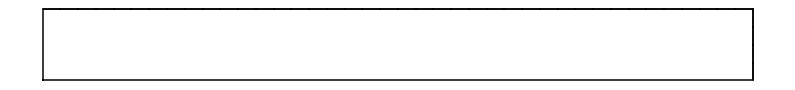

In [29]:
display_maze (empty_maze(40,4))

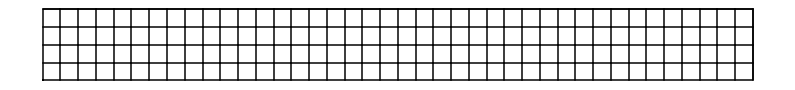

In [30]:
display_maze (full_maze(40,4))

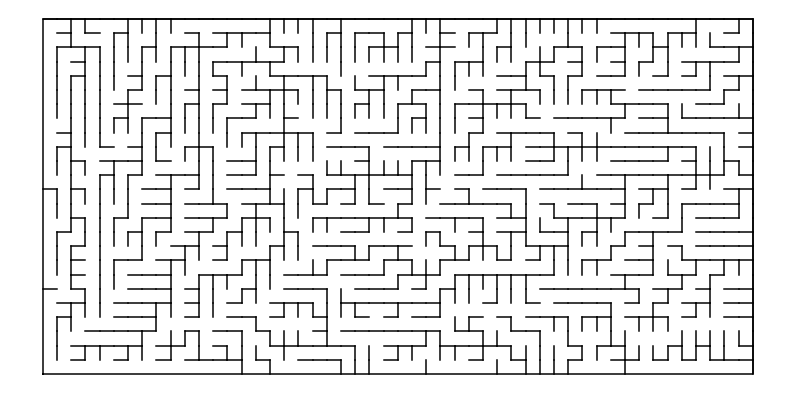

In [31]:
display_maze (({(26, 21), (18, 17), (42, 2), (8, 9), (0, 5), (19, 18), (11, 14), (34, 3), (45, 12), (37, 8), (3, 15), (14, 24), (46, 13), (38, 9), (49, 18), (7, 21), (48, 22), (30, 4), (41, 19), (33, 15), (25, 11), (44, 24), (22, 5), (14, 1), (34, 16), (37, 21), (15, 2), (26, 11), (18, 7), (29, 22), (21, 18), (11, 4), (44, 1), (10, 8), (25, 24), (45, 2), (3, 5), (22, 18), (14, 14), (7, 11), (48, 12), (40, 8), (6, 15), (41, 9), (33, 5), (25, 1), (44, 14), (10, 21), (2, 17), (34, 6), (37, 11), (3, 18), (36, 15), (47, 24), (26, 1), (29, 12), (21, 8), (40, 21), (33, 18), (25, 14), (32, 22), (22, 8), (14, 4), (17, 15), (9, 11), (28, 24), (48, 2), (6, 5), (21, 21), (44, 4), (10, 11), (2, 7), (13, 22), (36, 5), (28, 1), (47, 14), (5, 17), (9, 24), (29, 2), (40, 11), (6, 18), (32, 12), (24, 8), (43, 21), (35, 17), (1, 24), (17, 5), (36, 18), (9, 1), (28, 14), (20, 15), (31, 24), (23, 20), (13, 12), (24, 21), (16, 17), (47, 4), (5, 7), (9, 14), (39, 5), (31, 1), (12, 24), (4, 20), (32, 2), (43, 11), (35, 7), (1, 14), (46, 22), (28, 4), (42, 24), (20, 5), (39, 18), (12, 1), (31, 14), (23, 10), (13, 2), (24, 11), (16, 7), (42, 1), (8, 8), (27, 21), (0, 4), (19, 17), (11, 13), (20, 18), (12, 14), (4, 10), (23, 23), (43, 1), (1, 4), (46, 12), (38, 8), (49, 17), (15, 24), (7, 20), (30, 3), (42, 14), (8, 21), (0, 17), (39, 8), (31, 4), (23, 0), (34, 15), (45, 24), (37, 20), (15, 1), (26, 10), (18, 6), (38, 21), (27, 11), (19, 7), (11, 3), (30, 16), (12, 4), (25, 23), (4, 0), (45, 1), (22, 17), (14, 13), (46, 2), (49, 7), (15, 14), (7, 10), (26, 23), (18, 19), (42, 4), (8, 11), (0, 7), (41, 8), (11, 16), (44, 13), (10, 20), (34, 5), (45, 14), (37, 10), (3, 17), (26, 0), (38, 11), (7, 23), (48, 24), (27, 1), (40, 20), (30, 6), (41, 21), (33, 17), (25, 13), (22, 7), (14, 3), (34, 18), (37, 23), (15, 4), (7, 0), (26, 13), (18, 9), (29, 24), (21, 20), (44, 3), (10, 10), (2, 6), (45, 4), (37, 0), (3, 7), (22, 20), (14, 16), (9, 23), (29, 1), (48, 14), (40, 10), (6, 17), (41, 11), (33, 7), (25, 3), (44, 16), (10, 23), (2, 19), (36, 17), (28, 13), (29, 14), (21, 10), (40, 23), (10, 0), (25, 16), (32, 24), (24, 20), (14, 6), (47, 3), (17, 17), (9, 13), (48, 4), (40, 0), (6, 7), (21, 23), (44, 6), (10, 13), (2, 9), (43, 10), (13, 24), (36, 7), (28, 3), (47, 16), (5, 19), (29, 4), (21, 0), (40, 13), (6, 20), (39, 17), (13, 1), (32, 14), (24, 10), (43, 23), (16, 6), (35, 19), (17, 7), (36, 20), (9, 3), (28, 16), (20, 17), (12, 13), (23, 22), (43, 0), (1, 3), (13, 14), (24, 23), (16, 19), (47, 6), (5, 9), (9, 16), (42, 13), (8, 20), (39, 7), (31, 3), (4, 22), (32, 4), (24, 0), (43, 13), (35, 9), (1, 16), (46, 24), (38, 20), (27, 10), (30, 15), (20, 7), (39, 20), (12, 3), (31, 16), (23, 12), (13, 4), (46, 1), (16, 9), (49, 6), (26, 22), (42, 3), (8, 10), (27, 23), (0, 6), (19, 19), (11, 15), (12, 16), (4, 12), (1, 6), (46, 14), (38, 10), (49, 19), (7, 22), (27, 0), (30, 5), (42, 16), (8, 23), (0, 19), (31, 6), (23, 2), (34, 17), (37, 22), (15, 3), (26, 12), (18, 8), (38, 23), (8, 0), (27, 13), (19, 9), (11, 5), (30, 18), (4, 2), (45, 3), (3, 6), (22, 19), (14, 15), (46, 4), (38, 0), (49, 9), (15, 16), (7, 12), (18, 21), (0, 9), (41, 10), (33, 6), (44, 15), (10, 22), (34, 7), (45, 16), (37, 12), (3, 19), (26, 2), (29, 13), (40, 22), (41, 23), (33, 19), (25, 15), (22, 9), (14, 5), (15, 6), (7, 2), (48, 3), (18, 11), (21, 22), (41, 0), (44, 5), (10, 12), (2, 8), (45, 6), (37, 2), (3, 9), (14, 18), (47, 15), (29, 3), (48, 16), (40, 12), (6, 19), (41, 13), (33, 9), (25, 5), (44, 18), (2, 21), (43, 22), (17, 6), (36, 19), (28, 15), (29, 16), (21, 12), (10, 2), (13, 13), (24, 22), (16, 18), (47, 5), (5, 8), (17, 19), (9, 15), (48, 6), (40, 2), (6, 9), (32, 3), (2, 11), (43, 12), (35, 8), (1, 15), (36, 9), (28, 5), (47, 18), (5, 21), (29, 6), (21, 2), (39, 19), (31, 15), (13, 3), (32, 16), (24, 12), (16, 8), (35, 21), (17, 9), (9, 5), (28, 18), (27, 22), (20, 19), (12, 15), (4, 11), (23, 24), (43, 2), (1, 5), (13, 16), (16, 21), (5, 11), (42, 15), (8, 22), (0, 18), (39, 9), (31, 5), (23, 1), (4, 24), (32, 6), (24, 2), (35, 11), (1, 18), (38, 22), (27, 12), (19, 8), (30, 17), (20, 9), (39, 22), (12, 5), (31, 18), (4, 1), (23, 14), (46, 3), (49, 8), (15, 15), (26, 24), (18, 20), (42, 5), (8, 12), (0, 8), (19, 21), (11, 17), (4, 14), (45, 15), (46, 16), (38, 12), (49, 21), (7, 24), (27, 2), (30, 7), (0, 21), (41, 22), (23, 4), (34, 19), (37, 24), (15, 5), (7, 1), (26, 14), (18, 10), (8, 2), (19, 11), (11, 7), (45, 5), (37, 1), (3, 8), (22, 21), (14, 17), (46, 6), (38, 2), (49, 11), (15, 18), (7, 14), (48, 15), (18, 23), (41, 12), (33, 8), (25, 4), (44, 17), (10, 24), (2, 20), (34, 9), (45, 18), (37, 14), (3, 21), (26, 4), (18, 0), (29, 15), (21, 11), (40, 24), (10, 1), (33, 21), (25, 17), (22, 11), (14, 7), (17, 18), (7, 4), (48, 5), (40, 1), (6, 8), (21, 24), (41, 2), (44, 7), (10, 14), (2, 10), (37, 4), (3, 11), (36, 8), (47, 17), (5, 20), (29, 5), (48, 18), (21, 1), (40, 14), (6, 21), (33, 11), (25, 7), (32, 15), (2, 23), (43, 24), (22, 1), (35, 20), (17, 8), (36, 21), (9, 4), (28, 17), (29, 18), (21, 14), (10, 4), (2, 0), (13, 15), (24, 24), (16, 20), (47, 7), (5, 10), (17, 21), (9, 17), (48, 8), (40, 4), (6, 11), (4, 23), (32, 5), (24, 1), (43, 14), (35, 10), (1, 17), (36, 11), (28, 7), (47, 20), (5, 23), (21, 4), (20, 8), (39, 21), (31, 17), (23, 13), (13, 5), (32, 18), (24, 14), (16, 10), (35, 23), (5, 0), (17, 11), (9, 7), (27, 24), (6, 1), (19, 20), (20, 21), (12, 17), (4, 13), (43, 4), (35, 0), (1, 7), (13, 18), (46, 15), (16, 23), (49, 20), (5, 13), (42, 17), (8, 24), (0, 20), (39, 11), (31, 7), (23, 3), (24, 4), (16, 0), (35, 13), (1, 20), (38, 24), (8, 1), (27, 14), (19, 10), (11, 6), (30, 19), (20, 11), (12, 7), (31, 20), (4, 3), (23, 16), (46, 5), (38, 1), (49, 10), (15, 17), (7, 13), (18, 22), (42, 7), (8, 14), (0, 10), (19, 23), (11, 19), (39, 1), (34, 8), (4, 16), (45, 17), (37, 13), (3, 20), (26, 3), (46, 18), (38, 14), (49, 23), (27, 4), (19, 0), (30, 9), (0, 23), (41, 24), (33, 20), (22, 10), (34, 21), (49, 0), (15, 7), (7, 3), (26, 16), (18, 12), (8, 4), (0, 0), (41, 1), (11, 9), (45, 7), (37, 3), (3, 10), (22, 23), (14, 19), (38, 4), (7, 16), (48, 17), (41, 14), (33, 10), (25, 6), (44, 19), (2, 22), (22, 0), (34, 11), (37, 16), (3, 23), (26, 6), (18, 2), (29, 17), (21, 13), (10, 3), (33, 23), (25, 19), (3, 0), (22, 13), (14, 9), (17, 20), (48, 7), (40, 3), (6, 10), (41, 4), (33, 0), (44, 9), (10, 16), (2, 12), (36, 10), (28, 6), (47, 19), (5, 22), (29, 7), (48, 20), (21, 3), (40, 16), (6, 23), (25, 9), (32, 17), (24, 13), (35, 22), (17, 10), (36, 23), (9, 6), (28, 19), (6, 0), (21, 16), (20, 20), (10, 6), (2, 2), (43, 3), (13, 17), (16, 22), (36, 0), (47, 9), (5, 12), (17, 23), (9, 19), (40, 6), (6, 13), (39, 10), (32, 7), (24, 3), (43, 16), (35, 12), (1, 19), (17, 0), (36, 13), (28, 9), (20, 10), (39, 23), (12, 6), (31, 19), (23, 15), (13, 7), (32, 20), (24, 16), (16, 12), (5, 2), (9, 9), (42, 6), (8, 13), (19, 22), (11, 18), (39, 0), (20, 23), (12, 19), (4, 15), (43, 6), (35, 2), (1, 9), (46, 17), (38, 13), (49, 22), (27, 3), (30, 8), (42, 19), (0, 22), (20, 0), (39, 13), (31, 9), (23, 5), (34, 20), (24, 6), (16, 2), (26, 15), (8, 3), (27, 16), (19, 12), (11, 8), (30, 21), (20, 13), (12, 9), (4, 5), (23, 18), (22, 22), (46, 7), (38, 3), (49, 12), (15, 19), (7, 15), (18, 24), (42, 9), (8, 16), (0, 12), (11, 21), (34, 10), (45, 19), (37, 15), (3, 22), (26, 5), (46, 20), (18, 1), (38, 16), (27, 6), (19, 2), (30, 11), (33, 22), (25, 18), (22, 12), (14, 8), (34, 23), (49, 2), (15, 9), (7, 5), (26, 18), (18, 14), (0, 2), (41, 3), (44, 8), (10, 15), (34, 0), (45, 9), (37, 5), (3, 12), (14, 21), (48, 19), (40, 15), (6, 22), (41, 16), (33, 12), (25, 8), (44, 21), (2, 24), (22, 2), (36, 22), (18, 4), (29, 19), (21, 15), (10, 5), (2, 1), (25, 21), (3, 2), (14, 11), (47, 8), (17, 22), (9, 18), (48, 9), (40, 5), (6, 12), (41, 6), (33, 2), (44, 11), (10, 18), (2, 14), (43, 15), (36, 12), (28, 8), (47, 21), (5, 24), (29, 9), (21, 5), (40, 18), (13, 6), (32, 19), (24, 15), (16, 11), (35, 24), (5, 1), (17, 12), (9, 8), (28, 21), (6, 2), (20, 22), (12, 18), (2, 4), (43, 5), (35, 1), (1, 8), (13, 19), (16, 24), (36, 2), (47, 11), (5, 14), (9, 21), (42, 18), (39, 12), (31, 8), (32, 9), (24, 5), (43, 18), (16, 1), (35, 14), (1, 21), (17, 2), (28, 11), (27, 15), (30, 20), (20, 12), (12, 8), (31, 21), (4, 4), (23, 17), (13, 9), (24, 18), (16, 14), (47, 1), (5, 4), (42, 8), (8, 15), (0, 11), (19, 24), (11, 20), (39, 2), (12, 21), (4, 17), (43, 8), (35, 4), (1, 11), (46, 19), (38, 15), (49, 24), (27, 5), (19, 1), (30, 10), (42, 21), (0, 24), (20, 2), (39, 15), (31, 11), (23, 7), (34, 22), (16, 4), (49, 1), (15, 8), (26, 17), (18, 13), (8, 5), (27, 18), (0, 1), (19, 14), (11, 10), (30, 23), (12, 11), (4, 7), (45, 8), (22, 24), (1, 1), (14, 20), (46, 9), (38, 5), (49, 14), (15, 21), (7, 17), (30, 0), (42, 11), (8, 18), (0, 14), (41, 15), (11, 23), (44, 20), (34, 12), (45, 21), (37, 17), (3, 24), (26, 7), (18, 3), (38, 18), (27, 8), (19, 4), (11, 0), (30, 13), (33, 24), (25, 20), (3, 1), (22, 14), (14, 10), (49, 4), (15, 11), (7, 7), (26, 20), (18, 16), (41, 5), (33, 1), (44, 10), (10, 17), (2, 13), (34, 2), (45, 11), (37, 7), (3, 14), (14, 23), (29, 8), (48, 21), (40, 17), (6, 24), (41, 18), (33, 14), (25, 10), (44, 23), (22, 4), (14, 0), (36, 24), (28, 20), (29, 21), (21, 17), (44, 0), (10, 7), (2, 3), (3, 4), (36, 1), (47, 10), (17, 24), (9, 20), (48, 11), (40, 7), (6, 14), (33, 4), (25, 0), (32, 8), (2, 16), (43, 17), (17, 1), (36, 14), (28, 10), (47, 23), (29, 11), (21, 7), (39, 24), (13, 8), (32, 21), (24, 17), (16, 13), (47, 0), (5, 3), (17, 14), (9, 10), (28, 23), (48, 1), (6, 4), (20, 24), (12, 20), (43, 7), (35, 3), (1, 10), (13, 21), (36, 4), (28, 0), (47, 13), (5, 16), (42, 20), (20, 1), (39, 14), (31, 10), (23, 6), (32, 11), (24, 7), (43, 20), (16, 3), (35, 16), (1, 23), (17, 4), (9, 0), (27, 17), (19, 13), (30, 22), (20, 14), (12, 10), (31, 23), (4, 6), (23, 19), (1, 0), (13, 11), (46, 8), (16, 16), (49, 13), (15, 20), (5, 6), (42, 10), (8, 17), (0, 13), (11, 22), (39, 4), (31, 0), (12, 23), (4, 19), (32, 1), (45, 20), (35, 6), (1, 13), (46, 21), (38, 17), (27, 7), (19, 3), (30, 12), (42, 23), (20, 4), (12, 0), (31, 13), (23, 9), (34, 24), (49, 3), (15, 10), (7, 6), (26, 19), (18, 15), (42, 0), (8, 7), (27, 20), (0, 3), (19, 16), (11, 12), (34, 1), (4, 9), (45, 10), (37, 6), (3, 13), (14, 22), (46, 11), (38, 7), (49, 16), (15, 23), (7, 19), (30, 2), (0, 16), (41, 17), (33, 13), (44, 22), (22, 3), (34, 14), (45, 23), (37, 19), (15, 0), (26, 9), (18, 5), (29, 20), (19, 6), (11, 2), (25, 22), (45, 0), (3, 3), (22, 16), (14, 12), (15, 13), (7, 9), (48, 10), (18, 18), (41, 7), (33, 3), (44, 12), (10, 19), (2, 15), (34, 4), (45, 13), (37, 9), (3, 16), (47, 22), (29, 10), (48, 23), (21, 6), (40, 19), (41, 20), (33, 16), (25, 12), (22, 6), (14, 2), (17, 13), (28, 22), (48, 0), (6, 3), (29, 23), (21, 19), (44, 2), (10, 9), (2, 5), (13, 20), (36, 3), (47, 12), (5, 15), (9, 22), (29, 0), (48, 13), (40, 9), (6, 16), (25, 2), (32, 10), (2, 18), (43, 19), (35, 15), (1, 22), (17, 3), (36, 16), (28, 12), (21, 9), (31, 22), (13, 10), (32, 23), (24, 19), (16, 15), (47, 2), (5, 5), (17, 16), (9, 12), (6, 6), (39, 3), (12, 22), (4, 18), (32, 0), (43, 9), (35, 5), (1, 12), (13, 23), (36, 6), (28, 2), (5, 18), (42, 22), (20, 3), (39, 16), (31, 12), (23, 8), (13, 0), (32, 13), (24, 9), (16, 5), (35, 18), (9, 2), (8, 6), (27, 19), (19, 15), (11, 11), (30, 24), (20, 16), (12, 12), (4, 8), (23, 21), (1, 2), (46, 10), (38, 6), (49, 15), (15, 22), (7, 18), (30, 1), (42, 12), (8, 19), (0, 15), (11, 24), (39, 6), (31, 2), (34, 13), (4, 21), (45, 22), (37, 18), (26, 8), (46, 23), (38, 19), (27, 9), (19, 5), (11, 1), (30, 14), (20, 6), (12, 2), (23, 11), (22, 15), (46, 0), (49, 5), (15, 12), (7, 8)}, {((38, 11), (37, 11)), ((14, 12), (15, 12)), ((47, 5), (47, 6)), ((7, 6), (6, 6)), ((35, 20), (35, 19)), ((40, 7), (39, 7)), ((18, 21), (17, 21)), ((9, 20), (10, 20)), ((40, 6), (39, 6)), ((41, 0), (42, 0)), ((14, 4), (15, 4)), ((23, 3), (22, 3)), ((16, 23), (17, 23)), ((11, 3), (11, 2)), ((25, 15), (24, 15)), ((23, 2), (23, 1)), ((39, 10), (39, 9)), ((39, 14), (38, 14)), ((5, 21), (5, 20)), ((2, 0), (1, 0)), ((11, 18), (11, 19)), ((34, 19), (33, 19)), ((0, 14), (0, 15)), ((35, 21), (36, 21)), ((13, 8), (13, 9)), ((48, 17), (48, 16)), ((48, 10), (49, 10)), ((41, 10), (40, 10)), ((47, 19), (47, 20)), ((5, 13), (5, 12)), ((7, 19), (7, 20)), ((45, 3), (45, 2)), ((20, 15), (19, 15)), ((35, 13), (36, 13)), ((34, 4), (33, 4)), ((40, 13), (39, 13)), ((29, 20), (29, 21)), ((9, 16), (10, 16)), ((18, 18), (18, 17)), ((13, 6), (14, 6)), ((41, 11), (41, 12)), ((43, 2), (42, 2)), ((41, 12), (42, 12)), ((3, 20), (3, 19)), ((22, 7), (21, 7)), ((41, 24), (40, 24)), ((11, 14), (11, 15)), ((18, 14), (19, 14)), ((26, 5), (25, 5)), ((24, 3), (23, 3)), ((10, 1), (10, 2)), ((36, 7), (36, 6)), ((48, 16), (49, 16)), ((36, 0), (36, 1)), ((41, 18), (41, 17)), ((33, 21), (33, 22)), ((45, 4), (44, 4)), ((27, 23), (26, 23)), ((48, 9), (49, 9)), ((39, 20), (40, 20)), ((33, 8), (33, 9)), ((39, 6), (39, 7)), ((9, 12), (9, 13)), ((3, 9), (3, 8)), ((6, 12), (6, 13)), ((9, 6), (9, 7)), ((36, 6), (37, 6)), ((15, 4), (15, 5)), ((12, 13), (12, 14)), ((39, 7), (40, 7)), ((29, 17), (30, 17)), ((45, 20), (44, 20)), ((49, 13), (48, 13)), ((33, 2), (34, 2)), ((22, 21), (21, 21)), ((4, 1), (4, 0)), ((31, 16), (31, 17)), ((45, 12), (44, 12)), ((9, 5), (9, 4)), ((10, 21), (10, 22)), ((24, 17), (23, 17)), ((31, 3), (31, 4)), ((8, 2), (7, 2)), ((7, 7), (7, 8)), ((43, 2), (43, 3)), ((0, 17), (0, 18)), ((45, 6), (45, 5)), ((21, 13), (20, 13)), ((33, 22), (33, 23)), ((43, 8), (43, 9)), ((30, 20), (29, 20)), ((40, 24), (39, 24)), ((19, 15), (19, 16)), ((3, 16), (3, 15)), ((35, 6), (34, 6)), ((18, 3), (17, 3)), ((23, 20), (22, 20)), ((33, 18), (33, 17)), ((16, 13), (17, 13)), ((0, 24), (0, 23)), ((11, 7), (12, 7)), ((7, 22), (7, 21)), ((4, 8), (4, 7)), ((32, 15), (32, 14)), ((16, 7), (16, 6)), ((35, 4), (35, 5)), ((28, 0), (27, 0)), ((22, 20), (23, 20)), ((40, 2), (40, 3)), ((19, 2), (18, 2)), ((22, 21), (22, 22)), ((41, 15), (42, 15)), ((4, 1), (5, 1)), ((32, 0), (33, 0)), ((20, 20), (21, 20)), ((35, 11), (35, 10)), ((5, 17), (5, 16)), ((41, 7), (42, 7)), ((41, 21), (41, 20)), ((11, 18), (11, 17)), ((46, 20), (45, 20)), ((41, 8), (41, 9)), ((20, 12), (21, 12)), ((14, 2), (14, 1)), ((35, 19), (35, 20)), ((11, 24), (11, 23)), ((39, 13), (38, 13)), ((42, 14), (43, 14)), ((21, 19), (22, 19)), ((18, 15), (18, 14)), ((0, 24), (1, 24)), ((32, 4), (33, 4)), ((15, 1), (16, 1)), ((30, 8), (30, 7)), ((13, 22), (13, 23)), ((22, 24), (21, 24)), ((38, 17), (37, 17)), ((19, 9), (18, 9)), ((41, 22), (42, 22)), ((4, 8), (5, 8)), ((0, 16), (1, 16)), ((29, 19), (29, 20)), ((22, 16), (21, 16)), ((41, 14), (42, 14)), ((30, 22), (30, 23)), ((17, 14), (16, 14)), ((40, 3), (41, 3)), ((32, 14), (31, 14)), ((23, 23), (22, 23)), ((39, 24), (40, 24)), ((29, 0), (28, 0)), ((42, 24), (41, 24)), ((36, 12), (35, 12)), ((42, 18), (41, 18)), ((38, 18), (38, 19)), ((15, 17), (14, 17)), ((20, 2), (20, 3)), ((39, 16), (40, 16)), ((3, 11), (3, 10)), ((36, 4), (35, 4)), ((17, 10), (17, 11)), ((6, 12), (6, 11)), ((39, 9), (40, 9)), ((34, 14), (35, 14)), ((15, 4), (15, 3)), ((27, 8), (26, 8)), ((33, 14), (32, 14)), ((33, 7), (33, 8)), ((38, 23), (37, 23)), ((3, 13), (3, 14)), ((1, 0), (2, 0)), ((46, 0), (47, 0)), ((28, 20), (28, 19)), ((6, 7), (5, 7)), ((24, 16), (23, 16)), ((40, 17), (41, 17)), ((17, 16), (17, 15)), ((29, 14), (28, 14)), ((12, 4), (12, 5)), ((16, 18), (16, 19)), ((10, 24), (11, 24)), ((15, 5), (15, 6)), ((38, 21), (39, 21)), ((22, 17), (23, 17)), ((1, 21), (1, 22)), ((25, 3), (25, 4)), ((12, 3), (11, 3)), ((31, 2), (31, 3)), ((1, 8), (1, 9)), ((5, 20), (5, 19)), ((48, 4), (47, 4)), ((17, 7), (18, 7)), ((4, 0), (4, 1)), ((44, 5), (45, 5)), ((36, 20), (36, 21)), ((13, 16), (13, 15)), ((28, 16), (28, 15)), ((27, 1), (26, 1)), ((31, 23), (31, 22)), ((4, 23), (3, 23)), ((2, 10), (2, 9)), ((7, 21), (7, 20)), ((49, 19), (49, 20)), ((6, 6), (5, 6)), ((19, 16), (19, 17)), ((0, 6), (1, 6)), ((4, 7), (4, 6)), ((43, 19), (44, 19)), ((26, 16), (27, 16)), ((25, 17), (25, 16)), ((5, 9), (5, 10)), ((4, 22), (4, 23)), ((5, 21), (6, 21)), ((10, 7), (10, 8)), ((19, 11), (18, 11)), ((22, 13), (22, 12)), ((29, 15), (29, 14)), ((37, 9), (37, 10)), ((5, 16), (5, 15)), ((47, 14), (47, 15)), ((8, 19), (8, 18)), ((14, 20), (14, 21)), ((44, 0), (44, 1)), ((11, 1), (12, 1)), ((44, 8), (43, 8)), ((7, 11), (6, 11)), ((2, 24), (2, 23)), ((44, 22), (44, 23)), ((47, 20), (47, 21)), ((14, 23), (14, 22)), ((20, 5), (20, 4)), ((11, 9), (11, 8)), ((46, 3), (47, 3)), ((9, 5), (10, 5)), ((30, 4), (31, 4)), ((2, 9), (2, 10)), ((3, 8), (3, 7)), ((12, 13), (13, 13)), ((10, 10), (9, 10)), ((38, 0), (38, 1)), ((34, 15), (33, 15)), ((38, 14), (38, 13)), ((45, 0), (46, 0)), ((29, 9), (28, 9)), ((18, 21), (18, 22)), ((35, 20), (34, 20)), ((44, 14), (44, 15)), ((8, 14), (7, 14)), ((25, 16), (26, 16)), ((41, 13), (42, 13)), ((18, 8), (18, 9)), ((20, 11), (20, 12)), ((22, 2), (21, 2)), ((7, 1), (8, 1)), ((48, 19), (48, 18)), ((46, 17), (47, 17)), ((33, 22), (34, 22)), ((27, 24), (27, 23)), ((46, 10), (47, 10)), ((47, 12), (46, 12)), ((20, 6), (19, 6)), ((8, 23), (8, 24)), ((24, 24), (25, 24)), ((29, 5), (29, 6)), ((3, 3), (2, 3)), ((40, 16), (41, 16)), ((23, 13), (24, 13)), ((27, 6), (27, 5)), ((21, 8), (20, 8)), ((37, 2), (38, 2)), ((48, 16), (48, 17)), ((29, 24), (28, 24)), ((45, 2), (45, 3)), ((30, 1), (29, 1)), ((42, 10), (42, 11)), ((36, 16), (37, 16)), ((30, 6), (30, 5)), ((21, 17), (22, 17)), ((3, 12), (3, 13)), ((19, 20), (19, 19)), ((48, 22), (47, 22)), ((31, 17), (32, 17)), ((27, 13), (27, 14)), ((45, 6), (46, 6)), ((22, 9), (21, 9)), ((27, 0), (27, 1)), ((7, 8), (8, 8)), ((3, 4), (3, 5)), ((17, 0), (16, 0)), ((24, 12), (23, 12)), ((4, 4), (4, 5)), ((31, 0), (30, 0)), ((27, 19), (26, 19)), ((29, 10), (30, 10)), ((16, 11), (15, 11)), ((10, 17), (10, 16)), ((33, 23), (33, 24)), ((44, 15), (45, 15)), ((6, 11), (7, 11)), ((47, 18), (46, 18)), ((1, 7), (1, 8)), ((12, 24), (11, 24)), ((29, 2), (30, 2)), ((42, 2), (42, 3)), ((24, 21), (24, 22)), ((45, 9), (45, 10)), ((32, 10), (33, 10)), ((47, 24), (47, 23)), ((39, 12), (38, 12)), ((24, 14), (24, 15)), ((42, 13), (43, 13)), ((34, 3), (33, 3)), ((23, 6), (24, 6)), ((35, 5), (36, 5)), ((21, 22), (21, 23)), ((48, 18), (47, 18)), ((27, 20), (27, 21)), ((31, 13), (32, 13)), ((19, 16), (19, 15)), ((47, 3), (47, 4)), ((10, 6), (10, 7)), ((46, 15), (46, 16)), ((9, 19), (9, 20)), ((31, 20), (30, 20)), ((37, 19), (37, 20)), ((26, 8), (26, 9)), ((34, 19), (34, 18)), ((31, 7), (30, 7)), ((37, 13), (36, 13)), ((34, 12), (34, 11)), ((30, 19), (29, 19)), ((4, 14), (3, 14)), ((19, 17), (19, 18)), ((11, 19), (11, 18)), ((30, 11), (29, 11)), ((17, 1), (17, 0)), ((28, 9), (28, 10)), ((7, 14), (7, 15)), ((25, 6), (26, 6)), ((48, 10), (47, 10)), ((11, 12), (10, 12)), ((4, 11), (5, 11)), ((44, 21), (44, 22)), ((9, 11), (9, 10)), ((34, 14), (33, 14)), ((46, 12), (47, 12)), ((41, 17), (42, 17)), ((23, 18), (23, 19)), ((17, 3), (16, 3)), ((17, 15), (17, 14)), ((49, 11), (49, 12)), ((0, 1), (0, 0)), ((15, 17), (15, 18)), ((28, 1), (28, 0)), ((48, 24), (47, 24)), ((32, 13), (33, 13)), ((32, 9), (31, 9)), ((3, 0), (4, 0)), ((18, 7), (18, 8)), ((8, 0), (7, 0)), ((42, 6), (42, 5)), ((15, 10), (15, 9)), ((13, 8), (14, 8)), ((33, 8), (34, 8)), ((1, 3), (1, 2)), ((14, 3), (13, 3)), ((28, 2), (29, 2)), ((24, 10), (25, 10)), ((1, 2), (1, 1)), ((7, 7), (8, 7)), ((3, 22), (3, 21)), ((33, 2), (32, 2)), ((29, 20), (30, 20)), ((9, 0), (8, 0)), ((25, 1), (25, 0)), ((7, 20), (7, 19)), ((10, 3), (9, 3)), ((12, 5), (13, 5)), ((32, 23), (31, 23)), ((24, 2), (25, 2)), ((39, 1), (39, 0)), ((26, 5), (27, 5)), ((32, 16), (31, 16)), ((37, 15), (37, 14)), ((15, 2), (14, 2)), ((31, 3), (32, 3)), ((20, 13), (19, 13)), ((28, 24), (29, 24)), ((43, 0), (44, 0)), ((43, 7), (43, 6)), ((25, 9), (26, 9)), ((1, 6), (0, 6)), ((43, 11), (42, 11)), ((33, 23), (33, 22)), ((49, 8), (48, 8)), ((22, 12), (22, 11)), ((22, 5), (23, 5)), ((35, 12), (34, 12)), ((5, 2), (6, 2)), ((45, 21), (44, 21)), ((28, 16), (29, 16)), ((13, 4), (14, 4)), ((31, 23), (32, 23)), ((5, 19), (4, 19)), ((7, 21), (8, 21)), ((38, 14), (39, 14)), ((15, 14), (15, 15)), ((11, 8), (11, 7)), ((9, 21), (9, 22)), ((9, 15), (9, 16)), ((47, 3), (47, 2)), ((31, 5), (31, 6)), ((19, 8), (18, 8)), ((9, 4), (10, 4)), ((2, 5), (1, 5)), ((26, 8), (26, 7)), ((49, 14), (49, 15)), ((5, 10), (6, 10)), ((21, 3), (22, 3)), ((48, 1), (48, 2)), ((12, 2), (11, 2)), ((13, 19), (13, 20)), ((28, 19), (28, 20)), ((34, 1), (34, 2)), ((25, 12), (24, 12)), ((25, 5), (25, 6)), ((5, 16), (6, 16)), ((11, 5), (11, 6)), ((21, 9), (22, 9)), ((18, 18), (17, 18)), ((28, 13), (27, 13)), ((4, 10), (4, 11)), ((37, 12), (36, 12)), ((18, 5), (17, 5)), ((17, 6), (16, 6)), ((46, 6), (46, 7)), ((14, 23), (15, 23)), ((44, 10), (43, 10)), ((41, 9), (41, 8)), ((18, 8), (19, 8)), ((7, 16), (7, 17)), ((40, 18), (39, 18)), ((11, 9), (12, 9)), ((37, 4), (36, 4)), ((35, 24), (35, 23)), ((16, 9), (15, 9)), ((17, 22), (17, 21)), ((30, 7), (31, 7)), ((29, 17), (29, 18)), ((23, 0), (23, 1)), ((36, 18), (35, 18)), ((20, 6), (20, 5)), ((5, 19), (5, 20)), ((8, 22), (8, 23)), ((20, 21), (20, 22)), ((32, 4), (31, 4)), ((32, 2), (33, 2)), ((46, 21), (46, 20)), ((17, 7), (17, 8)), ((5, 11), (5, 12)), ((11, 12), (11, 13)), ((36, 12), (36, 11)), ((5, 1), (4, 1)), ((41, 23), (41, 22)), ((38, 9), (38, 8)), ((11, 4), (11, 5)), ((30, 20), (30, 21)), ((32, 23), (32, 24)), ((44, 6), (43, 6)), ((17, 14), (17, 13)), ((6, 17), (6, 18)), ((38, 24), (38, 23)), ((18, 3), (18, 4)), ((36, 10), (35, 10)), ((21, 20), (21, 19)), ((20, 7), (20, 6)), ((17, 21), (17, 22)), ((32, 6), (32, 5)), ((20, 22), (20, 23)), ((33, 6), (33, 5)), ((17, 8), (17, 9)), ((45, 8), (45, 9)), ((12, 4), (13, 4)), ((33, 12), (33, 11)), ((45, 11), (45, 10)), ((12, 17), (12, 16)), ((36, 11), (36, 12)), ((34, 9), (35, 9)), ((35, 11), (34, 11)), ((13, 14), (14, 14)), ((10, 23), (9, 23)), ((16, 20), (15, 20)), ((31, 1), (31, 0)), ((37, 6), (38, 6)), ((27, 9), (27, 8)), ((6, 6), (7, 6)), ((17, 23), (16, 23)), ((36, 6), (35, 6)), ((37, 5), (38, 5)), ((19, 3), (18, 3)), ((19, 24), (20, 24)), ((4, 13), (4, 12)), ((9, 11), (10, 11)), ((19, 17), (20, 17)), ((31, 22), (31, 23)), ((38, 23), (39, 23)), ((21, 10), (20, 10)), ((19, 16), (20, 16)), ((19, 19), (19, 18)), ((19, 9), (20, 9)), ((7, 3), (6, 3)), ((26, 17), (26, 16)), ((5, 4), (4, 4)), ((5, 22), (5, 21)), ((25, 23), (25, 22)), ((44, 20), (44, 21)), ((35, 18), (34, 18)), ((37, 20), (38, 20)), ((1, 9), (2, 9)), ((46, 12), (45, 12)), ((46, 24), (46, 23)), ((9, 3), (10, 3)), ((11, 19), (12, 19)), ((25, 15), (25, 14)), ((9, 14), (8, 14)), ((3, 2), (2, 2)), ((42, 19), (43, 19)), ((23, 17), (23, 18)), ((34, 0), (34, 1)), ((18, 20), (18, 19)), ((47, 20), (48, 20)), ((30, 0), (29, 0)), ((34, 22), (34, 23)), ((13, 5), (13, 6)), ((28, 12), (27, 12)), ((44, 13), (44, 12)), ((42, 11), (43, 11)), ((8, 6), (7, 6)), ((25, 8), (26, 8)), ((19, 14), (18, 14)), ((21, 16), (22, 16)), ((38, 6), (38, 7)), ((4, 3), (3, 3)), ((32, 12), (33, 12)), ((5, 18), (4, 18)), ((44, 24), (43, 24)), ((41, 19), (42, 19)), ((34, 21), (34, 20)), ((32, 17), (32, 18)), ((44, 14), (45, 14)), ((29, 3), (29, 4)), ((23, 21), (22, 21)), ((41, 2), (41, 3)), ((8, 8), (8, 9)), ((36, 15), (36, 14)), ((15, 20), (16, 20)), ((41, 15), (40, 15)), ((25, 15), (26, 15)), ((2, 18), (2, 19)), ((23, 11), (24, 11)), ((39, 14), (40, 14)), ((0, 2), (0, 1)), ((29, 9), (29, 8)), ((45, 20), (46, 20)), ((34, 12), (35, 12)), ((41, 7), (40, 7)), ((49, 20), (49, 19)), ((17, 18), (17, 19)), ((15, 5), (16, 5)), ((29, 24), (29, 23)), ((0, 4), (0, 5)), ((6, 3), (7, 3)), ((37, 8), (38, 8)), ((18, 0), (19, 0)), ((40, 15), (41, 15)), ((47, 10), (46, 10)), ((6, 15), (5, 15)), ((21, 6), (21, 5)), ((43, 10), (44, 10)), ((0, 11), (0, 10)), ((6, 9), (6, 8)), ((24, 18), (24, 17)), ((38, 13), (39, 13)), ((47, 15), (47, 14)), ((24, 12), (24, 11)), ((45, 3), (44, 3)), ((27, 19), (27, 18)), ((3, 17), (3, 16)), ((43, 2), (44, 2)), ((48, 13), (48, 14)), ((4, 23), (4, 22)), ((0, 3), (0, 2)), ((15, 16), (15, 15)), ((15, 21), (14, 21)), ((42, 1), (42, 2)), ((22, 7), (23, 7)), ((1, 5), (1, 6)), ((0, 18), (0, 19)), ((14, 19), (13, 19)), ((39, 11), (39, 12)), ((9, 16), (9, 15)), ((24, 0), (23, 0)), ((45, 9), (46, 9)), ((9, 10), (9, 9)), ((21, 9), (20, 9)), ((37, 10), (37, 9)), ((42, 21), (42, 20)), ((33, 11), (33, 12)), ((28, 14), (28, 13)), ((38, 4), (37, 4)), ((43, 24), (44, 24)), ((1, 12), (1, 11)), ((31, 14), (31, 13)), ((26, 8), (27, 8)), ((22, 21), (23, 21)), ((37, 11), (38, 11)), ((47, 4), (47, 3)), ((26, 9), (26, 8)), ((37, 24), (37, 23)), ((0, 7), (0, 8)), ((34, 10), (34, 9)), ((35, 14), (36, 14)), ((26, 1), (26, 0)), ((13, 1), (13, 2)), ((44, 11), (44, 12)), ((13, 3), (12, 3)), ((28, 15), (28, 14)), ((7, 19), (6, 19)), ((5, 6), (5, 5)), ((47, 12), (47, 13)), ((4, 19), (4, 18)), ((26, 16), (26, 17)), ((9, 10), (10, 10)), ((35, 6), (36, 6)), ((5, 21), (5, 22)), ((18, 3), (19, 3)), ((31, 21), (31, 20)), ((18, 11), (18, 10)), ((44, 4), (44, 3)), ((26, 23), (26, 22)), ((32, 5), (32, 4)), ((39, 21), (38, 21)), ((26, 10), (26, 9)), ((41, 12), (41, 11)), ((20, 3), (20, 4)), ((41, 17), (40, 17)), ((11, 7), (11, 8)), ((45, 10), (45, 9)), ((48, 3), (49, 3)), ((34, 6), (34, 5)), ((24, 15), (24, 14)), ((20, 9), (21, 9)), ((3, 8), (2, 8)), ((13, 11), (13, 10)), ((20, 2), (21, 2)), ((47, 6), (48, 6)), ((36, 1), (36, 0)), ((47, 9), (46, 9)), ((46, 7), (47, 7)), ((27, 0), (28, 0)), ((26, 11), (27, 11)), ((32, 7), (31, 7)), ((6, 5), (7, 5)), ((18, 12), (18, 11)), ((39, 7), (39, 6)), ((39, 0), (40, 0)), ((36, 21), (37, 21)), ((45, 11), (46, 11)), ((32, 1), (32, 0)), ((20, 17), (20, 18)), ((22, 14), (21, 14)), ((6, 23), (6, 24)), ((22, 24), (23, 24)), ((7, 13), (8, 13)), ((3, 9), (3, 10)), ((45, 5), (44, 5)), ((47, 24), (46, 24)), ((31, 1), (32, 1)), ((9, 20), (9, 19)), ((5, 3), (4, 3)), ((36, 7), (36, 8)), ((44, 20), (45, 20)), ((42, 15), (41, 15)), ((3, 15), (2, 15)), ((15, 8), (14, 8)), ((33, 15), (33, 16)), ((47, 16), (46, 16)), ((6, 21), (5, 21)), ((6, 19), (7, 19)), ((26, 3), (27, 3)), ((29, 0), (30, 0)), ((42, 0), (42, 1)), ((42, 7), (41, 7)), ((24, 19), (24, 20)), ((5, 8), (6, 8)), ((42, 18), (43, 18)), ((42, 22), (42, 23)), ((21, 5), (21, 6)), ((49, 6), (48, 6)), ((12, 7), (13, 7)), ((45, 18), (46, 18)), ((7, 15), (7, 14)), ((24, 11), (24, 12)), ((26, 2), (25, 2)), ((45, 19), (44, 19)), ((0, 9), (0, 10)), ((3, 16), (3, 17)), ((3, 10), (3, 11)), ((31, 10), (31, 11)), ((31, 12), (30, 12)), ((37, 18), (36, 18)), ((29, 22), (30, 22)), ((46, 12), (46, 13)), ((24, 6), (23, 6)), ((31, 6), (31, 5)), ((37, 3), (37, 4)), ((43, 1), (43, 2)), ((29, 14), (30, 14)), ((19, 22), (19, 23)), ((49, 2), (49, 3)), ((10, 7), (11, 7)), ((1, 18), (1, 19)), ((44, 13), (45, 13)), ((22, 0), (22, 1)), ((1, 11), (1, 12)), ((41, 1), (41, 2)), ((9, 9), (8, 9)), ((44, 11), (44, 10)), ((31, 13), (31, 14)), ((23, 0), (24, 0)), ((11, 2), (11, 3)), ((25, 21), (24, 21)), ((4, 12), (4, 13)), ((38, 15), (38, 14)), ((37, 23), (37, 24)), ((31, 20), (31, 19)), ((32, 10), (31, 10)), ((18, 0), (17, 0)), ((28, 21), (28, 22)), ((14, 9), (14, 8)), ((30, 20), (31, 20)), ((11, 17), (11, 16)), ((39, 6), (38, 6)), ((42, 21), (43, 21)), ((39, 24), (39, 23)), ((23, 16), (23, 15)), ((8, 5), (7, 5)), ((35, 18), (35, 19)), ((39, 17), (39, 16)), ((25, 0), (26, 0)), ((30, 21), (30, 20)), ((15, 15), (15, 14)), ((30, 15), (30, 14)), ((36, 3), (36, 2)), ((13, 13), (14, 13)), ((35, 3), (34, 3)), ((38, 22), (38, 21)), ((0, 23), (1, 23)), ((48, 2), (48, 1)), ((33, 7), (32, 7)), ((6, 0), (5, 0)), ((12, 10), (13, 10)), ((20, 23), (20, 22)), ((24, 7), (25, 7)), ((17, 9), (17, 8)), ((10, 13), (9, 13)), ((19, 8), (20, 8)), ((3, 19), (3, 18)), ((18, 19), (18, 18)), ((32, 21), (31, 21)), ((30, 16), (31, 16)), ((29, 7), (28, 7)), ((10, 0), (9, 0)), ((12, 2), (13, 2)), ((10, 10), (11, 10)), ((8, 12), (7, 12)), ((36, 17), (36, 16)), ((32, 13), (31, 13)), ((35, 17), (34, 17)), ((34, 15), (35, 15)), ((38, 8), (39, 8)), ((38, 14), (37, 14)), ((8, 11), (7, 11)), ((13, 20), (14, 20)), ((14, 22), (13, 22)), ((30, 4), (30, 5)), ((48, 8), (49, 8)), ((5, 24), (4, 24)), ((22, 2), (23, 2)), ((28, 14), (29, 14)), ((35, 9), (34, 9)), ((0, 19), (0, 20)), ((18, 6), (17, 6)), ((33, 21), (32, 21)), ((36, 14), (36, 15)), ((48, 1), (49, 1)), ((49, 22), (49, 21)), ((7, 1), (7, 2)), ((1, 14), (1, 13)), ((14, 14), (13, 14)), ((3, 20), (3, 21)), ((6, 20), (5, 20)), ((48, 23), (49, 23)), ((0, 6), (0, 7)), ((24, 21), (25, 21)), ((12, 5), (12, 6)), ((5, 16), (4, 16)), ((21, 4), (21, 3)), ((47, 12), (48, 12)), ((49, 5), (48, 5)), ((36, 9), (35, 9)), ((41, 20), (40, 20)), ((29, 24), (30, 24)), ((47, 4), (48, 4)), ((2, 7), (3, 7)), ((28, 16), (28, 17)), ((43, 4), (44, 4)), ((31, 17), (31, 18)), ((7, 21), (7, 22)), ((28, 3), (28, 4)), ((22, 9), (23, 9)), ((35, 16), (34, 16)), ((4, 7), (4, 8)), ((34, 13), (34, 12)), ((37, 2), (37, 3)), ((1, 11), (1, 10)), ((7, 8), (7, 9)), ((17, 0), (18, 0)), ((19, 7), (19, 8)), ((11, 20), (11, 19)), ((36, 23), (35, 23)), ((0, 16), (0, 15)), ((46, 4), (46, 3)), ((47, 18), (48, 18)), ((14, 16), (14, 15)), ((34, 20), (34, 21)), ((11, 2), (11, 1)), ((26, 23), (27, 23)), ((42, 16), (43, 16)), ((5, 16), (5, 17)), ((25, 17), (25, 18)), ((39, 12), (40, 12)), ((2, 2), (2, 3)), ((25, 16), (25, 17)), ((8, 20), (8, 19)), ((38, 1), (38, 0)), ((3, 8), (3, 9)), ((16, 7), (16, 8)), ((44, 7), (44, 8)), ((41, 13), (41, 12)), ((30, 7), (30, 8)), ((32, 8), (32, 9)), ((13, 18), (12, 18)), ((17, 11), (17, 10)), ((23, 12), (23, 13)), ((20, 18), (20, 17)), ((35, 18), (35, 17)), ((20, 12), (20, 11)), ((33, 15), (34, 15)), ((30, 11), (31, 11)), ((3, 1), (3, 0)), ((34, 9), (34, 10)), ((36, 24), (36, 23)), ((21, 1), (20, 1)), ((14, 2), (14, 3)), ((38, 21), (38, 20)), ((41, 22), (41, 21)), ((22, 3), (21, 3)), ((6, 3), (5, 3)), ((8, 9), (9, 9)), ((39, 23), (39, 24)), ((19, 13), (19, 12)), ((8, 21), (7, 21)), ((18, 15), (18, 16)), ((31, 10), (32, 10)), ((13, 19), (14, 19)), ((30, 14), (30, 15)), ((1, 13), (0, 13)), ((15, 8), (15, 9)), ((33, 17), (33, 18)), ((27, 14), (27, 13)), ((14, 24), (13, 24)), ((13, 11), (14, 11)), ((42, 10), (41, 10)), ((21, 15), (20, 15)), ((6, 4), (7, 4)), ((0, 19), (0, 18)), ((28, 6), (28, 7)), ((36, 17), (37, 17)), ((33, 24), (33, 23)), ((39, 22), (39, 21)), ((45, 23), (45, 22)), ((17, 2), (17, 3)), ((26, 4), (25, 4)), ((42, 2), (41, 2)), ((15, 22), (16, 22)), ((38, 10), (37, 10)), ((39, 9), (39, 8)), ((21, 7), (20, 7)), ((22, 1), (22, 0)), ((15, 23), (14, 23)), ((10, 17), (10, 18)), ((3, 5), (3, 6)), ((12, 9), (11, 9)), ((35, 23), (34, 23)), ((18, 20), (17, 20)), ((24, 6), (24, 7)), ((40, 5), (39, 5)), ((0, 13), (0, 14)), ((3, 11), (3, 12)), ((11, 24), (12, 24)), ((5, 2), (4, 2)), ((25, 20), (25, 19)), ((44, 17), (44, 18)), ((6, 14), (5, 14)), ((37, 17), (38, 17)), ((40, 20), (39, 20)), ((11, 11), (12, 11)), ((16, 10), (16, 11)), ((37, 6), (36, 6)), ((42, 17), (41, 17)), ((9, 0), (10, 0)), ((40, 4), (40, 3)), ((10, 3), (11, 3)), ((25, 3), (24, 3)), ((5, 5), (5, 6)), ((29, 9), (30, 9)), ((16, 2), (16, 3)), ((32, 17), (33, 17)), ((26, 11), (25, 11)), ((28, 2), (28, 3)), ((39, 5), (38, 5)), ((23, 15), (23, 14)), ((1, 20), (1, 19)), ((12, 23), (11, 23)), ((35, 12), (36, 12)), ((4, 0), (3, 0)), ((17, 21), (18, 21)), ((12, 16), (11, 16)), ((20, 1), (21, 1)), ((2, 20), (2, 19)), ((31, 20), (32, 20)), ((14, 17), (15, 17)), ((46, 22), (46, 23)), ((24, 9), (23, 9)), ((40, 12), (39, 12)), ((11, 13), (11, 14)), ((23, 24), (24, 24)), ((16, 17), (16, 18)), ((34, 12), (34, 13)), ((49, 19), (48, 19)), ((13, 17), (13, 16)), ((10, 20), (9, 20)), ((4, 21), (4, 20)), ((34, 11), (34, 12)), ((45, 3), (46, 3)), ((23, 16), (24, 16)), ((36, 5), (37, 5)), ((29, 1), (29, 0)), ((41, 5), (40, 5)), ((1, 10), (0, 10)), ((18, 5), (19, 5)), ((44, 0), (43, 0)), ((2, 16), (2, 15)), ((20, 9), (19, 9)), ((23, 4), (23, 3)), ((5, 23), (5, 22)), ((47, 8), (46, 8)), ((6, 0), (6, 1)), ((36, 21), (35, 21)), ((24, 10), (24, 9)), ((29, 21), (29, 20)), ((0, 8), (0, 7)), ((3, 15), (3, 14)), ((32, 22), (32, 21)), ((20, 5), (20, 6)), ((27, 23), (27, 24)), ((32, 20), (33, 20)), ((8, 1), (7, 1)), ((47, 22), (46, 22)), ((22, 18), (22, 17)), ((18, 22), (18, 23)), ((40, 22), (39, 22)), ((21, 18), (21, 17)), ((33, 10), (32, 10)), ((45, 19), (45, 18)), ((10, 2), (10, 1)), ((42, 5), (42, 4)), ((10, 6), (9, 6)), ((24, 24), (24, 23)), ((41, 20), (41, 21)), ((8, 2), (8, 3)), ((9, 23), (8, 23)), ((7, 10), (7, 9)), ((33, 9), (33, 8)), ((22, 12), (22, 13)), ((48, 21), (47, 21)), ((46, 3), (46, 2)), ((12, 14), (12, 13)), ((19, 0), (20, 0)), ((39, 22), (40, 22)), ((1, 17), (1, 18)), ((16, 21), (17, 21)), ((45, 7), (44, 7)), ((43, 22), (43, 21)), ((26, 0), (25, 0)), ((40, 8), (40, 7)), ((42, 16), (41, 16)), ((25, 13), (24, 13)), ((19, 1), (18, 1)), ((9, 22), (9, 21)), ((5, 3), (6, 3)), ((14, 7), (14, 6)), ((49, 15), (49, 14)), ((14, 22), (14, 23)), ((25, 5), (24, 5)), ((34, 6), (35, 6)), ((19, 5), (19, 4)), ((7, 18), (6, 18)), ((17, 3), (18, 3)), ((3, 18), (3, 19)), ((25, 6), (25, 5)), ((0, 0), (1, 0)), ((31, 4), (31, 3)), ((4, 11), (4, 10)), ((16, 3), (15, 3)), ((17, 18), (18, 18)), ((40, 11), (39, 11)), ((11, 2), (12, 2)), ((7, 17), (7, 16)), ((17, 23), (18, 23)), ((37, 23), (38, 23)), ((47, 16), (47, 15)), ((42, 5), (43, 5)), ((21, 10), (22, 10)), ((1, 13), (1, 14)), ((19, 6), (20, 6)), ((23, 1), (23, 0)), ((21, 14), (21, 15)), ((8, 15), (9, 15)), ((47, 2), (47, 1)), ((25, 19), (24, 19)), ((38, 8), (37, 8)), ((4, 24), (3, 24)), ((34, 11), (34, 10)), ((34, 16), (33, 16)), ((5, 12), (5, 11)), ((17, 13), (16, 13)), ((41, 2), (42, 2)), ((35, 18), (36, 18)), ((46, 9), (45, 9)), ((34, 13), (35, 13)), ((11, 16), (12, 16)), ((13, 9), (13, 8)), ((47, 11), (48, 11)), ((9, 14), (10, 14)), ((19, 9), (19, 10)), ((23, 2), (24, 2)), ((30, 0), (31, 0)), ((43, 14), (42, 14)), ((41, 10), (41, 11)), ((17, 14), (17, 15)), ((25, 20), (26, 20)), ((4, 3), (5, 3)), ((11, 19), (11, 20)), ((32, 14), (32, 15)), ((26, 3), (25, 3)), ((48, 15), (49, 15)), ((41, 16), (42, 16)), ((24, 15), (23, 15)), ((24, 13), (25, 13)), ((29, 0), (29, 1)), ((5, 8), (4, 8)), ((29, 22), (29, 23)), ((13, 23), (13, 22)), ((26, 11), (26, 12)), ((32, 19), (31, 19)), ((9, 11), (9, 12)), ((15, 9), (15, 10)), ((21, 17), (21, 16)), ((38, 23), (38, 24)), ((43, 21), (42, 21)), ((27, 2), (27, 1)), ((32, 1), (31, 1)), ((39, 11), (40, 11)), ((27, 17), (27, 18)), ((4, 6), (4, 5)), ((45, 24), (44, 24)), ((6, 22), (6, 23)), ((12, 18), (12, 17)), ((29, 14), (29, 15)), ((45, 17), (44, 17)), ((0, 1), (0, 2)), ((41, 20), (41, 19)), ((9, 4), (9, 3)), ((42, 20), (41, 20)), ((10, 20), (10, 21)), ((5, 15), (4, 15)), ((7, 13), (6, 13)), ((37, 8), (37, 9)), ((14, 17), (13, 17)), ((43, 6), (43, 7)), ((26, 15), (27, 15)), ((3, 14), (3, 13)), ((22, 11), (22, 12)), ((1, 10), (1, 11)), ((0, 22), (0, 21)), ((6, 13), (7, 13)), ((28, 22), (28, 21)), ((39, 15), (39, 14)), ((47, 5), (47, 4)), ((45, 18), (45, 19)), ((37, 14), (37, 13)), ((4, 20), (4, 19)), ((21, 16), (21, 17)), ((24, 17), (24, 18)), ((16, 19), (16, 18)), ((23, 5), (24, 5)), ((15, 6), (15, 5)), ((49, 0), (48, 0)), ((27, 1), (27, 2)), ((16, 6), (16, 5)), ((43, 21), (43, 22)), ((45, 13), (44, 13)), ((1, 9), (1, 8)), ((40, 7), (40, 8)), ((2, 2), (3, 2)), ((5, 11), (4, 11)), ((28, 23), (29, 23)), ((43, 7), (43, 8)), ((30, 3), (31, 3)), ((7, 0), (8, 0)), ((35, 2), (35, 1)), ((46, 19), (45, 19)), ((14, 1), (14, 0)), ((47, 21), (48, 21)), ((11, 22), (11, 21)), ((16, 7), (17, 7)), ((44, 7), (45, 7)), ((30, 13), (29, 13)), ((35, 23), (35, 24)), ((23, 12), (24, 12)), ((46, 11), (45, 11)), ((35, 17), (35, 18)), ((8, 13), (7, 13)), ((35, 10), (35, 11)), ((12, 6), (12, 5)), ((25, 19), (25, 20)), ((39, 4), (38, 4)), ((44, 2), (44, 3)), ((19, 21), (18, 21)), ((13, 20), (13, 21)), ((23, 4), (24, 4)), ((13, 0), (12, 0)), ((46, 20), (46, 21)), ((30, 5), (30, 4)), ((14, 2), (15, 2)), ((26, 0), (26, 1)), ((14, 21), (14, 20)), ((29, 9), (29, 10)), ((44, 23), (44, 22)), ((6, 8), (5, 8)), ((29, 12), (28, 12)), ((10, 5), (9, 5)), ((6, 23), (7, 23)), ((2, 19), (2, 20)), ((36, 22), (36, 21)), ((20, 14), (20, 15)), ((34, 20), (35, 20)), ((29, 4), (28, 4)), ((47, 23), (47, 24)), ((12, 1), (11, 1)), ((12, 13), (12, 12)), ((39, 21), (40, 21)), ((20, 6), (20, 7)), ((34, 2), (33, 2)), ((4, 16), (5, 16)), ((15, 9), (15, 8)), ((48, 6), (49, 6)), ((48, 0), (49, 0)), ((13, 17), (14, 17)), ((35, 7), (34, 7)), ((48, 14), (48, 13)), ((33, 5), (33, 6)), ((38, 23), (38, 22)), ((0, 11), (0, 12)), ((33, 17), (34, 17)), ((33, 13), (32, 13)), ((14, 12), (13, 12)), ((25, 18), (25, 17)), ((9, 3), (9, 2)), ((24, 19), (25, 19)), ((3, 17), (3, 18)), ((9, 18), (9, 19)), ((29, 1), (30, 1)), ((6, 4), (5, 4)), ((12, 14), (13, 14)), ((43, 24), (43, 23)), ((15, 3), (15, 4)), ((36, 17), (35, 17)), ((40, 10), (40, 9)), ((17, 0), (17, 1)), ((29, 6), (29, 5)), ((19, 15), (19, 14)), ((31, 0), (31, 1)), ((31, 12), (32, 12)), ((27, 8), (27, 9)), ((33, 4), (33, 3)), ((43, 9), (44, 9)), ((23, 13), (23, 12)), ((15, 23), (15, 22)), ((21, 20), (21, 21)), ((1, 12), (1, 13)), ((48, 9), (47, 9)), ((7, 13), (7, 14)), ((42, 11), (42, 10)), ((9, 17), (9, 16)), ((9, 10), (9, 11)), ((44, 17), (45, 17)), ((47, 24), (48, 24)), ((36, 18), (36, 19)), ((42, 15), (43, 15)), ((0, 21), (0, 20)), ((27, 1), (27, 0)), ((48, 18), (48, 19)), ((9, 2), (9, 3)), ((12, 3), (12, 4)), ((4, 5), (4, 4)), ((25, 22), (25, 23)), ((49, 9), (48, 9)), ((31, 14), (31, 15)), ((49, 23), (49, 24)), ((5, 8), (5, 9)), ((28, 0), (28, 1)), ((5, 20), (6, 20)), ((31, 7), (31, 8)), ((49, 10), (49, 11)), ((28, 15), (28, 16)), ((34, 13), (33, 13)), ((4, 19), (4, 20)), ((18, 14), (17, 14)), ((44, 19), (44, 18)), ((44, 12), (44, 13)), ((35, 23), (35, 22)), ((13, 10), (12, 10)), ((46, 16), (46, 15)), ((11, 7), (10, 7)), ((26, 23), (26, 24)), ((5, 7), (5, 6)), ((23, 3), (23, 4)), ((37, 7), (37, 6)), ((5, 22), (5, 23)), ((26, 10), (26, 11)), ((3, 6), (3, 5)), ((13, 2), (12, 2)), ((5, 15), (5, 16)), ((9, 9), (10, 9)), ((19, 6), (18, 6)), ((13, 11), (13, 12)), ((7, 23), (6, 23)), ((25, 21), (26, 21)), ((36, 1), (36, 2)), ((1, 5), (0, 5)), ((46, 22), (47, 22)), ((9, 24), (10, 24)), ((41, 4), (42, 4)), ((23, 7), (22, 7)), ((42, 8), (41, 8)), ((3, 13), (3, 12)), ((36, 8), (36, 7)), ((38, 2), (38, 3)), ((36, 22), (37, 22)), ((45, 12), (46, 12)), ((6, 12), (7, 12)), ((12, 18), (13, 18)), ((21, 12), (20, 12)), ((15, 18), (15, 17)), ((39, 18), (38, 18)), ((22, 15), (21, 15)), ((16, 18), (16, 17)), ((43, 16), (42, 16)), ((13, 3), (14, 3)), ((33, 1), (33, 2)), ((41, 14), (40, 14)), ((0, 2), (0, 3)), ((1, 8), (1, 7)), ((3, 3), (3, 4)), ((16, 1), (15, 1)), ((18, 17), (17, 17)), ((46, 18), (47, 18)), ((30, 12), (30, 13)), ((42, 22), (41, 22)), ((27, 11), (28, 11)), ((10, 15), (10, 14)), ((38, 5), (39, 5)), ((43, 8), (44, 8)), ((29, 7), (30, 7)), ((36, 2), (35, 2)), ((42, 14), (41, 14)), ((10, 0), (11, 0)), ((43, 2), (43, 1)), ((0, 23), (0, 22)), ((0, 17), (0, 16)), ((35, 17), (36, 17)), ((34, 8), (33, 8)), ((24, 18), (24, 19)), ((35, 10), (36, 10)), ((47, 15), (47, 16)), ((26, 9), (25, 9)), ((28, 11), (29, 11)), ((11, 8), (12, 8)), ((47, 3), (48, 3)), ((39, 18), (39, 19)), ((4, 23), (4, 24)), ((47, 9), (48, 9)), ((40, 9), (39, 9)), ((9, 12), (10, 12)), ((9, 16), (9, 17)), ((31, 11), (30, 11)), ((32, 3), (31, 3)), ((17, 13), (17, 12)), ((1, 1), (1, 2)), ((44, 22), (44, 21)), ((28, 14), (28, 15)), ((25, 7), (24, 7)), ((25, 0), (25, 1)), ((41, 8), (42, 8)), ((25, 18), (26, 18)), ((16, 4), (15, 4)), ((31, 20), (31, 21)), ((25, 4), (26, 4)), ((11, 24), (10, 24)), ((46, 8), (45, 8)), ((8, 3), (8, 2)), ((34, 2), (34, 1)), ((2, 14), (2, 13)), ((0, 17), (1, 17)), ((34, 24), (34, 23)), ((35, 19), (35, 18)), ((32, 4), (32, 5)), ((18, 2), (19, 2)), ((28, 7), (28, 6)), ((46, 0), (45, 0)), ((47, 4), (47, 5)), ((26, 9), (26, 10)), ((5, 14), (5, 13)), ((23, 2), (22, 2)), ((21, 1), (21, 0)), ((30, 15), (30, 16)), ((22, 17), (21, 17)), ((5, 6), (5, 7)), ((44, 18), (44, 17)), ((19, 1), (20, 1)), ((8, 23), (8, 22)), ((29, 5), (29, 4)), ((27, 7), (27, 8)), ((48, 16), (48, 15)), ((1, 4), (0, 4)), ((18, 11), (18, 12)), ((4, 5), (5, 5)), ((45, 2), (45, 1)), ((48, 3), (48, 2)), ((17, 3), (17, 4)), ((1, 15), (1, 14)), ((21, 15), (21, 14)), ((42, 3), (42, 2)), ((27, 6), (28, 6)), ((24, 22), (24, 21)), ((41, 12), (41, 13)), ((20, 16), (21, 16)), ((1, 7), (1, 6)), ((0, 20), (0, 19)), ((6, 18), (6, 17)), ((18, 4), (18, 3)), ((12, 3), (13, 3)), ((36, 13), (37, 13)), ((33, 4), (34, 4)), ((36, 21), (36, 20)), ((18, 19), (18, 20)), ((12, 0), (11, 0)), ((22, 6), (21, 6)), ((40, 5), (40, 4)), ((32, 20), (31, 20)), ((43, 12), (43, 11)), ((39, 6), (40, 6)), ((34, 11), (35, 11)), ((19, 10), (19, 9)), ((22, 3), (23, 3)), ((17, 23), (17, 24)), ((36, 6), (36, 7)), ((15, 4), (16, 4)), ((45, 9), (45, 8)), ((34, 4), (35, 4)), ((14, 15), (13, 15)), ((17, 1), (18, 1)), ((24, 24), (23, 24)), ((28, 17), (28, 16)), ((40, 16), (39, 16)), ((1, 21), (1, 20)), ((40, 14), (41, 14)), ((21, 22), (21, 21)), ((37, 0), (38, 0)), ((40, 7), (41, 7)), ((46, 3), (45, 3)), ((12, 12), (12, 13)), ((16, 5), (17, 5)), ((11, 6), (11, 5)), ((42, 0), (41, 0)), ((42, 10), (43, 10)), ((44, 1), (44, 0)), ((23, 3), (24, 3)), ((9, 20), (9, 21)), ((38, 18), (39, 18)), ((26, 10), (27, 10)), ((21, 15), (22, 15)), ((19, 11), (20, 11)), ((21, 19), (21, 20)), ((2, 8), (3, 8)), ((35, 1), (35, 2)), ((5, 15), (6, 15)), ((28, 3), (27, 3)), ((25, 24), (24, 24)), ((26, 12), (26, 11)), ((5, 14), (6, 14)), ((26, 16), (25, 16)), ((19, 5), (18, 5)), ((34, 18), (35, 18)), ((1, 22), (2, 22)), ((2, 3), (2, 2)), ((0, 16), (0, 17)), ((35, 23), (36, 23)), ((49, 19), (49, 18)), ((14, 0), (15, 0)), ((13, 10), (13, 11)), ((14, 11), (13, 11)), ((43, 23), (43, 24)), ((37, 16), (36, 16)), ((40, 9), (40, 10)), ((7, 15), (7, 16)), ((9, 19), (10, 19)), ((46, 17), (45, 17)), ((19, 14), (19, 15)), ((44, 21), (44, 20)), ((16, 0), (16, 1)), ((18, 6), (19, 6)), ((42, 17), (43, 17)), ((22, 20), (22, 21)), ((44, 8), (44, 7)), ((23, 6), (22, 6)), ((25, 3), (26, 3)), ((2, 15), (3, 15)), ((38, 1), (38, 2)), ((20, 20), (20, 21)), ((34, 23), (34, 22)), ((4, 0), (5, 0)), ((11, 16), (11, 17)), ((38, 7), (38, 6)), ((47, 23), (48, 23)), ((11, 3), (11, 4)), ((20, 11), (21, 11)), ((30, 12), (31, 12)), ((15, 1), (15, 2)), ((20, 19), (20, 18)), ((32, 18), (32, 17)), ((5, 13), (5, 14)), ((41, 22), (41, 23)), ((29, 4), (29, 3)), ((8, 9), (8, 8)), ((36, 2), (36, 1)), ((45, 22), (44, 22)), ((8, 23), (9, 23)), ((26, 15), (25, 15)), ((45, 8), (46, 8)), ((48, 0), (47, 0)), ((18, 18), (18, 19)), ((27, 5), (26, 5)), ((12, 15), (12, 14)), ((11, 23), (11, 24)), ((9, 1), (9, 0)), ((0, 5), (0, 4)), ((27, 13), (28, 13)), ((27, 21), (27, 20)), ((6, 18), (7, 18)), ((24, 7), (24, 6)), ((12, 24), (13, 24)), ((40, 24), (41, 24)), ((3, 0), (2, 0)), ((3, 12), (3, 11)), ((13, 18), (14, 18)), ((37, 10), (38, 10)), ((4, 18), (4, 17)), ((10, 14), (9, 14)), ((16, 11), (16, 10)), ((1, 0), (1, 1)), ((38, 0), (39, 0)), ((28, 10), (27, 10)), ((6, 11), (6, 12)), ((19, 21), (20, 21)), ((31, 14), (32, 14)), ((16, 3), (16, 2)), ((31, 19), (31, 20)), ((44, 3), (44, 2)), ((28, 0), (29, 0)), ((26, 22), (26, 21)), ((22, 2), (22, 1)), ((31, 7), (32, 7)), ((22, 16), (23, 16)), ((1, 6), (1, 5)), ((14, 6), (13, 6)), ((7, 7), (6, 7)), ((7, 5), (8, 5)), ((23, 8), (23, 7)), ((22, 17), (22, 18)), ((1, 21), (2, 21)), ((33, 0), (32, 0)), ((17, 14), (18, 14)), ((35, 1), (35, 0)), ((27, 16), (26, 16)), ((24, 2), (23, 2)), ((9, 1), (10, 1)), ((9, 5), (9, 6)), ((44, 12), (45, 12)), ((3, 7), (2, 7)), ((9, 23), (10, 23)), ((42, 24), (43, 24)), ((23, 17), (24, 17)), ((25, 10), (24, 10)), ((28, 13), (28, 14)), ((5, 0), (6, 0)), ((4, 15), (3, 15)), ((23, 9), (24, 9)), ((26, 18), (25, 18)), ((21, 21), (22, 21)), ((49, 4), (48, 4)), ((31, 21), (32, 21)), ((25, 2), (24, 2)), ((23, 22), (23, 21)), ((10, 14), (10, 15)), ((28, 7), (29, 7)), ((22, 23), (23, 23)), ((7, 0), (7, 1)), ((4, 21), (4, 22)), ((4, 4), (5, 4)), ((35, 8), (35, 7)), ((4, 8), (4, 9)), ((31, 4), (30, 4)), ((23, 5), (22, 5)), ((8, 19), (8, 20)), ((13, 2), (13, 1)), ((47, 13), (47, 12)), ((45, 10), (46, 10)), ((32, 14), (33, 14)), ((2, 16), (2, 17)), ((36, 12), (37, 12)), ((34, 7), (33, 7)), ((15, 17), (16, 17)), ((43, 0), (42, 0)), ((13, 12), (12, 12)), ((27, 10), (28, 10)), ((22, 5), (21, 5)), ((27, 3), (28, 3)), ((13, 4), (12, 4)), ((46, 9), (47, 9)), ((31, 8), (31, 7)), ((0, 8), (0, 9)), ((27, 4), (26, 4)), ((33, 14), (34, 14)), ((20, 4), (20, 3)), ((29, 8), (29, 9)), ((6, 7), (7, 7)), ((41, 21), (41, 22)), ((29, 23), (28, 23)), ((17, 12), (17, 11)), ((12, 20), (11, 20)), ((29, 16), (28, 16)), ((8, 16), (8, 15)), ((43, 14), (44, 14)), ((2, 23), (2, 24)), ((20, 18), (20, 19)), ((33, 2), (33, 1)), ((15, 21), (15, 20)), ((21, 18), (21, 19)), ((31, 9), (32, 9)), ((46, 24), (47, 24)), ((45, 0), (44, 0)), ((6, 21), (6, 22)), ((30, 13), (30, 12)), ((48, 6), (47, 6)), ((15, 7), (15, 6)), ((48, 4), (49, 4)), ((46, 16), (47, 16)), ((24, 4), (23, 4)), ((27, 11), (26, 11)), ((39, 8), (39, 9)), ((12, 14), (12, 15)), ((6, 11), (6, 10)), ((6, 16), (5, 16)), ((47, 8), (48, 8)), ((28, 18), (28, 17)), ((19, 13), (19, 14)), ((9, 8), (8, 8)), ((49, 1), (48, 1)), ((28, 5), (28, 4)), ((33, 16), (33, 15)), ((28, 6), (27, 6)), ((28, 20), (28, 21)), ((32, 3), (32, 2)), ((42, 23), (42, 22)), ((4, 11), (4, 12)), ((48, 20), (47, 20)), ((42, 20), (43, 20)), ((15, 14), (15, 13)), ((13, 15), (12, 15)), ((22, 8), (22, 9)), ((28, 13), (28, 12)), ((37, 5), (36, 5)), ((31, 11), (31, 10)), ((23, 14), (23, 15)), ((11, 3), (12, 3)), ((22, 1), (22, 2)), ((7, 11), (8, 11)), ((13, 7), (12, 7)), ((2, 13), (2, 14)), ((23, 1), (23, 2)), ((28, 19), (28, 18)), ((5, 20), (5, 21)), ((35, 0), (35, 1)), ((11, 5), (11, 4)), ((37, 4), (37, 3)), ((19, 23), (19, 22)), ((5, 12), (5, 13)), ((30, 18), (29, 18)), ((13, 16), (13, 17)), ((0, 5), (1, 5)), ((41, 2), (41, 1)), ((26, 1), (27, 1)), ((34, 17), (33, 17)), ((5, 6), (6, 6)), ((31, 13), (30, 13)), ((46, 14), (46, 15)), ((26, 14), (26, 13)), ((13, 22), (12, 22)), ((18, 17), (18, 18)), ((20, 8), (21, 8)), ((4, 18), (5, 18)), ((44, 10), (44, 11)), ((41, 9), (42, 9)), ((16, 17), (15, 17)), ((18, 11), (19, 11)), ((46, 19), (47, 19)), ((27, 12), (28, 12)), ((44, 4), (45, 4)), ((43, 15), (42, 15)), ((39, 19), (39, 18)), ((39, 23), (38, 23)), ((32, 12), (31, 12)), ((3, 3), (4, 3)), ((2, 9), (1, 9)), ((18, 10), (18, 9)), ((34, 18), (34, 19)), ((30, 23), (30, 22)), ((34, 3), (35, 3)), ((25, 5), (26, 5)), ((41, 17), (41, 18)), ((41, 19), (40, 19)), ((38, 5), (37, 5)), ((20, 24), (19, 24)), ((1, 17), (0, 17)), ((32, 21), (32, 22)), ((44, 14), (43, 14)), ((4, 2), (5, 2)), ((1, 23), (0, 23)), ((20, 16), (19, 16)), ((3, 13), (2, 13)), ((38, 14), (38, 15)), ((42, 19), (41, 19)), ((23, 11), (22, 11)), ((3, 7), (3, 6)), ((21, 17), (21, 18)), ((9, 4), (9, 5)), ((15, 12), (14, 12)), ((26, 8), (25, 8)), ((42, 6), (41, 6)), ((21, 11), (20, 11)), ((0, 15), (0, 14)), ((42, 4), (42, 5)), ((24, 23), (24, 24)), ((12, 12), (13, 12)), ((45, 5), (45, 6)), ((15, 4), (14, 4)), ((35, 4), (34, 4)), ((18, 1), (17, 1)), ((31, 24), (30, 24)), ((3, 15), (3, 16)), ((40, 14), (39, 14)), ((4, 20), (4, 21)), ((31, 16), (30, 16)), ((40, 1), (39, 1)), ((16, 5), (15, 5)), ((15, 6), (15, 7)), ((9, 15), (8, 15)), ((7, 2), (7, 1)), ((3, 21), (3, 20)), ((36, 14), (35, 14)), ((29, 13), (30, 13)), ((16, 6), (16, 7)), ((21, 24), (21, 23)), ((0, 7), (0, 6)), ((19, 4), (19, 5)), ((29, 18), (30, 18)), ((11, 15), (11, 14)), ((16, 0), (17, 0)), ((36, 23), (36, 24)), ((49, 7), (49, 6)), ((16, 13), (16, 12)), ((46, 5), (45, 5)), ((44, 2), (43, 2)), ((40, 21), (39, 21)), ((14, 1), (14, 2)), ((19, 12), (19, 13)), ((31, 18), (31, 17)), ((28, 4), (28, 3)), ((47, 1), (47, 2)), ((47, 13), (48, 13)), ((49, 21), (49, 22)), ((7, 9), (7, 8)), ((20, 3), (20, 2)), ((43, 10), (42, 10)), ((37, 11), (36, 11)), ((4, 17), (4, 16)), ((29, 23), (29, 22)), ((16, 16), (15, 16)), ((16, 14), (17, 14)), ((29, 10), (29, 9)), ((12, 0), (13, 0)), ((21, 24), (22, 24)), ((8, 8), (9, 8)), ((14, 15), (14, 16)), ((11, 1), (11, 2)), ((8, 0), (9, 0)), ((34, 5), (35, 5)), ((2, 12), (2, 11)), ((6, 23), (6, 22)), ((46, 16), (45, 16)), ((43, 24), (42, 24)), ((26, 13), (26, 14)), ((29, 13), (28, 13)), ((11, 23), (12, 23)), ((18, 9), (18, 8)), ((40, 8), (41, 8)), ((29, 19), (28, 19)), ((8, 21), (8, 22)), ((43, 6), (42, 6)), ((18, 24), (18, 23)), ((10, 12), (9, 12)), ((22, 11), (21, 11)), ((8, 10), (7, 10)), ((29, 11), (28, 11)), ((38, 6), (39, 6)), ((40, 3), (40, 2)), ((22, 22), (22, 21)), ((12, 8), (11, 8)), ((16, 1), (16, 0)), ((48, 3), (47, 3)), ((30, 13), (31, 13)), ((17, 6), (18, 6)), ((17, 15), (17, 16)), ((8, 4), (8, 3)), ((20, 13), (21, 13)), ((48, 13), (49, 13)), ((3, 6), (2, 6)), ((13, 24), (14, 24)), ((35, 14), (34, 14)), ((48, 7), (48, 6)), ((1, 5), (2, 5)), ((33, 20), (32, 20)), ((1, 19), (1, 18)), ((47, 7), (46, 7)), ((12, 17), (12, 18)), ((9, 3), (9, 4)), ((18, 16), (18, 15)), ((47, 0), (46, 0)), ((6, 5), (5, 5)), ((33, 4), (33, 5)), ((43, 20), (42, 20)), ((33, 16), (34, 16)), ((49, 3), (48, 3)), ((2, 13), (3, 13)), ((12, 9), (12, 10)), ((43, 13), (42, 13)), ((2, 6), (3, 6)), ((40, 17), (40, 16)), ((36, 13), (35, 13)), ((36, 11), (37, 11)), ((21, 2), (20, 2)), ((37, 3), (37, 2)), ((34, 23), (35, 23)), ((19, 22), (19, 21)), ((39, 18), (40, 18)), ((17, 20), (18, 20)), ((15, 16), (16, 16)), ((27, 22), (26, 22)), ((43, 16), (44, 16)), ((37, 18), (37, 19)), ((0, 21), (0, 22)), ((49, 24), (49, 23)), ((21, 3), (21, 4)), ((24, 8), (23, 8)), ((9, 24), (9, 23)), ((13, 15), (13, 16)), ((7, 5), (6, 5)), ((0, 4), (1, 4)), ((40, 0), (39, 0)), ((7, 20), (7, 21)), ((4, 6), (4, 7)), ((19, 19), (19, 20)), ((37, 12), (38, 12)), ((18, 7), (17, 7)), ((40, 15), (39, 15)), ((16, 5), (16, 6)), ((21, 23), (21, 22)), ((23, 17), (22, 17)), ((23, 15), (24, 15)), ((1, 2), (1, 3)), ((0, 14), (0, 13)), ((37, 4), (38, 4)), ((49, 10), (48, 10)), ((13, 8), (13, 7)), ((12, 16), (12, 17)), ((6, 13), (6, 12)), ((2, 22), (1, 22)), ((4, 12), (4, 11)), ((7, 19), (7, 18)), ((24, 9), (24, 10)), ((44, 5), (44, 4)), ((26, 24), (26, 23)), ((39, 0), (38, 0)), ((19, 17), (18, 17)), ((3, 14), (3, 15)), ((1, 1), (2, 1)), ((23, 10), (23, 9)), ((25, 21), (25, 22)), ((14, 0), (14, 1)), ((0, 22), (0, 23)), ((19, 18), (19, 17)), ((37, 14), (37, 15)), ((11, 8), (11, 9)), ((37, 7), (37, 8)), ((13, 12), (13, 11)), ((46, 23), (46, 22)), ((4, 2), (3, 2)), ((20, 3), (21, 3)), ((11, 14), (11, 13)), ((38, 13), (38, 14)), ((20, 9), (20, 10)), ((41, 19), (41, 20)), ((35, 2), (35, 3)), ((27, 10), (26, 10)), ((26, 13), (26, 12)), ((46, 8), (47, 8)), ((45, 5), (46, 5)), ((9, 6), (9, 5)), ((27, 3), (26, 3)), ((14, 6), (14, 7)), ((36, 21), (36, 22)), ((13, 18), (13, 19)), ((2, 23), (3, 23)), ((41, 18), (42, 18)), ((29, 22), (28, 22)), ((15, 20), (15, 21)), ((38, 0), (37, 0)), ((17, 5), (16, 5)), ((39, 14), (39, 15)), ((20, 10), (21, 10)), ((11, 21), (11, 20)), ((47, 17), (46, 17)), ((6, 1), (6, 0)), ((20, 11), (19, 11)), ((10, 19), (9, 19)), ((30, 5), (30, 6)), ((7, 1), (7, 0)), ((10, 8), (10, 7)), ((48, 12), (47, 12)), ((18, 2), (18, 3)), ((33, 22), (33, 21)), ((43, 8), (43, 7)), ((38, 20), (39, 20)), ((45, 19), (46, 19)), ((19, 13), (20, 13)), ((9, 13), (9, 12)), ((15, 0), (14, 0)), ((21, 6), (20, 6)), ((0, 10), (0, 9)), ((7, 10), (8, 10)), ((0, 3), (0, 4)), ((13, 21), (12, 21)), ((3, 23), (4, 23)), ((24, 5), (25, 5)), ((24, 19), (24, 18)), ((5, 0), (4, 0)), ((7, 2), (8, 2)), ((10, 11), (9, 11)), ((31, 17), (31, 16)), ((28, 3), (28, 2)), ((49, 17), (48, 17)), ((10, 22), (10, 21)), ((27, 18), (27, 19)), ((30, 10), (29, 10)), ((7, 8), (7, 7)), ((38, 12), (39, 12)), ((38, 16), (38, 17)), ((3, 2), (4, 2)), ((5, 5), (6, 5)), ((12, 22), (11, 22)), ((31, 5), (30, 5)), ((30, 2), (29, 2)), ((16, 15), (16, 14)), ((43, 9), (43, 8)), ((38, 4), (39, 4)), ((22, 6), (23, 6)), ((35, 13), (34, 13)), ((28, 12), (29, 12)), ((44, 15), (44, 14)), ((28, 8), (27, 8)), ((48, 8), (47, 8)), ((25, 0), (24, 0)), ((45, 16), (44, 16)), ((7, 17), (8, 17)), ((13, 13), (12, 13)), ((48, 23), (47, 23)), ((12, 16), (12, 15)), ((24, 21), (23, 21)), ((45, 9), (44, 9)), ((28, 4), (29, 4)), ((47, 10), (48, 10)), ((44, 24), (45, 24)), ((40, 4), (41, 4)), ((44, 20), (43, 20)), ((0, 10), (1, 10)), ((23, 1), (24, 1)), ((12, 11), (11, 11)), ((35, 5), (35, 4)), ((27, 20), (26, 20)), ((30, 24), (29, 24)), ((14, 10), (14, 9)), ((42, 0), (43, 0)), ((44, 16), (45, 16)), ((39, 3), (39, 2)), ((49, 23), (48, 23)), ((21, 5), (22, 5)), ((23, 21), (24, 21)), ((31, 21), (31, 22)), ((43, 5), (42, 5)), ((46, 2), (46, 3)), ((22, 10), (21, 10)), ((4, 5), (4, 6)), ((5, 4), (6, 4)), ((14, 19), (15, 19)), ((25, 11), (26, 11)), ((18, 17), (19, 17)), ((20, 8), (19, 8)), ((18, 9), (19, 9)), ((13, 24), (12, 24)), ((44, 4), (43, 4)), ((23, 9), (22, 9)), ((45, 22), (46, 22)), ((29, 20), (29, 19)), ((48, 17), (49, 17)), ((2, 15), (2, 16)), ((3, 6), (3, 7)), ((48, 11), (47, 11)), ((12, 4), (12, 3)), ((41, 11), (41, 10)), ((0, 20), (0, 21)), ((15, 5), (15, 4)), ((24, 0), (25, 0)), ((38, 19), (38, 18)), ((39, 0), (39, 1)), ((17, 24), (17, 23)), ((14, 8), (13, 8)), ((28, 10), (28, 9)), ((33, 8), (33, 7)), ((9, 12), (9, 11)), ((36, 20), (36, 19)), ((15, 11), (16, 11)), ((12, 5), (12, 4)), ((27, 18), (27, 17)), ((28, 22), (29, 22)), ((47, 5), (48, 5)), ((5, 7), (6, 7)), ((1, 22), (1, 21)), ((25, 4), (25, 3)), ((10, 21), (10, 20)), ((37, 6), (37, 7)), ((31, 3), (31, 2)), ((49, 12), (49, 11)), ((14, 4), (13, 4)), ((16, 6), (17, 6)), ((37, 9), (37, 8)), ((9, 6), (10, 6)), ((11, 13), (11, 12)), ((2, 3), (2, 4)), ((47, 20), (47, 19)), ((22, 21), (22, 20)), ((12, 7), (11, 7)), ((34, 22), (33, 22)), ((31, 4), (32, 4)), ((7, 4), (6, 4)), ((11, 22), (12, 22)), ((37, 17), (36, 17)), ((5, 10), (5, 9)), ((18, 10), (17, 10)), ((11, 11), (10, 11)), ((0, 23), (0, 24)), ((16, 22), (15, 22)), ((14, 18), (13, 18)), ((40, 23), (39, 23)), ((44, 9), (45, 9)), ((19, 21), (19, 22)), ((9, 13), (10, 13)), ((32, 17), (31, 17)), ((34, 23), (34, 24)), ((2, 17), (2, 18)), ((46, 6), (45, 6)), ((26, 20), (27, 20)), ((30, 5), (31, 5)), ((8, 8), (7, 8)), ((34, 10), (34, 11)), ((25, 14), (25, 15)), ((32, 7), (33, 7)), ((20, 1), (19, 1)), ((4, 15), (5, 15)), ((2, 11), (3, 11)), ((38, 8), (38, 9)), ((47, 21), (47, 20)), ((17, 13), (17, 14)), ((11, 3), (10, 3)), ((11, 17), (11, 18)), ((25, 2), (26, 2)), ((23, 24), (22, 24)), ((13, 21), (13, 20)), ((48, 19), (49, 19)), ((17, 7), (16, 7)), ((29, 4), (29, 5)), ((39, 20), (38, 20)), ((44, 4), (44, 5)), ((17, 19), (17, 18)), ((32, 5), (32, 6)), ((23, 16), (22, 16)), ((23, 9), (23, 10)), ((8, 3), (8, 4)), ((36, 5), (35, 5)), ((3, 15), (4, 15)), ((2, 21), (1, 21)), ((18, 22), (18, 21)), ((48, 2), (48, 3)), ((41, 3), (40, 3)), ((43, 19), (42, 19)), ((45, 10), (45, 11)), ((34, 7), (35, 7)), ((13, 12), (14, 12)), ((8, 24), (8, 23)), ((20, 0), (19, 0)), ((17, 21), (16, 21)), ((40, 10), (41, 10)), ((44, 18), (44, 19)), ((42, 2), (42, 1)), ((19, 15), (20, 15)), ((37, 18), (38, 18)), ((9, 23), (9, 24)), ((0, 12), (0, 11)), ((15, 24), (14, 24)), ((33, 19), (34, 19)), ((3, 18), (3, 17)), ((9, 19), (9, 18)), ((37, 19), (37, 18)), ((21, 21), (21, 22)), ((3, 5), (3, 4)), ((33, 14), (33, 15)), ((18, 13), (17, 13)), ((7, 18), (7, 19)), ((19, 24), (19, 23)), ((7, 6), (8, 6)), ((16, 10), (16, 9)), ((19, 17), (19, 16)), ((1, 13), (1, 12)), ((37, 13), (37, 14)), ((7, 12), (8, 12)), ((7, 14), (7, 13)), ((37, 14), (38, 14)), ((4, 22), (4, 21)), ((31, 9), (31, 10)), ((49, 18), (49, 19)), ((44, 19), (45, 19)), ((10, 7), (10, 6)), ((28, 17), (28, 18)), ((15, 13), (14, 13)), ((37, 20), (37, 19)), ((14, 5), (14, 4)), ((22, 23), (22, 22)), ((39, 2), (38, 2)), ((5, 9), (5, 8)), ((49, 11), (49, 10)), ((35, 9), (36, 9)), ((2, 17), (2, 16)), ((35, 2), (36, 2)), ((13, 5), (12, 5)), ((13, 15), (14, 15)), ((0, 13), (1, 13)), ((11, 0), (12, 0)), ((26, 12), (26, 13)), ((18, 23), (17, 23)), ((20, 15), (20, 14)), ((16, 14), (16, 15)), ((33, 7), (34, 7)), ((39, 17), (38, 17)), ((6, 0), (7, 0)), ((47, 6), (47, 5)), ((35, 22), (35, 23)), ((32, 21), (33, 21)), ((26, 11), (26, 10)), ((38, 6), (37, 6)), ((11, 10), (10, 10)), ((41, 6), (42, 6)), ((23, 19), (23, 18)), ((20, 4), (20, 5)), ((34, 17), (35, 17)), ((14, 9), (14, 10)), ((1, 0), (0, 0)), ((14, 21), (15, 21)), ((13, 22), (14, 22)), ((20, 17), (19, 17)), ((48, 5), (49, 5)), ((27, 17), (27, 16)), ((39, 2), (39, 3)), ((6, 8), (6, 9)), ((6, 10), (5, 10)), ((6, 22), (6, 21)), ((18, 8), (18, 7)), ((43, 18), (42, 18)), ((10, 24), (9, 24)), ((15, 15), (15, 16)), ((9, 0), (9, 1)), ((39, 1), (40, 1)), ((17, 12), (17, 13)), ((37, 8), (37, 7)), ((29, 18), (29, 17)), ((39, 23), (40, 23)), ((38, 22), (38, 23)), ((10, 16), (9, 16)), ((41, 20), (42, 20)), ((41, 16), (40, 16)), ((24, 13), (23, 13)), ((42, 20), (42, 21)), ((38, 2), (37, 2)), ((20, 21), (19, 21)), ((17, 17), (18, 17)), ((31, 16), (32, 16)), ((39, 16), (39, 17)), ((17, 10), (18, 10)), ((24, 5), (23, 5)), ((47, 19), (46, 19)), ((9, 15), (9, 14)), ((36, 2), (36, 3)), ((39, 9), (39, 10)), ((48, 13), (47, 13)), ((21, 21), (21, 20)), ((35, 3), (35, 2)), ((49, 15), (48, 15)), ((47, 11), (46, 11)), ((39, 15), (40, 15)), ((12, 15), (12, 16)), ((33, 3), (33, 4)), ((15, 22), (15, 23)), ((3, 4), (3, 3)), ((42, 9), (41, 9)), ((46, 1), (46, 0)), ((4, 4), (4, 3)), ((21, 0), (21, 1)), ((3, 19), (3, 20)), ((42, 6), (43, 6)), ((45, 15), (44, 15)), ((8, 18), (7, 18)), ((21, 11), (22, 11)), ((35, 4), (36, 4)), ((18, 1), (19, 1)), ((4, 18), (4, 19)), ((10, 16), (10, 17)), ((16, 24), (16, 23)), ((44, 22), (45, 22)), ((22, 9), (22, 8)), ((1, 14), (1, 15)), ((19, 23), (19, 24)), ((14, 24), (15, 24)), ((13, 20), (13, 19)), ((16, 9), (16, 10)), ((46, 15), (46, 14)), ((4, 24), (4, 23)), ((30, 4), (29, 4)), ((44, 3), (44, 4)), ((26, 22), (26, 23)), ((1, 6), (1, 7)), ((35, 7), (35, 8)), ((46, 7), (46, 6)), ((46, 0), (46, 1)), ((42, 2), (43, 2)), ((39, 12), (39, 11)), ((21, 7), (22, 7)), ((2, 2), (1, 2)), ((2, 0), (3, 0)), ((18, 3), (18, 2)), ((11, 20), (11, 21)), ((34, 5), (34, 6)), ((25, 16), (24, 16)), ((14, 4), (14, 5)), ((43, 11), (43, 12)), ((7, 0), (6, 0)), ((25, 9), (24, 9)), ((38, 17), (38, 16)), ((41, 10), (42, 10)), ((38, 3), (38, 2)), ((16, 23), (16, 24)), ((20, 22), (20, 21)), ((20, 15), (21, 15)), ((17, 8), (17, 7)), ((46, 10), (45, 10)), ((24, 20), (24, 19)), ((20, 7), (21, 7)), ((48, 17), (47, 17)), ((32, 0), (32, 1)), ((39, 8), (38, 8)), ((23, 18), (23, 17)), ((42, 12), (41, 12)), ((23, 4), (22, 4)), ((45, 17), (46, 17)), ((39, 5), (40, 5)), ((9, 18), (9, 17)), ((38, 20), (37, 20)), ((21, 14), (22, 14)), ((30, 16), (30, 15)), ((17, 11), (17, 12)), ((45, 16), (46, 16)), ((41, 24), (42, 24)), ((22, 19), (21, 19)), ((38, 12), (37, 12)), ((5, 5), (4, 5)), ((1, 24), (0, 24)), ((36, 19), (36, 20)), ((0, 0), (0, 1)), ((24, 3), (25, 3)), ((27, 8), (27, 7)), ((49, 3), (49, 2)), ((31, 22), (31, 21)), ((31, 15), (31, 14)), ((40, 5), (41, 5)), ((17, 4), (17, 3)), ((1, 16), (0, 16)), ((38, 17), (39, 17)), ((38, 21), (38, 22)), ((29, 2), (28, 2)), ((18, 14), (18, 15)), ((29, 19), (30, 19)), ((40, 20), (41, 20)), ((10, 12), (11, 12)), ((8, 7), (7, 7)), ((42, 5), (42, 6)), ((42, 13), (41, 13)), ((29, 11), (30, 11)), ((35, 5), (34, 5)), ((26, 20), (25, 20)), ((33, 17), (32, 17)), ((45, 14), (44, 14)), ((9, 7), (9, 6)), ((28, 9), (29, 9)), ((3, 21), (3, 22)), ((7, 14), (8, 14)), ((1, 2), (2, 2)), ((37, 1), (36, 1)), ((36, 16), (36, 17)), ((6, 2), (5, 2)), ((14, 13), (15, 13)), ((24, 11), (23, 11)), ((3, 23), (2, 23)), ((24, 9), (25, 9)), ((30, 22), (29, 22)), ((47, 0), (48, 0)), ((9, 14), (9, 15)), ((3, 14), (4, 14)), ((43, 20), (44, 20)), ((15, 13), (15, 14)), ((2, 3), (3, 3)), ((49, 21), (48, 21)), ((30, 14), (29, 14)), ((26, 4), (27, 4)), ((28, 12), (28, 13)), ((7, 24), (7, 23)), ((19, 0), (18, 0)), ((21, 2), (22, 2)), ((4, 10), (4, 9)), ((4, 3), (4, 4)), ((9, 21), (9, 20)), ((28, 18), (28, 19)), ((26, 21), (25, 21)), ((47, 22), (48, 22)), ((22, 4), (23, 4)), ((7, 9), (7, 10)), ((40, 4), (40, 5)), ((34, 1), (34, 0)), ((44, 9), (43, 9)), ((47, 2), (47, 3)), ((14, 8), (14, 9)), ((13, 6), (13, 5)), ((2, 18), (2, 17)), ((26, 7), (26, 8)), ((44, 0), (45, 0)), ((26, 19), (27, 19)), ((8, 15), (8, 16)), ((23, 15), (23, 16)), ((1, 20), (1, 21)), ((7, 16), (7, 15)), ((43, 17), (42, 17)), ((32, 9), (32, 8)), ((4, 17), (4, 18)), ((29, 17), (29, 16)), ((32, 24), (32, 23)), ((7, 23), (7, 24)), ((8, 22), (8, 21)), ((38, 2), (38, 1)), ((4, 9), (4, 10)), ((20, 21), (20, 20)), ((41, 3), (41, 2)), ((18, 9), (18, 10)), ((18, 21), (19, 21)), ((6, 10), (6, 11)), ((44, 16), (43, 16)), ((26, 21), (26, 22)), ((14, 13), (13, 13)), ((23, 7), (23, 8)), ((20, 6), (21, 6)), ((2, 19), (2, 18)), ((32, 11), (31, 11)), ((27, 12), (27, 11)), ((11, 4), (11, 3)), ((0, 18), (0, 17)), ((12, 15), (13, 15)), ((33, 3), (34, 3)), ((6, 17), (6, 16)), ((24, 12), (25, 12)), ((48, 15), (48, 16)), ((9, 3), (8, 3)), ((45, 1), (45, 2)), ((36, 19), (36, 18)), ((15, 2), (15, 1)), ((33, 5), (33, 4)), ((48, 21), (49, 21)), ((8, 17), (7, 17)), ((12, 10), (12, 9)), ((15, 3), (16, 3)), ((18, 23), (18, 24)), ((4, 24), (5, 24)), ((36, 4), (37, 4)), ((19, 8), (19, 7)), ((3, 0), (3, 1)), ((34, 16), (35, 16)), ((18, 10), (18, 11)), ((35, 15), (34, 15)), ((17, 13), (18, 13)), ((15, 9), (16, 9)), ((27, 15), (26, 15)), ((41, 4), (40, 4)), ((14, 20), (13, 20)), ((27, 8), (28, 8)), ((24, 1), (23, 1)), ((24, 16), (25, 16)), ((17, 5), (18, 5)), ((7, 18), (8, 18)), ((10, 18), (10, 17)), ((47, 17), (48, 17)), ((16, 3), (17, 3)), ((12, 22), (13, 22)), ((8, 18), (8, 19)), ((44, 3), (45, 3)), ((10, 9), (9, 9)), ((26, 22), (27, 22)), ((36, 18), (37, 18)), ((3, 24), (4, 24)), ((23, 8), (24, 8)), ((21, 3), (20, 3)), ((15, 19), (14, 19)), ((42, 4), (41, 4)), ((26, 6), (25, 6)), ((27, 16), (27, 17)), ((43, 6), (44, 6)), ((21, 23), (21, 24)), ((37, 22), (36, 22)), ((22, 11), (23, 11)), ((1, 1), (1, 0)), ((3, 7), (3, 8)), ((11, 20), (12, 20)), ((21, 6), (22, 6)), ((2, 1), (1, 1)), ((31, 3), (30, 3)), ((7, 12), (6, 12)), ((0, 15), (0, 16)), ((46, 3), (46, 4)), ((25, 22), (25, 21)), ((40, 19), (41, 19)), ((10, 11), (11, 11)), ((46, 22), (45, 22)), ((16, 12), (16, 13)), ((44, 19), (43, 19)), ((30, 7), (29, 7)), ((10, 1), (9, 1)), ((19, 18), (19, 19)), ((12, 19), (11, 19)), ((28, 11), (27, 11)), ((44, 12), (44, 11)), ((8, 3), (9, 3)), ((4, 16), (4, 17)), ((46, 23), (46, 24)), ((11, 0), (10, 0)), ((33, 13), (34, 13)), ((44, 21), (45, 21)), ((37, 21), (36, 21)), ((24, 15), (25, 15)), ((46, 13), (46, 12)), ((46, 18), (45, 18)), ((13, 19), (13, 18)), ((30, 24), (31, 24)), ((36, 1), (37, 1)), ((4, 9), (4, 8)), ((41, 8), (40, 8)), ((17, 3), (17, 2)), ((20, 10), (20, 9)), ((2, 11), (2, 12)), ((38, 20), (38, 21)), ((28, 4), (28, 5)), ((39, 13), (40, 13)), ((4, 19), (5, 19)), ((48, 5), (47, 5)), ((32, 2), (32, 3)), ((33, 15), (33, 14)), ((29, 23), (29, 24)), ((11, 21), (11, 22)), ((29, 16), (29, 17)), ((47, 3), (46, 3)), ((8, 14), (9, 14)), ((2, 4), (2, 3)), ((23, 21), (23, 22)), ((13, 14), (12, 14)), ((0, 4), (0, 3)), ((18, 23), (18, 22)), ((39, 21), (39, 22)), ((6, 24), (6, 23)), ((0, 9), (0, 8)), ((45, 22), (45, 23)), ((10, 4), (9, 4)), ((3, 10), (3, 9)), ((46, 11), (47, 11)), ((31, 10), (31, 9)), ((48, 6), (48, 7)), ((49, 6), (49, 7)), ((27, 11), (27, 12)), ((43, 3), (43, 2)), ((38, 18), (37, 18)), ((12, 21), (13, 21)), ((27, 5), (27, 6)), ((21, 20), (20, 20)), ((6, 16), (6, 17)), ((31, 19), (32, 19)), ((16, 8), (16, 7)), ((1, 18), (1, 17)), ((21, 19), (21, 18)), ((40, 16), (40, 17)), ((42, 1), (42, 0)), ((0, 10), (0, 11)), ((33, 12), (32, 12)), ((40, 3), (40, 4)), ((22, 22), (22, 23)), ((31, 11), (32, 11)), ((14, 8), (15, 8)), ((9, 17), (9, 18)), ((33, 4), (32, 4)), ((38, 2), (39, 2)), ((30, 17), (29, 17)), ((1, 19), (1, 20)), ((9, 9), (9, 10)), ((29, 4), (30, 4)), ((14, 3), (14, 2)), ((3, 11), (2, 11)), ((19, 14), (19, 13)), ((28, 13), (29, 13)), ((21, 16), (20, 16)), ((49, 16), (48, 16)), ((30, 9), (29, 9)), ((13, 7), (13, 8)), ((28, 19), (29, 19)), ((28, 21), (28, 20))}, {((38, 11), (37, 11)): 1.0, ((14, 12), (15, 12)): 1.0, ((47, 5), (47, 6)): 1.0, ((7, 6), (6, 6)): 1.0, ((35, 20), (35, 19)): 1.0, ((40, 7), (39, 7)): 1.0, ((18, 21), (17, 21)): 1.0, ((9, 20), (10, 20)): 1.0, ((40, 6), (39, 6)): 1.0, ((41, 0), (42, 0)): 1.0, ((14, 4), (15, 4)): 1.0, ((23, 3), (22, 3)): 1.0, ((16, 23), (17, 23)): 1.0, ((11, 3), (11, 2)): 1.0, ((25, 15), (24, 15)): 1.0, ((23, 2), (23, 1)): 1.0, ((39, 10), (39, 9)): 1.0, ((39, 14), (38, 14)): 1.0, ((5, 21), (5, 20)): 1.0, ((2, 0), (1, 0)): 1.0, ((11, 18), (11, 19)): 1.0, ((34, 19), (33, 19)): 1.0, ((0, 14), (0, 15)): 1.0, ((35, 21), (36, 21)): 1.0, ((13, 8), (13, 9)): 1.0, ((48, 17), (48, 16)): 1.0, ((48, 10), (49, 10)): 1.0, ((41, 10), (40, 10)): 1.0, ((47, 19), (47, 20)): 1.0, ((5, 13), (5, 12)): 1.0, ((7, 19), (7, 20)): 1.0, ((45, 3), (45, 2)): 1.0, ((20, 15), (19, 15)): 1.0, ((35, 13), (36, 13)): 1.0, ((34, 4), (33, 4)): 1.0, ((40, 13), (39, 13)): 1.0, ((29, 20), (29, 21)): 1.0, ((9, 16), (10, 16)): 1.0, ((18, 18), (18, 17)): 1.0, ((13, 6), (14, 6)): 1.0, ((41, 11), (41, 12)): 1.0, ((43, 2), (42, 2)): 1.0, ((41, 12), (42, 12)): 1.0, ((3, 20), (3, 19)): 1.0, ((22, 7), (21, 7)): 1.0, ((41, 24), (40, 24)): 1.0, ((11, 14), (11, 15)): 1.0, ((18, 14), (19, 14)): 1.0, ((26, 5), (25, 5)): 1.0, ((24, 3), (23, 3)): 1.0, ((10, 1), (10, 2)): 1.0, ((36, 7), (36, 6)): 1.0, ((48, 16), (49, 16)): 1.0, ((36, 0), (36, 1)): 1.0, ((41, 18), (41, 17)): 1.0, ((33, 21), (33, 22)): 1.0, ((45, 4), (44, 4)): 1.0, ((27, 23), (26, 23)): 1.0, ((48, 9), (49, 9)): 1.0, ((39, 20), (40, 20)): 1.0, ((33, 8), (33, 9)): 1.0, ((39, 6), (39, 7)): 1.0, ((9, 12), (9, 13)): 1.0, ((3, 9), (3, 8)): 1.0, ((6, 12), (6, 13)): 1.0, ((9, 6), (9, 7)): 1.0, ((36, 6), (37, 6)): 1.0, ((15, 4), (15, 5)): 1.0, ((12, 13), (12, 14)): 1.0, ((39, 7), (40, 7)): 1.0, ((29, 17), (30, 17)): 1.0, ((45, 20), (44, 20)): 1.0, ((49, 13), (48, 13)): 1.0, ((33, 2), (34, 2)): 1.0, ((22, 21), (21, 21)): 1.0, ((4, 1), (4, 0)): 1.0, ((31, 16), (31, 17)): 1.0, ((45, 12), (44, 12)): 1.0, ((9, 5), (9, 4)): 1.0, ((10, 21), (10, 22)): 1.0, ((24, 17), (23, 17)): 1.0, ((31, 3), (31, 4)): 1.0, ((8, 2), (7, 2)): 1.0, ((7, 7), (7, 8)): 1.0, ((43, 2), (43, 3)): 1.0, ((0, 17), (0, 18)): 1.0, ((45, 6), (45, 5)): 1.0, ((21, 13), (20, 13)): 1.0, ((33, 22), (33, 23)): 1.0, ((43, 8), (43, 9)): 1.0, ((30, 20), (29, 20)): 1.0, ((40, 24), (39, 24)): 1.0, ((19, 15), (19, 16)): 1.0, ((3, 16), (3, 15)): 1.0, ((35, 6), (34, 6)): 1.0, ((18, 3), (17, 3)): 1.0, ((23, 20), (22, 20)): 1.0, ((33, 18), (33, 17)): 1.0, ((16, 13), (17, 13)): 1.0, ((0, 24), (0, 23)): 1.0, ((11, 7), (12, 7)): 1.0, ((7, 22), (7, 21)): 1.0, ((4, 8), (4, 7)): 1.0, ((32, 15), (32, 14)): 1.0, ((16, 7), (16, 6)): 1.0, ((35, 4), (35, 5)): 1.0, ((28, 0), (27, 0)): 1.0, ((22, 20), (23, 20)): 1.0, ((40, 2), (40, 3)): 1.0, ((19, 2), (18, 2)): 1.0, ((22, 21), (22, 22)): 1.0, ((41, 15), (42, 15)): 1.0, ((4, 1), (5, 1)): 1.0, ((32, 0), (33, 0)): 1.0, ((20, 20), (21, 20)): 1.0, ((35, 11), (35, 10)): 1.0, ((5, 17), (5, 16)): 1.0, ((41, 7), (42, 7)): 1.0, ((41, 21), (41, 20)): 1.0, ((11, 18), (11, 17)): 1.0, ((46, 20), (45, 20)): 1.0, ((41, 8), (41, 9)): 1.0, ((20, 12), (21, 12)): 1.0, ((14, 2), (14, 1)): 1.0, ((35, 19), (35, 20)): 1.0, ((11, 24), (11, 23)): 1.0, ((39, 13), (38, 13)): 1.0, ((42, 14), (43, 14)): 1.0, ((21, 19), (22, 19)): 1.0, ((18, 15), (18, 14)): 1.0, ((0, 24), (1, 24)): 1.0, ((32, 4), (33, 4)): 1.0, ((15, 1), (16, 1)): 1.0, ((30, 8), (30, 7)): 1.0, ((13, 22), (13, 23)): 1.0, ((22, 24), (21, 24)): 1.0, ((38, 17), (37, 17)): 1.0, ((19, 9), (18, 9)): 1.0, ((41, 22), (42, 22)): 1.0, ((4, 8), (5, 8)): 1.0, ((0, 16), (1, 16)): 1.0, ((29, 19), (29, 20)): 1.0, ((22, 16), (21, 16)): 1.0, ((41, 14), (42, 14)): 1.0, ((30, 22), (30, 23)): 1.0, ((17, 14), (16, 14)): 1.0, ((40, 3), (41, 3)): 1.0, ((32, 14), (31, 14)): 1.0, ((23, 23), (22, 23)): 1.0, ((39, 24), (40, 24)): 1.0, ((29, 0), (28, 0)): 1.0, ((42, 24), (41, 24)): 1.0, ((36, 12), (35, 12)): 1.0, ((42, 18), (41, 18)): 1.0, ((38, 18), (38, 19)): 1.0, ((15, 17), (14, 17)): 1.0, ((20, 2), (20, 3)): 1.0, ((39, 16), (40, 16)): 1.0, ((3, 11), (3, 10)): 1.0, ((36, 4), (35, 4)): 1.0, ((17, 10), (17, 11)): 1.0, ((6, 12), (6, 11)): 1.0, ((39, 9), (40, 9)): 1.0, ((34, 14), (35, 14)): 1.0, ((15, 4), (15, 3)): 1.0, ((27, 8), (26, 8)): 1.0, ((33, 14), (32, 14)): 1.0, ((33, 7), (33, 8)): 1.0, ((38, 23), (37, 23)): 1.0, ((3, 13), (3, 14)): 1.0, ((1, 0), (2, 0)): 1.0, ((46, 0), (47, 0)): 1.0, ((28, 20), (28, 19)): 1.0, ((6, 7), (5, 7)): 1.0, ((24, 16), (23, 16)): 1.0, ((40, 17), (41, 17)): 1.0, ((17, 16), (17, 15)): 1.0, ((29, 14), (28, 14)): 1.0, ((12, 4), (12, 5)): 1.0, ((16, 18), (16, 19)): 1.0, ((10, 24), (11, 24)): 1.0, ((15, 5), (15, 6)): 1.0, ((38, 21), (39, 21)): 1.0, ((22, 17), (23, 17)): 1.0, ((1, 21), (1, 22)): 1.0, ((25, 3), (25, 4)): 1.0, ((12, 3), (11, 3)): 1.0, ((31, 2), (31, 3)): 1.0, ((1, 8), (1, 9)): 1.0, ((5, 20), (5, 19)): 1.0, ((48, 4), (47, 4)): 1.0, ((17, 7), (18, 7)): 1.0, ((4, 0), (4, 1)): 1.0, ((44, 5), (45, 5)): 1.0, ((36, 20), (36, 21)): 1.0, ((13, 16), (13, 15)): 1.0, ((28, 16), (28, 15)): 1.0, ((27, 1), (26, 1)): 1.0, ((31, 23), (31, 22)): 1.0, ((4, 23), (3, 23)): 1.0, ((2, 10), (2, 9)): 1.0, ((7, 21), (7, 20)): 1.0, ((49, 19), (49, 20)): 1.0, ((6, 6), (5, 6)): 1.0, ((19, 16), (19, 17)): 1.0, ((0, 6), (1, 6)): 1.0, ((4, 7), (4, 6)): 1.0, ((43, 19), (44, 19)): 1.0, ((26, 16), (27, 16)): 1.0, ((25, 17), (25, 16)): 1.0, ((5, 9), (5, 10)): 1.0, ((4, 22), (4, 23)): 1.0, ((5, 21), (6, 21)): 1.0, ((10, 7), (10, 8)): 1.0, ((19, 11), (18, 11)): 1.0, ((22, 13), (22, 12)): 1.0, ((29, 15), (29, 14)): 1.0, ((37, 9), (37, 10)): 1.0, ((5, 16), (5, 15)): 1.0, ((47, 14), (47, 15)): 1.0, ((8, 19), (8, 18)): 1.0, ((14, 20), (14, 21)): 1.0, ((44, 0), (44, 1)): 1.0, ((11, 1), (12, 1)): 1.0, ((44, 8), (43, 8)): 1.0, ((7, 11), (6, 11)): 1.0, ((2, 24), (2, 23)): 1.0, ((44, 22), (44, 23)): 1.0, ((47, 20), (47, 21)): 1.0, ((14, 23), (14, 22)): 1.0, ((20, 5), (20, 4)): 1.0, ((11, 9), (11, 8)): 1.0, ((46, 3), (47, 3)): 1.0, ((9, 5), (10, 5)): 1.0, ((30, 4), (31, 4)): 1.0, ((2, 9), (2, 10)): 1.0, ((3, 8), (3, 7)): 1.0, ((12, 13), (13, 13)): 1.0, ((10, 10), (9, 10)): 1.0, ((38, 0), (38, 1)): 1.0, ((34, 15), (33, 15)): 1.0, ((38, 14), (38, 13)): 1.0, ((45, 0), (46, 0)): 1.0, ((29, 9), (28, 9)): 1.0, ((18, 21), (18, 22)): 1.0, ((35, 20), (34, 20)): 1.0, ((44, 14), (44, 15)): 1.0, ((8, 14), (7, 14)): 1.0, ((25, 16), (26, 16)): 1.0, ((41, 13), (42, 13)): 1.0, ((18, 8), (18, 9)): 1.0, ((20, 11), (20, 12)): 1.0, ((22, 2), (21, 2)): 1.0, ((7, 1), (8, 1)): 1.0, ((48, 19), (48, 18)): 1.0, ((46, 17), (47, 17)): 1.0, ((33, 22), (34, 22)): 1.0, ((27, 24), (27, 23)): 1.0, ((46, 10), (47, 10)): 1.0, ((47, 12), (46, 12)): 1.0, ((20, 6), (19, 6)): 1.0, ((8, 23), (8, 24)): 1.0, ((24, 24), (25, 24)): 1.0, ((29, 5), (29, 6)): 1.0, ((3, 3), (2, 3)): 1.0, ((40, 16), (41, 16)): 1.0, ((23, 13), (24, 13)): 1.0, ((27, 6), (27, 5)): 1.0, ((21, 8), (20, 8)): 1.0, ((37, 2), (38, 2)): 1.0, ((48, 16), (48, 17)): 1.0, ((29, 24), (28, 24)): 1.0, ((45, 2), (45, 3)): 1.0, ((30, 1), (29, 1)): 1.0, ((42, 10), (42, 11)): 1.0, ((36, 16), (37, 16)): 1.0, ((30, 6), (30, 5)): 1.0, ((21, 17), (22, 17)): 1.0, ((3, 12), (3, 13)): 1.0, ((19, 20), (19, 19)): 1.0, ((48, 22), (47, 22)): 1.0, ((31, 17), (32, 17)): 1.0, ((27, 13), (27, 14)): 1.0, ((45, 6), (46, 6)): 1.0, ((22, 9), (21, 9)): 1.0, ((27, 0), (27, 1)): 1.0, ((7, 8), (8, 8)): 1.0, ((3, 4), (3, 5)): 1.0, ((17, 0), (16, 0)): 1.0, ((24, 12), (23, 12)): 1.0, ((4, 4), (4, 5)): 1.0, ((31, 0), (30, 0)): 1.0, ((27, 19), (26, 19)): 1.0, ((29, 10), (30, 10)): 1.0, ((16, 11), (15, 11)): 1.0, ((10, 17), (10, 16)): 1.0, ((33, 23), (33, 24)): 1.0, ((44, 15), (45, 15)): 1.0, ((6, 11), (7, 11)): 1.0, ((47, 18), (46, 18)): 1.0, ((1, 7), (1, 8)): 1.0, ((12, 24), (11, 24)): 1.0, ((29, 2), (30, 2)): 1.0, ((42, 2), (42, 3)): 1.0, ((24, 21), (24, 22)): 1.0, ((45, 9), (45, 10)): 1.0, ((32, 10), (33, 10)): 1.0, ((47, 24), (47, 23)): 1.0, ((39, 12), (38, 12)): 1.0, ((24, 14), (24, 15)): 1.0, ((42, 13), (43, 13)): 1.0, ((34, 3), (33, 3)): 1.0, ((23, 6), (24, 6)): 1.0, ((35, 5), (36, 5)): 1.0, ((21, 22), (21, 23)): 1.0, ((48, 18), (47, 18)): 1.0, ((27, 20), (27, 21)): 1.0, ((31, 13), (32, 13)): 1.0, ((19, 16), (19, 15)): 1.0, ((47, 3), (47, 4)): 1.0, ((10, 6), (10, 7)): 1.0, ((46, 15), (46, 16)): 1.0, ((9, 19), (9, 20)): 1.0, ((31, 20), (30, 20)): 1.0, ((37, 19), (37, 20)): 1.0, ((26, 8), (26, 9)): 1.0, ((34, 19), (34, 18)): 1.0, ((31, 7), (30, 7)): 1.0, ((37, 13), (36, 13)): 1.0, ((34, 12), (34, 11)): 1.0, ((30, 19), (29, 19)): 1.0, ((4, 14), (3, 14)): 1.0, ((19, 17), (19, 18)): 1.0, ((11, 19), (11, 18)): 1.0, ((30, 11), (29, 11)): 1.0, ((17, 1), (17, 0)): 1.0, ((28, 9), (28, 10)): 1.0, ((7, 14), (7, 15)): 1.0, ((25, 6), (26, 6)): 1.0, ((48, 10), (47, 10)): 1.0, ((11, 12), (10, 12)): 1.0, ((4, 11), (5, 11)): 1.0, ((44, 21), (44, 22)): 1.0, ((9, 11), (9, 10)): 1.0, ((34, 14), (33, 14)): 1.0, ((46, 12), (47, 12)): 1.0, ((41, 17), (42, 17)): 1.0, ((23, 18), (23, 19)): 1.0, ((17, 3), (16, 3)): 1.0, ((17, 15), (17, 14)): 1.0, ((49, 11), (49, 12)): 1.0, ((0, 1), (0, 0)): 1.0, ((15, 17), (15, 18)): 1.0, ((28, 1), (28, 0)): 1.0, ((48, 24), (47, 24)): 1.0, ((32, 13), (33, 13)): 1.0, ((32, 9), (31, 9)): 1.0, ((3, 0), (4, 0)): 1.0, ((18, 7), (18, 8)): 1.0, ((8, 0), (7, 0)): 1.0, ((42, 6), (42, 5)): 1.0, ((15, 10), (15, 9)): 1.0, ((13, 8), (14, 8)): 1.0, ((33, 8), (34, 8)): 1.0, ((1, 3), (1, 2)): 1.0, ((14, 3), (13, 3)): 1.0, ((28, 2), (29, 2)): 1.0, ((24, 10), (25, 10)): 1.0, ((1, 2), (1, 1)): 1.0, ((7, 7), (8, 7)): 1.0, ((3, 22), (3, 21)): 1.0, ((33, 2), (32, 2)): 1.0, ((29, 20), (30, 20)): 1.0, ((9, 0), (8, 0)): 1.0, ((25, 1), (25, 0)): 1.0, ((7, 20), (7, 19)): 1.0, ((10, 3), (9, 3)): 1.0, ((12, 5), (13, 5)): 1.0, ((32, 23), (31, 23)): 1.0, ((24, 2), (25, 2)): 1.0, ((39, 1), (39, 0)): 1.0, ((26, 5), (27, 5)): 1.0, ((32, 16), (31, 16)): 1.0, ((37, 15), (37, 14)): 1.0, ((15, 2), (14, 2)): 1.0, ((31, 3), (32, 3)): 1.0, ((20, 13), (19, 13)): 1.0, ((28, 24), (29, 24)): 1.0, ((43, 0), (44, 0)): 1.0, ((43, 7), (43, 6)): 1.0, ((25, 9), (26, 9)): 1.0, ((1, 6), (0, 6)): 1.0, ((43, 11), (42, 11)): 1.0, ((33, 23), (33, 22)): 1.0, ((49, 8), (48, 8)): 1.0, ((22, 12), (22, 11)): 1.0, ((22, 5), (23, 5)): 1.0, ((35, 12), (34, 12)): 1.0, ((5, 2), (6, 2)): 1.0, ((45, 21), (44, 21)): 1.0, ((28, 16), (29, 16)): 1.0, ((13, 4), (14, 4)): 1.0, ((31, 23), (32, 23)): 1.0, ((5, 19), (4, 19)): 1.0, ((7, 21), (8, 21)): 1.0, ((38, 14), (39, 14)): 1.0, ((15, 14), (15, 15)): 1.0, ((11, 8), (11, 7)): 1.0, ((9, 21), (9, 22)): 1.0, ((9, 15), (9, 16)): 1.0, ((47, 3), (47, 2)): 1.0, ((31, 5), (31, 6)): 1.0, ((19, 8), (18, 8)): 1.0, ((9, 4), (10, 4)): 1.0, ((2, 5), (1, 5)): 1.0, ((26, 8), (26, 7)): 1.0, ((49, 14), (49, 15)): 1.0, ((5, 10), (6, 10)): 1.0, ((21, 3), (22, 3)): 1.0, ((48, 1), (48, 2)): 1.0, ((12, 2), (11, 2)): 1.0, ((13, 19), (13, 20)): 1.0, ((28, 19), (28, 20)): 1.0, ((34, 1), (34, 2)): 1.0, ((25, 12), (24, 12)): 1.0, ((25, 5), (25, 6)): 1.0, ((5, 16), (6, 16)): 1.0, ((11, 5), (11, 6)): 1.0, ((21, 9), (22, 9)): 1.0, ((18, 18), (17, 18)): 1.0, ((28, 13), (27, 13)): 1.0, ((4, 10), (4, 11)): 1.0, ((37, 12), (36, 12)): 1.0, ((18, 5), (17, 5)): 1.0, ((17, 6), (16, 6)): 1.0, ((46, 6), (46, 7)): 1.0, ((14, 23), (15, 23)): 1.0, ((44, 10), (43, 10)): 1.0, ((41, 9), (41, 8)): 1.0, ((18, 8), (19, 8)): 1.0, ((7, 16), (7, 17)): 1.0, ((40, 18), (39, 18)): 1.0, ((11, 9), (12, 9)): 1.0, ((37, 4), (36, 4)): 1.0, ((35, 24), (35, 23)): 1.0, ((16, 9), (15, 9)): 1.0, ((17, 22), (17, 21)): 1.0, ((30, 7), (31, 7)): 1.0, ((29, 17), (29, 18)): 1.0, ((23, 0), (23, 1)): 1.0, ((36, 18), (35, 18)): 1.0, ((20, 6), (20, 5)): 1.0, ((5, 19), (5, 20)): 1.0, ((8, 22), (8, 23)): 1.0, ((20, 21), (20, 22)): 1.0, ((32, 4), (31, 4)): 1.0, ((32, 2), (33, 2)): 1.0, ((46, 21), (46, 20)): 1.0, ((17, 7), (17, 8)): 1.0, ((5, 11), (5, 12)): 1.0, ((11, 12), (11, 13)): 1.0, ((36, 12), (36, 11)): 1.0, ((5, 1), (4, 1)): 1.0, ((41, 23), (41, 22)): 1.0, ((38, 9), (38, 8)): 1.0, ((11, 4), (11, 5)): 1.0, ((30, 20), (30, 21)): 1.0, ((32, 23), (32, 24)): 1.0, ((44, 6), (43, 6)): 1.0, ((17, 14), (17, 13)): 1.0, ((6, 17), (6, 18)): 1.0, ((38, 24), (38, 23)): 1.0, ((18, 3), (18, 4)): 1.0, ((36, 10), (35, 10)): 1.0, ((21, 20), (21, 19)): 1.0, ((20, 7), (20, 6)): 1.0, ((17, 21), (17, 22)): 1.0, ((32, 6), (32, 5)): 1.0, ((20, 22), (20, 23)): 1.0, ((33, 6), (33, 5)): 1.0, ((17, 8), (17, 9)): 1.0, ((45, 8), (45, 9)): 1.0, ((12, 4), (13, 4)): 1.0, ((33, 12), (33, 11)): 1.0, ((45, 11), (45, 10)): 1.0, ((12, 17), (12, 16)): 1.0, ((36, 11), (36, 12)): 1.0, ((34, 9), (35, 9)): 1.0, ((35, 11), (34, 11)): 1.0, ((13, 14), (14, 14)): 1.0, ((10, 23), (9, 23)): 1.0, ((16, 20), (15, 20)): 1.0, ((31, 1), (31, 0)): 1.0, ((37, 6), (38, 6)): 1.0, ((27, 9), (27, 8)): 1.0, ((6, 6), (7, 6)): 1.0, ((17, 23), (16, 23)): 1.0, ((36, 6), (35, 6)): 1.0, ((37, 5), (38, 5)): 1.0, ((19, 3), (18, 3)): 1.0, ((19, 24), (20, 24)): 1.0, ((4, 13), (4, 12)): 1.0, ((9, 11), (10, 11)): 1.0, ((19, 17), (20, 17)): 1.0, ((31, 22), (31, 23)): 1.0, ((38, 23), (39, 23)): 1.0, ((21, 10), (20, 10)): 1.0, ((19, 16), (20, 16)): 1.0, ((19, 19), (19, 18)): 1.0, ((19, 9), (20, 9)): 1.0, ((7, 3), (6, 3)): 1.0, ((26, 17), (26, 16)): 1.0, ((5, 4), (4, 4)): 1.0, ((5, 22), (5, 21)): 1.0, ((25, 23), (25, 22)): 1.0, ((44, 20), (44, 21)): 1.0, ((35, 18), (34, 18)): 1.0, ((37, 20), (38, 20)): 1.0, ((1, 9), (2, 9)): 1.0, ((46, 12), (45, 12)): 1.0, ((46, 24), (46, 23)): 1.0, ((9, 3), (10, 3)): 1.0, ((11, 19), (12, 19)): 1.0, ((25, 15), (25, 14)): 1.0, ((9, 14), (8, 14)): 1.0, ((3, 2), (2, 2)): 1.0, ((42, 19), (43, 19)): 1.0, ((23, 17), (23, 18)): 1.0, ((34, 0), (34, 1)): 1.0, ((18, 20), (18, 19)): 1.0, ((47, 20), (48, 20)): 1.0, ((30, 0), (29, 0)): 1.0, ((34, 22), (34, 23)): 1.0, ((13, 5), (13, 6)): 1.0, ((28, 12), (27, 12)): 1.0, ((44, 13), (44, 12)): 1.0, ((42, 11), (43, 11)): 1.0, ((8, 6), (7, 6)): 1.0, ((25, 8), (26, 8)): 1.0, ((19, 14), (18, 14)): 1.0, ((21, 16), (22, 16)): 1.0, ((38, 6), (38, 7)): 1.0, ((4, 3), (3, 3)): 1.0, ((32, 12), (33, 12)): 1.0, ((5, 18), (4, 18)): 1.0, ((44, 24), (43, 24)): 1.0, ((41, 19), (42, 19)): 1.0, ((34, 21), (34, 20)): 1.0, ((32, 17), (32, 18)): 1.0, ((44, 14), (45, 14)): 1.0, ((29, 3), (29, 4)): 1.0, ((23, 21), (22, 21)): 1.0, ((41, 2), (41, 3)): 1.0, ((8, 8), (8, 9)): 1.0, ((36, 15), (36, 14)): 1.0, ((15, 20), (16, 20)): 1.0, ((41, 15), (40, 15)): 1.0, ((25, 15), (26, 15)): 1.0, ((2, 18), (2, 19)): 1.0, ((23, 11), (24, 11)): 1.0, ((39, 14), (40, 14)): 1.0, ((0, 2), (0, 1)): 1.0, ((29, 9), (29, 8)): 1.0, ((45, 20), (46, 20)): 1.0, ((34, 12), (35, 12)): 1.0, ((41, 7), (40, 7)): 1.0, ((49, 20), (49, 19)): 1.0, ((17, 18), (17, 19)): 1.0, ((15, 5), (16, 5)): 1.0, ((29, 24), (29, 23)): 1.0, ((0, 4), (0, 5)): 1.0, ((6, 3), (7, 3)): 1.0, ((37, 8), (38, 8)): 1.0, ((18, 0), (19, 0)): 1.0, ((40, 15), (41, 15)): 1.0, ((47, 10), (46, 10)): 1.0, ((6, 15), (5, 15)): 1.0, ((21, 6), (21, 5)): 1.0, ((43, 10), (44, 10)): 1.0, ((0, 11), (0, 10)): 1.0, ((6, 9), (6, 8)): 1.0, ((24, 18), (24, 17)): 1.0, ((38, 13), (39, 13)): 1.0, ((47, 15), (47, 14)): 1.0, ((24, 12), (24, 11)): 1.0, ((45, 3), (44, 3)): 1.0, ((27, 19), (27, 18)): 1.0, ((3, 17), (3, 16)): 1.0, ((43, 2), (44, 2)): 1.0, ((48, 13), (48, 14)): 1.0, ((4, 23), (4, 22)): 1.0, ((0, 3), (0, 2)): 1.0, ((15, 16), (15, 15)): 1.0, ((15, 21), (14, 21)): 1.0, ((42, 1), (42, 2)): 1.0, ((22, 7), (23, 7)): 1.0, ((1, 5), (1, 6)): 1.0, ((0, 18), (0, 19)): 1.0, ((14, 19), (13, 19)): 1.0, ((39, 11), (39, 12)): 1.0, ((9, 16), (9, 15)): 1.0, ((24, 0), (23, 0)): 1.0, ((45, 9), (46, 9)): 1.0, ((9, 10), (9, 9)): 1.0, ((21, 9), (20, 9)): 1.0, ((37, 10), (37, 9)): 1.0, ((42, 21), (42, 20)): 1.0, ((33, 11), (33, 12)): 1.0, ((28, 14), (28, 13)): 1.0, ((38, 4), (37, 4)): 1.0, ((43, 24), (44, 24)): 1.0, ((1, 12), (1, 11)): 1.0, ((31, 14), (31, 13)): 1.0, ((26, 8), (27, 8)): 1.0, ((22, 21), (23, 21)): 1.0, ((37, 11), (38, 11)): 1.0, ((47, 4), (47, 3)): 1.0, ((26, 9), (26, 8)): 1.0, ((37, 24), (37, 23)): 1.0, ((0, 7), (0, 8)): 1.0, ((34, 10), (34, 9)): 1.0, ((35, 14), (36, 14)): 1.0, ((26, 1), (26, 0)): 1.0, ((13, 1), (13, 2)): 1.0, ((44, 11), (44, 12)): 1.0, ((13, 3), (12, 3)): 1.0, ((28, 15), (28, 14)): 1.0, ((7, 19), (6, 19)): 1.0, ((5, 6), (5, 5)): 1.0, ((47, 12), (47, 13)): 1.0, ((4, 19), (4, 18)): 1.0, ((26, 16), (26, 17)): 1.0, ((9, 10), (10, 10)): 1.0, ((35, 6), (36, 6)): 1.0, ((5, 21), (5, 22)): 1.0, ((18, 3), (19, 3)): 1.0, ((31, 21), (31, 20)): 1.0, ((18, 11), (18, 10)): 1.0, ((44, 4), (44, 3)): 1.0, ((26, 23), (26, 22)): 1.0, ((32, 5), (32, 4)): 1.0, ((39, 21), (38, 21)): 1.0, ((26, 10), (26, 9)): 1.0, ((41, 12), (41, 11)): 1.0, ((20, 3), (20, 4)): 1.0, ((41, 17), (40, 17)): 1.0, ((11, 7), (11, 8)): 1.0, ((45, 10), (45, 9)): 1.0, ((48, 3), (49, 3)): 1.0, ((34, 6), (34, 5)): 1.0, ((24, 15), (24, 14)): 1.0, ((20, 9), (21, 9)): 1.0, ((3, 8), (2, 8)): 1.0, ((13, 11), (13, 10)): 1.0, ((20, 2), (21, 2)): 1.0, ((47, 6), (48, 6)): 1.0, ((36, 1), (36, 0)): 1.0, ((47, 9), (46, 9)): 1.0, ((46, 7), (47, 7)): 1.0, ((27, 0), (28, 0)): 1.0, ((26, 11), (27, 11)): 1.0, ((32, 7), (31, 7)): 1.0, ((6, 5), (7, 5)): 1.0, ((18, 12), (18, 11)): 1.0, ((39, 7), (39, 6)): 1.0, ((39, 0), (40, 0)): 1.0, ((36, 21), (37, 21)): 1.0, ((45, 11), (46, 11)): 1.0, ((32, 1), (32, 0)): 1.0, ((20, 17), (20, 18)): 1.0, ((22, 14), (21, 14)): 1.0, ((6, 23), (6, 24)): 1.0, ((22, 24), (23, 24)): 1.0, ((7, 13), (8, 13)): 1.0, ((3, 9), (3, 10)): 1.0, ((45, 5), (44, 5)): 1.0, ((47, 24), (46, 24)): 1.0, ((31, 1), (32, 1)): 1.0, ((9, 20), (9, 19)): 1.0, ((5, 3), (4, 3)): 1.0, ((36, 7), (36, 8)): 1.0, ((44, 20), (45, 20)): 1.0, ((42, 15), (41, 15)): 1.0, ((3, 15), (2, 15)): 1.0, ((15, 8), (14, 8)): 1.0, ((33, 15), (33, 16)): 1.0, ((47, 16), (46, 16)): 1.0, ((6, 21), (5, 21)): 1.0, ((6, 19), (7, 19)): 1.0, ((26, 3), (27, 3)): 1.0, ((29, 0), (30, 0)): 1.0, ((42, 0), (42, 1)): 1.0, ((42, 7), (41, 7)): 1.0, ((24, 19), (24, 20)): 1.0, ((5, 8), (6, 8)): 1.0, ((42, 18), (43, 18)): 1.0, ((42, 22), (42, 23)): 1.0, ((21, 5), (21, 6)): 1.0, ((49, 6), (48, 6)): 1.0, ((12, 7), (13, 7)): 1.0, ((45, 18), (46, 18)): 1.0, ((7, 15), (7, 14)): 1.0, ((24, 11), (24, 12)): 1.0, ((26, 2), (25, 2)): 1.0, ((45, 19), (44, 19)): 1.0, ((0, 9), (0, 10)): 1.0, ((3, 16), (3, 17)): 1.0, ((3, 10), (3, 11)): 1.0, ((31, 10), (31, 11)): 1.0, ((31, 12), (30, 12)): 1.0, ((37, 18), (36, 18)): 1.0, ((29, 22), (30, 22)): 1.0, ((46, 12), (46, 13)): 1.0, ((24, 6), (23, 6)): 1.0, ((31, 6), (31, 5)): 1.0, ((37, 3), (37, 4)): 1.0, ((43, 1), (43, 2)): 1.0, ((29, 14), (30, 14)): 1.0, ((19, 22), (19, 23)): 1.0, ((49, 2), (49, 3)): 1.0, ((10, 7), (11, 7)): 1.0, ((1, 18), (1, 19)): 1.0, ((44, 13), (45, 13)): 1.0, ((22, 0), (22, 1)): 1.0, ((1, 11), (1, 12)): 1.0, ((41, 1), (41, 2)): 1.0, ((9, 9), (8, 9)): 1.0, ((44, 11), (44, 10)): 1.0, ((31, 13), (31, 14)): 1.0, ((23, 0), (24, 0)): 1.0, ((11, 2), (11, 3)): 1.0, ((25, 21), (24, 21)): 1.0, ((4, 12), (4, 13)): 1.0, ((38, 15), (38, 14)): 1.0, ((37, 23), (37, 24)): 1.0, ((31, 20), (31, 19)): 1.0, ((32, 10), (31, 10)): 1.0, ((18, 0), (17, 0)): 1.0, ((28, 21), (28, 22)): 1.0, ((14, 9), (14, 8)): 1.0, ((30, 20), (31, 20)): 1.0, ((11, 17), (11, 16)): 1.0, ((39, 6), (38, 6)): 1.0, ((42, 21), (43, 21)): 1.0, ((39, 24), (39, 23)): 1.0, ((23, 16), (23, 15)): 1.0, ((8, 5), (7, 5)): 1.0, ((35, 18), (35, 19)): 1.0, ((39, 17), (39, 16)): 1.0, ((25, 0), (26, 0)): 1.0, ((30, 21), (30, 20)): 1.0, ((15, 15), (15, 14)): 1.0, ((30, 15), (30, 14)): 1.0, ((36, 3), (36, 2)): 1.0, ((13, 13), (14, 13)): 1.0, ((35, 3), (34, 3)): 1.0, ((38, 22), (38, 21)): 1.0, ((0, 23), (1, 23)): 1.0, ((48, 2), (48, 1)): 1.0, ((33, 7), (32, 7)): 1.0, ((6, 0), (5, 0)): 1.0, ((12, 10), (13, 10)): 1.0, ((20, 23), (20, 22)): 1.0, ((24, 7), (25, 7)): 1.0, ((17, 9), (17, 8)): 1.0, ((10, 13), (9, 13)): 1.0, ((19, 8), (20, 8)): 1.0, ((3, 19), (3, 18)): 1.0, ((18, 19), (18, 18)): 1.0, ((32, 21), (31, 21)): 1.0, ((30, 16), (31, 16)): 1.0, ((29, 7), (28, 7)): 1.0, ((10, 0), (9, 0)): 1.0, ((12, 2), (13, 2)): 1.0, ((10, 10), (11, 10)): 1.0, ((8, 12), (7, 12)): 1.0, ((36, 17), (36, 16)): 1.0, ((32, 13), (31, 13)): 1.0, ((35, 17), (34, 17)): 1.0, ((34, 15), (35, 15)): 1.0, ((38, 8), (39, 8)): 1.0, ((38, 14), (37, 14)): 1.0, ((8, 11), (7, 11)): 1.0, ((13, 20), (14, 20)): 1.0, ((14, 22), (13, 22)): 1.0, ((30, 4), (30, 5)): 1.0, ((48, 8), (49, 8)): 1.0, ((5, 24), (4, 24)): 1.0, ((22, 2), (23, 2)): 1.0, ((28, 14), (29, 14)): 1.0, ((35, 9), (34, 9)): 1.0, ((0, 19), (0, 20)): 1.0, ((18, 6), (17, 6)): 1.0, ((33, 21), (32, 21)): 1.0, ((36, 14), (36, 15)): 1.0, ((48, 1), (49, 1)): 1.0, ((49, 22), (49, 21)): 1.0, ((7, 1), (7, 2)): 1.0, ((1, 14), (1, 13)): 1.0, ((14, 14), (13, 14)): 1.0, ((3, 20), (3, 21)): 1.0, ((6, 20), (5, 20)): 1.0, ((48, 23), (49, 23)): 1.0, ((0, 6), (0, 7)): 1.0, ((24, 21), (25, 21)): 1.0, ((12, 5), (12, 6)): 1.0, ((5, 16), (4, 16)): 1.0, ((21, 4), (21, 3)): 1.0, ((47, 12), (48, 12)): 1.0, ((49, 5), (48, 5)): 1.0, ((36, 9), (35, 9)): 1.0, ((41, 20), (40, 20)): 1.0, ((29, 24), (30, 24)): 1.0, ((47, 4), (48, 4)): 1.0, ((2, 7), (3, 7)): 1.0, ((28, 16), (28, 17)): 1.0, ((43, 4), (44, 4)): 1.0, ((31, 17), (31, 18)): 1.0, ((7, 21), (7, 22)): 1.0, ((28, 3), (28, 4)): 1.0, ((22, 9), (23, 9)): 1.0, ((35, 16), (34, 16)): 1.0, ((4, 7), (4, 8)): 1.0, ((34, 13), (34, 12)): 1.0, ((37, 2), (37, 3)): 1.0, ((1, 11), (1, 10)): 1.0, ((7, 8), (7, 9)): 1.0, ((17, 0), (18, 0)): 1.0, ((19, 7), (19, 8)): 1.0, ((11, 20), (11, 19)): 1.0, ((36, 23), (35, 23)): 1.0, ((0, 16), (0, 15)): 1.0, ((46, 4), (46, 3)): 1.0, ((47, 18), (48, 18)): 1.0, ((14, 16), (14, 15)): 1.0, ((34, 20), (34, 21)): 1.0, ((11, 2), (11, 1)): 1.0, ((26, 23), (27, 23)): 1.0, ((42, 16), (43, 16)): 1.0, ((5, 16), (5, 17)): 1.0, ((25, 17), (25, 18)): 1.0, ((39, 12), (40, 12)): 1.0, ((2, 2), (2, 3)): 1.0, ((25, 16), (25, 17)): 1.0, ((8, 20), (8, 19)): 1.0, ((38, 1), (38, 0)): 1.0, ((3, 8), (3, 9)): 1.0, ((16, 7), (16, 8)): 1.0, ((44, 7), (44, 8)): 1.0, ((41, 13), (41, 12)): 1.0, ((30, 7), (30, 8)): 1.0, ((32, 8), (32, 9)): 1.0, ((13, 18), (12, 18)): 1.0, ((17, 11), (17, 10)): 1.0, ((23, 12), (23, 13)): 1.0, ((20, 18), (20, 17)): 1.0, ((35, 18), (35, 17)): 1.0, ((20, 12), (20, 11)): 1.0, ((33, 15), (34, 15)): 1.0, ((30, 11), (31, 11)): 1.0, ((3, 1), (3, 0)): 1.0, ((34, 9), (34, 10)): 1.0, ((36, 24), (36, 23)): 1.0, ((21, 1), (20, 1)): 1.0, ((14, 2), (14, 3)): 1.0, ((38, 21), (38, 20)): 1.0, ((41, 22), (41, 21)): 1.0, ((22, 3), (21, 3)): 1.0, ((6, 3), (5, 3)): 1.0, ((8, 9), (9, 9)): 1.0, ((39, 23), (39, 24)): 1.0, ((19, 13), (19, 12)): 1.0, ((8, 21), (7, 21)): 1.0, ((18, 15), (18, 16)): 1.0, ((31, 10), (32, 10)): 1.0, ((13, 19), (14, 19)): 1.0, ((30, 14), (30, 15)): 1.0, ((1, 13), (0, 13)): 1.0, ((15, 8), (15, 9)): 1.0, ((33, 17), (33, 18)): 1.0, ((27, 14), (27, 13)): 1.0, ((14, 24), (13, 24)): 1.0, ((13, 11), (14, 11)): 1.0, ((42, 10), (41, 10)): 1.0, ((21, 15), (20, 15)): 1.0, ((6, 4), (7, 4)): 1.0, ((0, 19), (0, 18)): 1.0, ((28, 6), (28, 7)): 1.0, ((36, 17), (37, 17)): 1.0, ((33, 24), (33, 23)): 1.0, ((39, 22), (39, 21)): 1.0, ((45, 23), (45, 22)): 1.0, ((17, 2), (17, 3)): 1.0, ((26, 4), (25, 4)): 1.0, ((42, 2), (41, 2)): 1.0, ((15, 22), (16, 22)): 1.0, ((38, 10), (37, 10)): 1.0, ((39, 9), (39, 8)): 1.0, ((21, 7), (20, 7)): 1.0, ((22, 1), (22, 0)): 1.0, ((15, 23), (14, 23)): 1.0, ((10, 17), (10, 18)): 1.0, ((3, 5), (3, 6)): 1.0, ((12, 9), (11, 9)): 1.0, ((35, 23), (34, 23)): 1.0, ((18, 20), (17, 20)): 1.0, ((24, 6), (24, 7)): 1.0, ((40, 5), (39, 5)): 1.0, ((0, 13), (0, 14)): 1.0, ((3, 11), (3, 12)): 1.0, ((11, 24), (12, 24)): 1.0, ((5, 2), (4, 2)): 1.0, ((25, 20), (25, 19)): 1.0, ((44, 17), (44, 18)): 1.0, ((6, 14), (5, 14)): 1.0, ((37, 17), (38, 17)): 1.0, ((40, 20), (39, 20)): 1.0, ((11, 11), (12, 11)): 1.0, ((16, 10), (16, 11)): 1.0, ((37, 6), (36, 6)): 1.0, ((42, 17), (41, 17)): 1.0, ((9, 0), (10, 0)): 1.0, ((40, 4), (40, 3)): 1.0, ((10, 3), (11, 3)): 1.0, ((25, 3), (24, 3)): 1.0, ((5, 5), (5, 6)): 1.0, ((29, 9), (30, 9)): 1.0, ((16, 2), (16, 3)): 1.0, ((32, 17), (33, 17)): 1.0, ((26, 11), (25, 11)): 1.0, ((28, 2), (28, 3)): 1.0, ((39, 5), (38, 5)): 1.0, ((23, 15), (23, 14)): 1.0, ((1, 20), (1, 19)): 1.0, ((12, 23), (11, 23)): 1.0, ((35, 12), (36, 12)): 1.0, ((4, 0), (3, 0)): 1.0, ((17, 21), (18, 21)): 1.0, ((12, 16), (11, 16)): 1.0, ((20, 1), (21, 1)): 1.0, ((2, 20), (2, 19)): 1.0, ((31, 20), (32, 20)): 1.0, ((14, 17), (15, 17)): 1.0, ((46, 22), (46, 23)): 1.0, ((24, 9), (23, 9)): 1.0, ((40, 12), (39, 12)): 1.0, ((11, 13), (11, 14)): 1.0, ((23, 24), (24, 24)): 1.0, ((16, 17), (16, 18)): 1.0, ((34, 12), (34, 13)): 1.0, ((49, 19), (48, 19)): 1.0, ((13, 17), (13, 16)): 1.0, ((10, 20), (9, 20)): 1.0, ((4, 21), (4, 20)): 1.0, ((34, 11), (34, 12)): 1.0, ((45, 3), (46, 3)): 1.0, ((23, 16), (24, 16)): 1.0, ((36, 5), (37, 5)): 1.0, ((29, 1), (29, 0)): 1.0, ((41, 5), (40, 5)): 1.0, ((1, 10), (0, 10)): 1.0, ((18, 5), (19, 5)): 1.0, ((44, 0), (43, 0)): 1.0, ((2, 16), (2, 15)): 1.0, ((20, 9), (19, 9)): 1.0, ((23, 4), (23, 3)): 1.0, ((5, 23), (5, 22)): 1.0, ((47, 8), (46, 8)): 1.0, ((6, 0), (6, 1)): 1.0, ((36, 21), (35, 21)): 1.0, ((24, 10), (24, 9)): 1.0, ((29, 21), (29, 20)): 1.0, ((0, 8), (0, 7)): 1.0, ((3, 15), (3, 14)): 1.0, ((32, 22), (32, 21)): 1.0, ((20, 5), (20, 6)): 1.0, ((27, 23), (27, 24)): 1.0, ((32, 20), (33, 20)): 1.0, ((8, 1), (7, 1)): 1.0, ((47, 22), (46, 22)): 1.0, ((22, 18), (22, 17)): 1.0, ((18, 22), (18, 23)): 1.0, ((40, 22), (39, 22)): 1.0, ((21, 18), (21, 17)): 1.0, ((33, 10), (32, 10)): 1.0, ((45, 19), (45, 18)): 1.0, ((10, 2), (10, 1)): 1.0, ((42, 5), (42, 4)): 1.0, ((10, 6), (9, 6)): 1.0, ((24, 24), (24, 23)): 1.0, ((41, 20), (41, 21)): 1.0, ((8, 2), (8, 3)): 1.0, ((9, 23), (8, 23)): 1.0, ((7, 10), (7, 9)): 1.0, ((33, 9), (33, 8)): 1.0, ((22, 12), (22, 13)): 1.0, ((48, 21), (47, 21)): 1.0, ((46, 3), (46, 2)): 1.0, ((12, 14), (12, 13)): 1.0, ((19, 0), (20, 0)): 1.0, ((39, 22), (40, 22)): 1.0, ((1, 17), (1, 18)): 1.0, ((16, 21), (17, 21)): 1.0, ((45, 7), (44, 7)): 1.0, ((43, 22), (43, 21)): 1.0, ((26, 0), (25, 0)): 1.0, ((40, 8), (40, 7)): 1.0, ((42, 16), (41, 16)): 1.0, ((25, 13), (24, 13)): 1.0, ((19, 1), (18, 1)): 1.0, ((9, 22), (9, 21)): 1.0, ((5, 3), (6, 3)): 1.0, ((14, 7), (14, 6)): 1.0, ((49, 15), (49, 14)): 1.0, ((14, 22), (14, 23)): 1.0, ((25, 5), (24, 5)): 1.0, ((34, 6), (35, 6)): 1.0, ((19, 5), (19, 4)): 1.0, ((7, 18), (6, 18)): 1.0, ((17, 3), (18, 3)): 1.0, ((3, 18), (3, 19)): 1.0, ((25, 6), (25, 5)): 1.0, ((0, 0), (1, 0)): 1.0, ((31, 4), (31, 3)): 1.0, ((4, 11), (4, 10)): 1.0, ((16, 3), (15, 3)): 1.0, ((17, 18), (18, 18)): 1.0, ((40, 11), (39, 11)): 1.0, ((11, 2), (12, 2)): 1.0, ((7, 17), (7, 16)): 1.0, ((17, 23), (18, 23)): 1.0, ((37, 23), (38, 23)): 1.0, ((47, 16), (47, 15)): 1.0, ((42, 5), (43, 5)): 1.0, ((21, 10), (22, 10)): 1.0, ((1, 13), (1, 14)): 1.0, ((19, 6), (20, 6)): 1.0, ((23, 1), (23, 0)): 1.0, ((21, 14), (21, 15)): 1.0, ((8, 15), (9, 15)): 1.0, ((47, 2), (47, 1)): 1.0, ((25, 19), (24, 19)): 1.0, ((38, 8), (37, 8)): 1.0, ((4, 24), (3, 24)): 1.0, ((34, 11), (34, 10)): 1.0, ((34, 16), (33, 16)): 1.0, ((5, 12), (5, 11)): 1.0, ((17, 13), (16, 13)): 1.0, ((41, 2), (42, 2)): 1.0, ((35, 18), (36, 18)): 1.0, ((46, 9), (45, 9)): 1.0, ((34, 13), (35, 13)): 1.0, ((11, 16), (12, 16)): 1.0, ((13, 9), (13, 8)): 1.0, ((47, 11), (48, 11)): 1.0, ((9, 14), (10, 14)): 1.0, ((19, 9), (19, 10)): 1.0, ((23, 2), (24, 2)): 1.0, ((30, 0), (31, 0)): 1.0, ((43, 14), (42, 14)): 1.0, ((41, 10), (41, 11)): 1.0, ((17, 14), (17, 15)): 1.0, ((25, 20), (26, 20)): 1.0, ((4, 3), (5, 3)): 1.0, ((11, 19), (11, 20)): 1.0, ((32, 14), (32, 15)): 1.0, ((26, 3), (25, 3)): 1.0, ((48, 15), (49, 15)): 1.0, ((41, 16), (42, 16)): 1.0, ((24, 15), (23, 15)): 1.0, ((24, 13), (25, 13)): 1.0, ((29, 0), (29, 1)): 1.0, ((5, 8), (4, 8)): 1.0, ((29, 22), (29, 23)): 1.0, ((13, 23), (13, 22)): 1.0, ((26, 11), (26, 12)): 1.0, ((32, 19), (31, 19)): 1.0, ((9, 11), (9, 12)): 1.0, ((15, 9), (15, 10)): 1.0, ((21, 17), (21, 16)): 1.0, ((38, 23), (38, 24)): 1.0, ((43, 21), (42, 21)): 1.0, ((27, 2), (27, 1)): 1.0, ((32, 1), (31, 1)): 1.0, ((39, 11), (40, 11)): 1.0, ((27, 17), (27, 18)): 1.0, ((4, 6), (4, 5)): 1.0, ((45, 24), (44, 24)): 1.0, ((6, 22), (6, 23)): 1.0, ((12, 18), (12, 17)): 1.0, ((29, 14), (29, 15)): 1.0, ((45, 17), (44, 17)): 1.0, ((0, 1), (0, 2)): 1.0, ((41, 20), (41, 19)): 1.0, ((9, 4), (9, 3)): 1.0, ((42, 20), (41, 20)): 1.0, ((10, 20), (10, 21)): 1.0, ((5, 15), (4, 15)): 1.0, ((7, 13), (6, 13)): 1.0, ((37, 8), (37, 9)): 1.0, ((14, 17), (13, 17)): 1.0, ((43, 6), (43, 7)): 1.0, ((26, 15), (27, 15)): 1.0, ((3, 14), (3, 13)): 1.0, ((22, 11), (22, 12)): 1.0, ((1, 10), (1, 11)): 1.0, ((0, 22), (0, 21)): 1.0, ((6, 13), (7, 13)): 1.0, ((28, 22), (28, 21)): 1.0, ((39, 15), (39, 14)): 1.0, ((47, 5), (47, 4)): 1.0, ((45, 18), (45, 19)): 1.0, ((37, 14), (37, 13)): 1.0, ((4, 20), (4, 19)): 1.0, ((21, 16), (21, 17)): 1.0, ((24, 17), (24, 18)): 1.0, ((16, 19), (16, 18)): 1.0, ((23, 5), (24, 5)): 1.0, ((15, 6), (15, 5)): 1.0, ((49, 0), (48, 0)): 1.0, ((27, 1), (27, 2)): 1.0, ((16, 6), (16, 5)): 1.0, ((43, 21), (43, 22)): 1.0, ((45, 13), (44, 13)): 1.0, ((1, 9), (1, 8)): 1.0, ((40, 7), (40, 8)): 1.0, ((2, 2), (3, 2)): 1.0, ((5, 11), (4, 11)): 1.0, ((28, 23), (29, 23)): 1.0, ((43, 7), (43, 8)): 1.0, ((30, 3), (31, 3)): 1.0, ((7, 0), (8, 0)): 1.0, ((35, 2), (35, 1)): 1.0, ((46, 19), (45, 19)): 1.0, ((14, 1), (14, 0)): 1.0, ((47, 21), (48, 21)): 1.0, ((11, 22), (11, 21)): 1.0, ((16, 7), (17, 7)): 1.0, ((44, 7), (45, 7)): 1.0, ((30, 13), (29, 13)): 1.0, ((35, 23), (35, 24)): 1.0, ((23, 12), (24, 12)): 1.0, ((46, 11), (45, 11)): 1.0, ((35, 17), (35, 18)): 1.0, ((8, 13), (7, 13)): 1.0, ((35, 10), (35, 11)): 1.0, ((12, 6), (12, 5)): 1.0, ((25, 19), (25, 20)): 1.0, ((39, 4), (38, 4)): 1.0, ((44, 2), (44, 3)): 1.0, ((19, 21), (18, 21)): 1.0, ((13, 20), (13, 21)): 1.0, ((23, 4), (24, 4)): 1.0, ((13, 0), (12, 0)): 1.0, ((46, 20), (46, 21)): 1.0, ((30, 5), (30, 4)): 1.0, ((14, 2), (15, 2)): 1.0, ((26, 0), (26, 1)): 1.0, ((14, 21), (14, 20)): 1.0, ((29, 9), (29, 10)): 1.0, ((44, 23), (44, 22)): 1.0, ((6, 8), (5, 8)): 1.0, ((29, 12), (28, 12)): 1.0, ((10, 5), (9, 5)): 1.0, ((6, 23), (7, 23)): 1.0, ((2, 19), (2, 20)): 1.0, ((36, 22), (36, 21)): 1.0, ((20, 14), (20, 15)): 1.0, ((34, 20), (35, 20)): 1.0, ((29, 4), (28, 4)): 1.0, ((47, 23), (47, 24)): 1.0, ((12, 1), (11, 1)): 1.0, ((12, 13), (12, 12)): 1.0, ((39, 21), (40, 21)): 1.0, ((20, 6), (20, 7)): 1.0, ((34, 2), (33, 2)): 1.0, ((4, 16), (5, 16)): 1.0, ((15, 9), (15, 8)): 1.0, ((48, 6), (49, 6)): 1.0, ((48, 0), (49, 0)): 1.0, ((13, 17), (14, 17)): 1.0, ((35, 7), (34, 7)): 1.0, ((48, 14), (48, 13)): 1.0, ((33, 5), (33, 6)): 1.0, ((38, 23), (38, 22)): 1.0, ((0, 11), (0, 12)): 1.0, ((33, 17), (34, 17)): 1.0, ((33, 13), (32, 13)): 1.0, ((14, 12), (13, 12)): 1.0, ((25, 18), (25, 17)): 1.0, ((9, 3), (9, 2)): 1.0, ((24, 19), (25, 19)): 1.0, ((3, 17), (3, 18)): 1.0, ((9, 18), (9, 19)): 1.0, ((29, 1), (30, 1)): 1.0, ((6, 4), (5, 4)): 1.0, ((12, 14), (13, 14)): 1.0, ((43, 24), (43, 23)): 1.0, ((15, 3), (15, 4)): 1.0, ((36, 17), (35, 17)): 1.0, ((40, 10), (40, 9)): 1.0, ((17, 0), (17, 1)): 1.0, ((29, 6), (29, 5)): 1.0, ((19, 15), (19, 14)): 1.0, ((31, 0), (31, 1)): 1.0, ((31, 12), (32, 12)): 1.0, ((27, 8), (27, 9)): 1.0, ((33, 4), (33, 3)): 1.0, ((43, 9), (44, 9)): 1.0, ((23, 13), (23, 12)): 1.0, ((15, 23), (15, 22)): 1.0, ((21, 20), (21, 21)): 1.0, ((1, 12), (1, 13)): 1.0, ((48, 9), (47, 9)): 1.0, ((7, 13), (7, 14)): 1.0, ((42, 11), (42, 10)): 1.0, ((9, 17), (9, 16)): 1.0, ((9, 10), (9, 11)): 1.0, ((44, 17), (45, 17)): 1.0, ((47, 24), (48, 24)): 1.0, ((36, 18), (36, 19)): 1.0, ((42, 15), (43, 15)): 1.0, ((0, 21), (0, 20)): 1.0, ((27, 1), (27, 0)): 1.0, ((48, 18), (48, 19)): 1.0, ((9, 2), (9, 3)): 1.0, ((12, 3), (12, 4)): 1.0, ((4, 5), (4, 4)): 1.0, ((25, 22), (25, 23)): 1.0, ((49, 9), (48, 9)): 1.0, ((31, 14), (31, 15)): 1.0, ((49, 23), (49, 24)): 1.0, ((5, 8), (5, 9)): 1.0, ((28, 0), (28, 1)): 1.0, ((5, 20), (6, 20)): 1.0, ((31, 7), (31, 8)): 1.0, ((49, 10), (49, 11)): 1.0, ((28, 15), (28, 16)): 1.0, ((34, 13), (33, 13)): 1.0, ((4, 19), (4, 20)): 1.0, ((18, 14), (17, 14)): 1.0, ((44, 19), (44, 18)): 1.0, ((44, 12), (44, 13)): 1.0, ((35, 23), (35, 22)): 1.0, ((13, 10), (12, 10)): 1.0, ((46, 16), (46, 15)): 1.0, ((11, 7), (10, 7)): 1.0, ((26, 23), (26, 24)): 1.0, ((5, 7), (5, 6)): 1.0, ((23, 3), (23, 4)): 1.0, ((37, 7), (37, 6)): 1.0, ((5, 22), (5, 23)): 1.0, ((26, 10), (26, 11)): 1.0, ((3, 6), (3, 5)): 1.0, ((13, 2), (12, 2)): 1.0, ((5, 15), (5, 16)): 1.0, ((9, 9), (10, 9)): 1.0, ((19, 6), (18, 6)): 1.0, ((13, 11), (13, 12)): 1.0, ((7, 23), (6, 23)): 1.0, ((25, 21), (26, 21)): 1.0, ((36, 1), (36, 2)): 1.0, ((1, 5), (0, 5)): 1.0, ((46, 22), (47, 22)): 1.0, ((9, 24), (10, 24)): 1.0, ((41, 4), (42, 4)): 1.0, ((23, 7), (22, 7)): 1.0, ((42, 8), (41, 8)): 1.0, ((3, 13), (3, 12)): 1.0, ((36, 8), (36, 7)): 1.0, ((38, 2), (38, 3)): 1.0, ((36, 22), (37, 22)): 1.0, ((45, 12), (46, 12)): 1.0, ((6, 12), (7, 12)): 1.0, ((12, 18), (13, 18)): 1.0, ((21, 12), (20, 12)): 1.0, ((15, 18), (15, 17)): 1.0, ((39, 18), (38, 18)): 1.0, ((22, 15), (21, 15)): 1.0, ((16, 18), (16, 17)): 1.0, ((43, 16), (42, 16)): 1.0, ((13, 3), (14, 3)): 1.0, ((33, 1), (33, 2)): 1.0, ((41, 14), (40, 14)): 1.0, ((0, 2), (0, 3)): 1.0, ((1, 8), (1, 7)): 1.0, ((3, 3), (3, 4)): 1.0, ((16, 1), (15, 1)): 1.0, ((18, 17), (17, 17)): 1.0, ((46, 18), (47, 18)): 1.0, ((30, 12), (30, 13)): 1.0, ((42, 22), (41, 22)): 1.0, ((27, 11), (28, 11)): 1.0, ((10, 15), (10, 14)): 1.0, ((38, 5), (39, 5)): 1.0, ((43, 8), (44, 8)): 1.0, ((29, 7), (30, 7)): 1.0, ((36, 2), (35, 2)): 1.0, ((42, 14), (41, 14)): 1.0, ((10, 0), (11, 0)): 1.0, ((43, 2), (43, 1)): 1.0, ((0, 23), (0, 22)): 1.0, ((0, 17), (0, 16)): 1.0, ((35, 17), (36, 17)): 1.0, ((34, 8), (33, 8)): 1.0, ((24, 18), (24, 19)): 1.0, ((35, 10), (36, 10)): 1.0, ((47, 15), (47, 16)): 1.0, ((26, 9), (25, 9)): 1.0, ((28, 11), (29, 11)): 1.0, ((11, 8), (12, 8)): 1.0, ((47, 3), (48, 3)): 1.0, ((39, 18), (39, 19)): 1.0, ((4, 23), (4, 24)): 1.0, ((47, 9), (48, 9)): 1.0, ((40, 9), (39, 9)): 1.0, ((9, 12), (10, 12)): 1.0, ((9, 16), (9, 17)): 1.0, ((31, 11), (30, 11)): 1.0, ((32, 3), (31, 3)): 1.0, ((17, 13), (17, 12)): 1.0, ((1, 1), (1, 2)): 1.0, ((44, 22), (44, 21)): 1.0, ((28, 14), (28, 15)): 1.0, ((25, 7), (24, 7)): 1.0, ((25, 0), (25, 1)): 1.0, ((41, 8), (42, 8)): 1.0, ((25, 18), (26, 18)): 1.0, ((16, 4), (15, 4)): 1.0, ((31, 20), (31, 21)): 1.0, ((25, 4), (26, 4)): 1.0, ((11, 24), (10, 24)): 1.0, ((46, 8), (45, 8)): 1.0, ((8, 3), (8, 2)): 1.0, ((34, 2), (34, 1)): 1.0, ((2, 14), (2, 13)): 1.0, ((0, 17), (1, 17)): 1.0, ((34, 24), (34, 23)): 1.0, ((35, 19), (35, 18)): 1.0, ((32, 4), (32, 5)): 1.0, ((18, 2), (19, 2)): 1.0, ((28, 7), (28, 6)): 1.0, ((46, 0), (45, 0)): 1.0, ((47, 4), (47, 5)): 1.0, ((26, 9), (26, 10)): 1.0, ((5, 14), (5, 13)): 1.0, ((23, 2), (22, 2)): 1.0, ((21, 1), (21, 0)): 1.0, ((30, 15), (30, 16)): 1.0, ((22, 17), (21, 17)): 1.0, ((5, 6), (5, 7)): 1.0, ((44, 18), (44, 17)): 1.0, ((19, 1), (20, 1)): 1.0, ((8, 23), (8, 22)): 1.0, ((29, 5), (29, 4)): 1.0, ((27, 7), (27, 8)): 1.0, ((48, 16), (48, 15)): 1.0, ((1, 4), (0, 4)): 1.0, ((18, 11), (18, 12)): 1.0, ((4, 5), (5, 5)): 1.0, ((45, 2), (45, 1)): 1.0, ((48, 3), (48, 2)): 1.0, ((17, 3), (17, 4)): 1.0, ((1, 15), (1, 14)): 1.0, ((21, 15), (21, 14)): 1.0, ((42, 3), (42, 2)): 1.0, ((27, 6), (28, 6)): 1.0, ((24, 22), (24, 21)): 1.0, ((41, 12), (41, 13)): 1.0, ((20, 16), (21, 16)): 1.0, ((1, 7), (1, 6)): 1.0, ((0, 20), (0, 19)): 1.0, ((6, 18), (6, 17)): 1.0, ((18, 4), (18, 3)): 1.0, ((12, 3), (13, 3)): 1.0, ((36, 13), (37, 13)): 1.0, ((33, 4), (34, 4)): 1.0, ((36, 21), (36, 20)): 1.0, ((18, 19), (18, 20)): 1.0, ((12, 0), (11, 0)): 1.0, ((22, 6), (21, 6)): 1.0, ((40, 5), (40, 4)): 1.0, ((32, 20), (31, 20)): 1.0, ((43, 12), (43, 11)): 1.0, ((39, 6), (40, 6)): 1.0, ((34, 11), (35, 11)): 1.0, ((19, 10), (19, 9)): 1.0, ((22, 3), (23, 3)): 1.0, ((17, 23), (17, 24)): 1.0, ((36, 6), (36, 7)): 1.0, ((15, 4), (16, 4)): 1.0, ((45, 9), (45, 8)): 1.0, ((34, 4), (35, 4)): 1.0, ((14, 15), (13, 15)): 1.0, ((17, 1), (18, 1)): 1.0, ((24, 24), (23, 24)): 1.0, ((28, 17), (28, 16)): 1.0, ((40, 16), (39, 16)): 1.0, ((1, 21), (1, 20)): 1.0, ((40, 14), (41, 14)): 1.0, ((21, 22), (21, 21)): 1.0, ((37, 0), (38, 0)): 1.0, ((40, 7), (41, 7)): 1.0, ((46, 3), (45, 3)): 1.0, ((12, 12), (12, 13)): 1.0, ((16, 5), (17, 5)): 1.0, ((11, 6), (11, 5)): 1.0, ((42, 0), (41, 0)): 1.0, ((42, 10), (43, 10)): 1.0, ((44, 1), (44, 0)): 1.0, ((23, 3), (24, 3)): 1.0, ((9, 20), (9, 21)): 1.0, ((38, 18), (39, 18)): 1.0, ((26, 10), (27, 10)): 1.0, ((21, 15), (22, 15)): 1.0, ((19, 11), (20, 11)): 1.0, ((21, 19), (21, 20)): 1.0, ((2, 8), (3, 8)): 1.0, ((35, 1), (35, 2)): 1.0, ((5, 15), (6, 15)): 1.0, ((28, 3), (27, 3)): 1.0, ((25, 24), (24, 24)): 1.0, ((26, 12), (26, 11)): 1.0, ((5, 14), (6, 14)): 1.0, ((26, 16), (25, 16)): 1.0, ((19, 5), (18, 5)): 1.0, ((34, 18), (35, 18)): 1.0, ((1, 22), (2, 22)): 1.0, ((2, 3), (2, 2)): 1.0, ((0, 16), (0, 17)): 1.0, ((35, 23), (36, 23)): 1.0, ((49, 19), (49, 18)): 1.0, ((14, 0), (15, 0)): 1.0, ((13, 10), (13, 11)): 1.0, ((14, 11), (13, 11)): 1.0, ((43, 23), (43, 24)): 1.0, ((37, 16), (36, 16)): 1.0, ((40, 9), (40, 10)): 1.0, ((7, 15), (7, 16)): 1.0, ((9, 19), (10, 19)): 1.0, ((46, 17), (45, 17)): 1.0, ((19, 14), (19, 15)): 1.0, ((44, 21), (44, 20)): 1.0, ((16, 0), (16, 1)): 1.0, ((18, 6), (19, 6)): 1.0, ((42, 17), (43, 17)): 1.0, ((22, 20), (22, 21)): 1.0, ((44, 8), (44, 7)): 1.0, ((23, 6), (22, 6)): 1.0, ((25, 3), (26, 3)): 1.0, ((2, 15), (3, 15)): 1.0, ((38, 1), (38, 2)): 1.0, ((20, 20), (20, 21)): 1.0, ((34, 23), (34, 22)): 1.0, ((4, 0), (5, 0)): 1.0, ((11, 16), (11, 17)): 1.0, ((38, 7), (38, 6)): 1.0, ((47, 23), (48, 23)): 1.0, ((11, 3), (11, 4)): 1.0, ((20, 11), (21, 11)): 1.0, ((30, 12), (31, 12)): 1.0, ((15, 1), (15, 2)): 1.0, ((20, 19), (20, 18)): 1.0, ((32, 18), (32, 17)): 1.0, ((5, 13), (5, 14)): 1.0, ((41, 22), (41, 23)): 1.0, ((29, 4), (29, 3)): 1.0, ((8, 9), (8, 8)): 1.0, ((36, 2), (36, 1)): 1.0, ((45, 22), (44, 22)): 1.0, ((8, 23), (9, 23)): 1.0, ((26, 15), (25, 15)): 1.0, ((45, 8), (46, 8)): 1.0, ((48, 0), (47, 0)): 1.0, ((18, 18), (18, 19)): 1.0, ((27, 5), (26, 5)): 1.0, ((12, 15), (12, 14)): 1.0, ((11, 23), (11, 24)): 1.0, ((9, 1), (9, 0)): 1.0, ((0, 5), (0, 4)): 1.0, ((27, 13), (28, 13)): 1.0, ((27, 21), (27, 20)): 1.0, ((6, 18), (7, 18)): 1.0, ((24, 7), (24, 6)): 1.0, ((12, 24), (13, 24)): 1.0, ((40, 24), (41, 24)): 1.0, ((3, 0), (2, 0)): 1.0, ((3, 12), (3, 11)): 1.0, ((13, 18), (14, 18)): 1.0, ((37, 10), (38, 10)): 1.0, ((4, 18), (4, 17)): 1.0, ((10, 14), (9, 14)): 1.0, ((16, 11), (16, 10)): 1.0, ((1, 0), (1, 1)): 1.0, ((38, 0), (39, 0)): 1.0, ((28, 10), (27, 10)): 1.0, ((6, 11), (6, 12)): 1.0, ((19, 21), (20, 21)): 1.0, ((31, 14), (32, 14)): 1.0, ((16, 3), (16, 2)): 1.0, ((31, 19), (31, 20)): 1.0, ((44, 3), (44, 2)): 1.0, ((28, 0), (29, 0)): 1.0, ((26, 22), (26, 21)): 1.0, ((22, 2), (22, 1)): 1.0, ((31, 7), (32, 7)): 1.0, ((22, 16), (23, 16)): 1.0, ((1, 6), (1, 5)): 1.0, ((14, 6), (13, 6)): 1.0, ((7, 7), (6, 7)): 1.0, ((7, 5), (8, 5)): 1.0, ((23, 8), (23, 7)): 1.0, ((22, 17), (22, 18)): 1.0, ((1, 21), (2, 21)): 1.0, ((33, 0), (32, 0)): 1.0, ((17, 14), (18, 14)): 1.0, ((35, 1), (35, 0)): 1.0, ((27, 16), (26, 16)): 1.0, ((24, 2), (23, 2)): 1.0, ((9, 1), (10, 1)): 1.0, ((9, 5), (9, 6)): 1.0, ((44, 12), (45, 12)): 1.0, ((3, 7), (2, 7)): 1.0, ((9, 23), (10, 23)): 1.0, ((42, 24), (43, 24)): 1.0, ((23, 17), (24, 17)): 1.0, ((25, 10), (24, 10)): 1.0, ((28, 13), (28, 14)): 1.0, ((5, 0), (6, 0)): 1.0, ((4, 15), (3, 15)): 1.0, ((23, 9), (24, 9)): 1.0, ((26, 18), (25, 18)): 1.0, ((21, 21), (22, 21)): 1.0, ((49, 4), (48, 4)): 1.0, ((31, 21), (32, 21)): 1.0, ((25, 2), (24, 2)): 1.0, ((23, 22), (23, 21)): 1.0, ((10, 14), (10, 15)): 1.0, ((28, 7), (29, 7)): 1.0, ((22, 23), (23, 23)): 1.0, ((7, 0), (7, 1)): 1.0, ((4, 21), (4, 22)): 1.0, ((4, 4), (5, 4)): 1.0, ((35, 8), (35, 7)): 1.0, ((4, 8), (4, 9)): 1.0, ((31, 4), (30, 4)): 1.0, ((23, 5), (22, 5)): 1.0, ((8, 19), (8, 20)): 1.0, ((13, 2), (13, 1)): 1.0, ((47, 13), (47, 12)): 1.0, ((45, 10), (46, 10)): 1.0, ((32, 14), (33, 14)): 1.0, ((2, 16), (2, 17)): 1.0, ((36, 12), (37, 12)): 1.0, ((34, 7), (33, 7)): 1.0, ((15, 17), (16, 17)): 1.0, ((43, 0), (42, 0)): 1.0, ((13, 12), (12, 12)): 1.0, ((27, 10), (28, 10)): 1.0, ((22, 5), (21, 5)): 1.0, ((27, 3), (28, 3)): 1.0, ((13, 4), (12, 4)): 1.0, ((46, 9), (47, 9)): 1.0, ((31, 8), (31, 7)): 1.0, ((0, 8), (0, 9)): 1.0, ((27, 4), (26, 4)): 1.0, ((33, 14), (34, 14)): 1.0, ((20, 4), (20, 3)): 1.0, ((29, 8), (29, 9)): 1.0, ((6, 7), (7, 7)): 1.0, ((41, 21), (41, 22)): 1.0, ((29, 23), (28, 23)): 1.0, ((17, 12), (17, 11)): 1.0, ((12, 20), (11, 20)): 1.0, ((29, 16), (28, 16)): 1.0, ((8, 16), (8, 15)): 1.0, ((43, 14), (44, 14)): 1.0, ((2, 23), (2, 24)): 1.0, ((20, 18), (20, 19)): 1.0, ((33, 2), (33, 1)): 1.0, ((15, 21), (15, 20)): 1.0, ((21, 18), (21, 19)): 1.0, ((31, 9), (32, 9)): 1.0, ((46, 24), (47, 24)): 1.0, ((45, 0), (44, 0)): 1.0, ((6, 21), (6, 22)): 1.0, ((30, 13), (30, 12)): 1.0, ((48, 6), (47, 6)): 1.0, ((15, 7), (15, 6)): 1.0, ((48, 4), (49, 4)): 1.0, ((46, 16), (47, 16)): 1.0, ((24, 4), (23, 4)): 1.0, ((27, 11), (26, 11)): 1.0, ((39, 8), (39, 9)): 1.0, ((12, 14), (12, 15)): 1.0, ((6, 11), (6, 10)): 1.0, ((6, 16), (5, 16)): 1.0, ((47, 8), (48, 8)): 1.0, ((28, 18), (28, 17)): 1.0, ((19, 13), (19, 14)): 1.0, ((9, 8), (8, 8)): 1.0, ((49, 1), (48, 1)): 1.0, ((28, 5), (28, 4)): 1.0, ((33, 16), (33, 15)): 1.0, ((28, 6), (27, 6)): 1.0, ((28, 20), (28, 21)): 1.0, ((32, 3), (32, 2)): 1.0, ((42, 23), (42, 22)): 1.0, ((4, 11), (4, 12)): 1.0, ((48, 20), (47, 20)): 1.0, ((42, 20), (43, 20)): 1.0, ((15, 14), (15, 13)): 1.0, ((13, 15), (12, 15)): 1.0, ((22, 8), (22, 9)): 1.0, ((28, 13), (28, 12)): 1.0, ((37, 5), (36, 5)): 1.0, ((31, 11), (31, 10)): 1.0, ((23, 14), (23, 15)): 1.0, ((11, 3), (12, 3)): 1.0, ((22, 1), (22, 2)): 1.0, ((7, 11), (8, 11)): 1.0, ((13, 7), (12, 7)): 1.0, ((2, 13), (2, 14)): 1.0, ((23, 1), (23, 2)): 1.0, ((28, 19), (28, 18)): 1.0, ((5, 20), (5, 21)): 1.0, ((35, 0), (35, 1)): 1.0, ((11, 5), (11, 4)): 1.0, ((37, 4), (37, 3)): 1.0, ((19, 23), (19, 22)): 1.0, ((5, 12), (5, 13)): 1.0, ((30, 18), (29, 18)): 1.0, ((13, 16), (13, 17)): 1.0, ((0, 5), (1, 5)): 1.0, ((41, 2), (41, 1)): 1.0, ((26, 1), (27, 1)): 1.0, ((34, 17), (33, 17)): 1.0, ((5, 6), (6, 6)): 1.0, ((31, 13), (30, 13)): 1.0, ((46, 14), (46, 15)): 1.0, ((26, 14), (26, 13)): 1.0, ((13, 22), (12, 22)): 1.0, ((18, 17), (18, 18)): 1.0, ((20, 8), (21, 8)): 1.0, ((4, 18), (5, 18)): 1.0, ((44, 10), (44, 11)): 1.0, ((41, 9), (42, 9)): 1.0, ((16, 17), (15, 17)): 1.0, ((18, 11), (19, 11)): 1.0, ((46, 19), (47, 19)): 1.0, ((27, 12), (28, 12)): 1.0, ((44, 4), (45, 4)): 1.0, ((43, 15), (42, 15)): 1.0, ((39, 19), (39, 18)): 1.0, ((39, 23), (38, 23)): 1.0, ((32, 12), (31, 12)): 1.0, ((3, 3), (4, 3)): 1.0, ((2, 9), (1, 9)): 1.0, ((18, 10), (18, 9)): 1.0, ((34, 18), (34, 19)): 1.0, ((30, 23), (30, 22)): 1.0, ((34, 3), (35, 3)): 1.0, ((25, 5), (26, 5)): 1.0, ((41, 17), (41, 18)): 1.0, ((41, 19), (40, 19)): 1.0, ((38, 5), (37, 5)): 1.0, ((20, 24), (19, 24)): 1.0, ((1, 17), (0, 17)): 1.0, ((32, 21), (32, 22)): 1.0, ((44, 14), (43, 14)): 1.0, ((4, 2), (5, 2)): 1.0, ((1, 23), (0, 23)): 1.0, ((20, 16), (19, 16)): 1.0, ((3, 13), (2, 13)): 1.0, ((38, 14), (38, 15)): 1.0, ((42, 19), (41, 19)): 1.0, ((23, 11), (22, 11)): 1.0, ((3, 7), (3, 6)): 1.0, ((21, 17), (21, 18)): 1.0, ((9, 4), (9, 5)): 1.0, ((15, 12), (14, 12)): 1.0, ((26, 8), (25, 8)): 1.0, ((42, 6), (41, 6)): 1.0, ((21, 11), (20, 11)): 1.0, ((0, 15), (0, 14)): 1.0, ((42, 4), (42, 5)): 1.0, ((24, 23), (24, 24)): 1.0, ((12, 12), (13, 12)): 1.0, ((45, 5), (45, 6)): 1.0, ((15, 4), (14, 4)): 1.0, ((35, 4), (34, 4)): 1.0, ((18, 1), (17, 1)): 1.0, ((31, 24), (30, 24)): 1.0, ((3, 15), (3, 16)): 1.0, ((40, 14), (39, 14)): 1.0, ((4, 20), (4, 21)): 1.0, ((31, 16), (30, 16)): 1.0, ((40, 1), (39, 1)): 1.0, ((16, 5), (15, 5)): 1.0, ((15, 6), (15, 7)): 1.0, ((9, 15), (8, 15)): 1.0, ((7, 2), (7, 1)): 1.0, ((3, 21), (3, 20)): 1.0, ((36, 14), (35, 14)): 1.0, ((29, 13), (30, 13)): 1.0, ((16, 6), (16, 7)): 1.0, ((21, 24), (21, 23)): 1.0, ((0, 7), (0, 6)): 1.0, ((19, 4), (19, 5)): 1.0, ((29, 18), (30, 18)): 1.0, ((11, 15), (11, 14)): 1.0, ((16, 0), (17, 0)): 1.0, ((36, 23), (36, 24)): 1.0, ((49, 7), (49, 6)): 1.0, ((16, 13), (16, 12)): 1.0, ((46, 5), (45, 5)): 1.0, ((44, 2), (43, 2)): 1.0, ((40, 21), (39, 21)): 1.0, ((14, 1), (14, 2)): 1.0, ((19, 12), (19, 13)): 1.0, ((31, 18), (31, 17)): 1.0, ((28, 4), (28, 3)): 1.0, ((47, 1), (47, 2)): 1.0, ((47, 13), (48, 13)): 1.0, ((49, 21), (49, 22)): 1.0, ((7, 9), (7, 8)): 1.0, ((20, 3), (20, 2)): 1.0, ((43, 10), (42, 10)): 1.0, ((37, 11), (36, 11)): 1.0, ((4, 17), (4, 16)): 1.0, ((29, 23), (29, 22)): 1.0, ((16, 16), (15, 16)): 1.0, ((16, 14), (17, 14)): 1.0, ((29, 10), (29, 9)): 1.0, ((12, 0), (13, 0)): 1.0, ((21, 24), (22, 24)): 1.0, ((8, 8), (9, 8)): 1.0, ((14, 15), (14, 16)): 1.0, ((11, 1), (11, 2)): 1.0, ((8, 0), (9, 0)): 1.0, ((34, 5), (35, 5)): 1.0, ((2, 12), (2, 11)): 1.0, ((6, 23), (6, 22)): 1.0, ((46, 16), (45, 16)): 1.0, ((43, 24), (42, 24)): 1.0, ((26, 13), (26, 14)): 1.0, ((29, 13), (28, 13)): 1.0, ((11, 23), (12, 23)): 1.0, ((18, 9), (18, 8)): 1.0, ((40, 8), (41, 8)): 1.0, ((29, 19), (28, 19)): 1.0, ((8, 21), (8, 22)): 1.0, ((43, 6), (42, 6)): 1.0, ((18, 24), (18, 23)): 1.0, ((10, 12), (9, 12)): 1.0, ((22, 11), (21, 11)): 1.0, ((8, 10), (7, 10)): 1.0, ((29, 11), (28, 11)): 1.0, ((38, 6), (39, 6)): 1.0, ((40, 3), (40, 2)): 1.0, ((22, 22), (22, 21)): 1.0, ((12, 8), (11, 8)): 1.0, ((16, 1), (16, 0)): 1.0, ((48, 3), (47, 3)): 1.0, ((30, 13), (31, 13)): 1.0, ((17, 6), (18, 6)): 1.0, ((17, 15), (17, 16)): 1.0, ((8, 4), (8, 3)): 1.0, ((20, 13), (21, 13)): 1.0, ((48, 13), (49, 13)): 1.0, ((3, 6), (2, 6)): 1.0, ((13, 24), (14, 24)): 1.0, ((35, 14), (34, 14)): 1.0, ((48, 7), (48, 6)): 1.0, ((1, 5), (2, 5)): 1.0, ((33, 20), (32, 20)): 1.0, ((1, 19), (1, 18)): 1.0, ((47, 7), (46, 7)): 1.0, ((12, 17), (12, 18)): 1.0, ((9, 3), (9, 4)): 1.0, ((18, 16), (18, 15)): 1.0, ((47, 0), (46, 0)): 1.0, ((6, 5), (5, 5)): 1.0, ((33, 4), (33, 5)): 1.0, ((43, 20), (42, 20)): 1.0, ((33, 16), (34, 16)): 1.0, ((49, 3), (48, 3)): 1.0, ((2, 13), (3, 13)): 1.0, ((12, 9), (12, 10)): 1.0, ((43, 13), (42, 13)): 1.0, ((2, 6), (3, 6)): 1.0, ((40, 17), (40, 16)): 1.0, ((36, 13), (35, 13)): 1.0, ((36, 11), (37, 11)): 1.0, ((21, 2), (20, 2)): 1.0, ((37, 3), (37, 2)): 1.0, ((34, 23), (35, 23)): 1.0, ((19, 22), (19, 21)): 1.0, ((39, 18), (40, 18)): 1.0, ((17, 20), (18, 20)): 1.0, ((15, 16), (16, 16)): 1.0, ((27, 22), (26, 22)): 1.0, ((43, 16), (44, 16)): 1.0, ((37, 18), (37, 19)): 1.0, ((0, 21), (0, 22)): 1.0, ((49, 24), (49, 23)): 1.0, ((21, 3), (21, 4)): 1.0, ((24, 8), (23, 8)): 1.0, ((9, 24), (9, 23)): 1.0, ((13, 15), (13, 16)): 1.0, ((7, 5), (6, 5)): 1.0, ((0, 4), (1, 4)): 1.0, ((40, 0), (39, 0)): 1.0, ((7, 20), (7, 21)): 1.0, ((4, 6), (4, 7)): 1.0, ((19, 19), (19, 20)): 1.0, ((37, 12), (38, 12)): 1.0, ((18, 7), (17, 7)): 1.0, ((40, 15), (39, 15)): 1.0, ((16, 5), (16, 6)): 1.0, ((21, 23), (21, 22)): 1.0, ((23, 17), (22, 17)): 1.0, ((23, 15), (24, 15)): 1.0, ((1, 2), (1, 3)): 1.0, ((0, 14), (0, 13)): 1.0, ((37, 4), (38, 4)): 1.0, ((49, 10), (48, 10)): 1.0, ((13, 8), (13, 7)): 1.0, ((12, 16), (12, 17)): 1.0, ((6, 13), (6, 12)): 1.0, ((2, 22), (1, 22)): 1.0, ((4, 12), (4, 11)): 1.0, ((7, 19), (7, 18)): 1.0, ((24, 9), (24, 10)): 1.0, ((44, 5), (44, 4)): 1.0, ((26, 24), (26, 23)): 1.0, ((39, 0), (38, 0)): 1.0, ((19, 17), (18, 17)): 1.0, ((3, 14), (3, 15)): 1.0, ((1, 1), (2, 1)): 1.0, ((23, 10), (23, 9)): 1.0, ((25, 21), (25, 22)): 1.0, ((14, 0), (14, 1)): 1.0, ((0, 22), (0, 23)): 1.0, ((19, 18), (19, 17)): 1.0, ((37, 14), (37, 15)): 1.0, ((11, 8), (11, 9)): 1.0, ((37, 7), (37, 8)): 1.0, ((13, 12), (13, 11)): 1.0, ((46, 23), (46, 22)): 1.0, ((4, 2), (3, 2)): 1.0, ((20, 3), (21, 3)): 1.0, ((11, 14), (11, 13)): 1.0, ((38, 13), (38, 14)): 1.0, ((20, 9), (20, 10)): 1.0, ((41, 19), (41, 20)): 1.0, ((35, 2), (35, 3)): 1.0, ((27, 10), (26, 10)): 1.0, ((26, 13), (26, 12)): 1.0, ((46, 8), (47, 8)): 1.0, ((45, 5), (46, 5)): 1.0, ((9, 6), (9, 5)): 1.0, ((27, 3), (26, 3)): 1.0, ((14, 6), (14, 7)): 1.0, ((36, 21), (36, 22)): 1.0, ((13, 18), (13, 19)): 1.0, ((2, 23), (3, 23)): 1.0, ((41, 18), (42, 18)): 1.0, ((29, 22), (28, 22)): 1.0, ((15, 20), (15, 21)): 1.0, ((38, 0), (37, 0)): 1.0, ((17, 5), (16, 5)): 1.0, ((39, 14), (39, 15)): 1.0, ((20, 10), (21, 10)): 1.0, ((11, 21), (11, 20)): 1.0, ((47, 17), (46, 17)): 1.0, ((6, 1), (6, 0)): 1.0, ((20, 11), (19, 11)): 1.0, ((10, 19), (9, 19)): 1.0, ((30, 5), (30, 6)): 1.0, ((7, 1), (7, 0)): 1.0, ((10, 8), (10, 7)): 1.0, ((48, 12), (47, 12)): 1.0, ((18, 2), (18, 3)): 1.0, ((33, 22), (33, 21)): 1.0, ((43, 8), (43, 7)): 1.0, ((38, 20), (39, 20)): 1.0, ((45, 19), (46, 19)): 1.0, ((19, 13), (20, 13)): 1.0, ((9, 13), (9, 12)): 1.0, ((15, 0), (14, 0)): 1.0, ((21, 6), (20, 6)): 1.0, ((0, 10), (0, 9)): 1.0, ((7, 10), (8, 10)): 1.0, ((0, 3), (0, 4)): 1.0, ((13, 21), (12, 21)): 1.0, ((3, 23), (4, 23)): 1.0, ((24, 5), (25, 5)): 1.0, ((24, 19), (24, 18)): 1.0, ((5, 0), (4, 0)): 1.0, ((7, 2), (8, 2)): 1.0, ((10, 11), (9, 11)): 1.0, ((31, 17), (31, 16)): 1.0, ((28, 3), (28, 2)): 1.0, ((49, 17), (48, 17)): 1.0, ((10, 22), (10, 21)): 1.0, ((27, 18), (27, 19)): 1.0, ((30, 10), (29, 10)): 1.0, ((7, 8), (7, 7)): 1.0, ((38, 12), (39, 12)): 1.0, ((38, 16), (38, 17)): 1.0, ((3, 2), (4, 2)): 1.0, ((5, 5), (6, 5)): 1.0, ((12, 22), (11, 22)): 1.0, ((31, 5), (30, 5)): 1.0, ((30, 2), (29, 2)): 1.0, ((16, 15), (16, 14)): 1.0, ((43, 9), (43, 8)): 1.0, ((38, 4), (39, 4)): 1.0, ((22, 6), (23, 6)): 1.0, ((35, 13), (34, 13)): 1.0, ((28, 12), (29, 12)): 1.0, ((44, 15), (44, 14)): 1.0, ((28, 8), (27, 8)): 1.0, ((48, 8), (47, 8)): 1.0, ((25, 0), (24, 0)): 1.0, ((45, 16), (44, 16)): 1.0, ((7, 17), (8, 17)): 1.0, ((13, 13), (12, 13)): 1.0, ((48, 23), (47, 23)): 1.0, ((12, 16), (12, 15)): 1.0, ((24, 21), (23, 21)): 1.0, ((45, 9), (44, 9)): 1.0, ((28, 4), (29, 4)): 1.0, ((47, 10), (48, 10)): 1.0, ((44, 24), (45, 24)): 1.0, ((40, 4), (41, 4)): 1.0, ((44, 20), (43, 20)): 1.0, ((0, 10), (1, 10)): 1.0, ((23, 1), (24, 1)): 1.0, ((12, 11), (11, 11)): 1.0, ((35, 5), (35, 4)): 1.0, ((27, 20), (26, 20)): 1.0, ((30, 24), (29, 24)): 1.0, ((14, 10), (14, 9)): 1.0, ((42, 0), (43, 0)): 1.0, ((44, 16), (45, 16)): 1.0, ((39, 3), (39, 2)): 1.0, ((49, 23), (48, 23)): 1.0, ((21, 5), (22, 5)): 1.0, ((23, 21), (24, 21)): 1.0, ((31, 21), (31, 22)): 1.0, ((43, 5), (42, 5)): 1.0, ((46, 2), (46, 3)): 1.0, ((22, 10), (21, 10)): 1.0, ((4, 5), (4, 6)): 1.0, ((5, 4), (6, 4)): 1.0, ((14, 19), (15, 19)): 1.0, ((25, 11), (26, 11)): 1.0, ((18, 17), (19, 17)): 1.0, ((20, 8), (19, 8)): 1.0, ((18, 9), (19, 9)): 1.0, ((13, 24), (12, 24)): 1.0, ((44, 4), (43, 4)): 1.0, ((23, 9), (22, 9)): 1.0, ((45, 22), (46, 22)): 1.0, ((29, 20), (29, 19)): 1.0, ((48, 17), (49, 17)): 1.0, ((2, 15), (2, 16)): 1.0, ((3, 6), (3, 7)): 1.0, ((48, 11), (47, 11)): 1.0, ((12, 4), (12, 3)): 1.0, ((41, 11), (41, 10)): 1.0, ((0, 20), (0, 21)): 1.0, ((15, 5), (15, 4)): 1.0, ((24, 0), (25, 0)): 1.0, ((38, 19), (38, 18)): 1.0, ((39, 0), (39, 1)): 1.0, ((17, 24), (17, 23)): 1.0, ((14, 8), (13, 8)): 1.0, ((28, 10), (28, 9)): 1.0, ((33, 8), (33, 7)): 1.0, ((9, 12), (9, 11)): 1.0, ((36, 20), (36, 19)): 1.0, ((15, 11), (16, 11)): 1.0, ((12, 5), (12, 4)): 1.0, ((27, 18), (27, 17)): 1.0, ((28, 22), (29, 22)): 1.0, ((47, 5), (48, 5)): 1.0, ((5, 7), (6, 7)): 1.0, ((1, 22), (1, 21)): 1.0, ((25, 4), (25, 3)): 1.0, ((10, 21), (10, 20)): 1.0, ((37, 6), (37, 7)): 1.0, ((31, 3), (31, 2)): 1.0, ((49, 12), (49, 11)): 1.0, ((14, 4), (13, 4)): 1.0, ((16, 6), (17, 6)): 1.0, ((37, 9), (37, 8)): 1.0, ((9, 6), (10, 6)): 1.0, ((11, 13), (11, 12)): 1.0, ((2, 3), (2, 4)): 1.0, ((47, 20), (47, 19)): 1.0, ((22, 21), (22, 20)): 1.0, ((12, 7), (11, 7)): 1.0, ((34, 22), (33, 22)): 1.0, ((31, 4), (32, 4)): 1.0, ((7, 4), (6, 4)): 1.0, ((11, 22), (12, 22)): 1.0, ((37, 17), (36, 17)): 1.0, ((5, 10), (5, 9)): 1.0, ((18, 10), (17, 10)): 1.0, ((11, 11), (10, 11)): 1.0, ((0, 23), (0, 24)): 1.0, ((16, 22), (15, 22)): 1.0, ((14, 18), (13, 18)): 1.0, ((40, 23), (39, 23)): 1.0, ((44, 9), (45, 9)): 1.0, ((19, 21), (19, 22)): 1.0, ((9, 13), (10, 13)): 1.0, ((32, 17), (31, 17)): 1.0, ((34, 23), (34, 24)): 1.0, ((2, 17), (2, 18)): 1.0, ((46, 6), (45, 6)): 1.0, ((26, 20), (27, 20)): 1.0, ((30, 5), (31, 5)): 1.0, ((8, 8), (7, 8)): 1.0, ((34, 10), (34, 11)): 1.0, ((25, 14), (25, 15)): 1.0, ((32, 7), (33, 7)): 1.0, ((20, 1), (19, 1)): 1.0, ((4, 15), (5, 15)): 1.0, ((2, 11), (3, 11)): 1.0, ((38, 8), (38, 9)): 1.0, ((47, 21), (47, 20)): 1.0, ((17, 13), (17, 14)): 1.0, ((11, 3), (10, 3)): 1.0, ((11, 17), (11, 18)): 1.0, ((25, 2), (26, 2)): 1.0, ((23, 24), (22, 24)): 1.0, ((13, 21), (13, 20)): 1.0, ((48, 19), (49, 19)): 1.0, ((17, 7), (16, 7)): 1.0, ((29, 4), (29, 5)): 1.0, ((39, 20), (38, 20)): 1.0, ((44, 4), (44, 5)): 1.0, ((17, 19), (17, 18)): 1.0, ((32, 5), (32, 6)): 1.0, ((23, 16), (22, 16)): 1.0, ((23, 9), (23, 10)): 1.0, ((8, 3), (8, 4)): 1.0, ((36, 5), (35, 5)): 1.0, ((3, 15), (4, 15)): 1.0, ((2, 21), (1, 21)): 1.0, ((18, 22), (18, 21)): 1.0, ((48, 2), (48, 3)): 1.0, ((41, 3), (40, 3)): 1.0, ((43, 19), (42, 19)): 1.0, ((45, 10), (45, 11)): 1.0, ((34, 7), (35, 7)): 1.0, ((13, 12), (14, 12)): 1.0, ((8, 24), (8, 23)): 1.0, ((20, 0), (19, 0)): 1.0, ((17, 21), (16, 21)): 1.0, ((40, 10), (41, 10)): 1.0, ((44, 18), (44, 19)): 1.0, ((42, 2), (42, 1)): 1.0, ((19, 15), (20, 15)): 1.0, ((37, 18), (38, 18)): 1.0, ((9, 23), (9, 24)): 1.0, ((0, 12), (0, 11)): 1.0, ((15, 24), (14, 24)): 1.0, ((33, 19), (34, 19)): 1.0, ((3, 18), (3, 17)): 1.0, ((9, 19), (9, 18)): 1.0, ((37, 19), (37, 18)): 1.0, ((21, 21), (21, 22)): 1.0, ((3, 5), (3, 4)): 1.0, ((33, 14), (33, 15)): 1.0, ((18, 13), (17, 13)): 1.0, ((7, 18), (7, 19)): 1.0, ((19, 24), (19, 23)): 1.0, ((7, 6), (8, 6)): 1.0, ((16, 10), (16, 9)): 1.0, ((19, 17), (19, 16)): 1.0, ((1, 13), (1, 12)): 1.0, ((37, 13), (37, 14)): 1.0, ((7, 12), (8, 12)): 1.0, ((7, 14), (7, 13)): 1.0, ((37, 14), (38, 14)): 1.0, ((4, 22), (4, 21)): 1.0, ((31, 9), (31, 10)): 1.0, ((49, 18), (49, 19)): 1.0, ((44, 19), (45, 19)): 1.0, ((10, 7), (10, 6)): 1.0, ((28, 17), (28, 18)): 1.0, ((15, 13), (14, 13)): 1.0, ((37, 20), (37, 19)): 1.0, ((14, 5), (14, 4)): 1.0, ((22, 23), (22, 22)): 1.0, ((39, 2), (38, 2)): 1.0, ((5, 9), (5, 8)): 1.0, ((49, 11), (49, 10)): 1.0, ((35, 9), (36, 9)): 1.0, ((2, 17), (2, 16)): 1.0, ((35, 2), (36, 2)): 1.0, ((13, 5), (12, 5)): 1.0, ((13, 15), (14, 15)): 1.0, ((0, 13), (1, 13)): 1.0, ((11, 0), (12, 0)): 1.0, ((26, 12), (26, 13)): 1.0, ((18, 23), (17, 23)): 1.0, ((20, 15), (20, 14)): 1.0, ((16, 14), (16, 15)): 1.0, ((33, 7), (34, 7)): 1.0, ((39, 17), (38, 17)): 1.0, ((6, 0), (7, 0)): 1.0, ((47, 6), (47, 5)): 1.0, ((35, 22), (35, 23)): 1.0, ((32, 21), (33, 21)): 1.0, ((26, 11), (26, 10)): 1.0, ((38, 6), (37, 6)): 1.0, ((11, 10), (10, 10)): 1.0, ((41, 6), (42, 6)): 1.0, ((23, 19), (23, 18)): 1.0, ((20, 4), (20, 5)): 1.0, ((34, 17), (35, 17)): 1.0, ((14, 9), (14, 10)): 1.0, ((1, 0), (0, 0)): 1.0, ((14, 21), (15, 21)): 1.0, ((13, 22), (14, 22)): 1.0, ((20, 17), (19, 17)): 1.0, ((48, 5), (49, 5)): 1.0, ((27, 17), (27, 16)): 1.0, ((39, 2), (39, 3)): 1.0, ((6, 8), (6, 9)): 1.0, ((6, 10), (5, 10)): 1.0, ((6, 22), (6, 21)): 1.0, ((18, 8), (18, 7)): 1.0, ((43, 18), (42, 18)): 1.0, ((10, 24), (9, 24)): 1.0, ((15, 15), (15, 16)): 1.0, ((9, 0), (9, 1)): 1.0, ((39, 1), (40, 1)): 1.0, ((17, 12), (17, 13)): 1.0, ((37, 8), (37, 7)): 1.0, ((29, 18), (29, 17)): 1.0, ((39, 23), (40, 23)): 1.0, ((38, 22), (38, 23)): 1.0, ((10, 16), (9, 16)): 1.0, ((41, 20), (42, 20)): 1.0, ((41, 16), (40, 16)): 1.0, ((24, 13), (23, 13)): 1.0, ((42, 20), (42, 21)): 1.0, ((38, 2), (37, 2)): 1.0, ((20, 21), (19, 21)): 1.0, ((17, 17), (18, 17)): 1.0, ((31, 16), (32, 16)): 1.0, ((39, 16), (39, 17)): 1.0, ((17, 10), (18, 10)): 1.0, ((24, 5), (23, 5)): 1.0, ((47, 19), (46, 19)): 1.0, ((9, 15), (9, 14)): 1.0, ((36, 2), (36, 3)): 1.0, ((39, 9), (39, 10)): 1.0, ((48, 13), (47, 13)): 1.0, ((21, 21), (21, 20)): 1.0, ((35, 3), (35, 2)): 1.0, ((49, 15), (48, 15)): 1.0, ((47, 11), (46, 11)): 1.0, ((39, 15), (40, 15)): 1.0, ((12, 15), (12, 16)): 1.0, ((33, 3), (33, 4)): 1.0, ((15, 22), (15, 23)): 1.0, ((3, 4), (3, 3)): 1.0, ((42, 9), (41, 9)): 1.0, ((46, 1), (46, 0)): 1.0, ((4, 4), (4, 3)): 1.0, ((21, 0), (21, 1)): 1.0, ((3, 19), (3, 20)): 1.0, ((42, 6), (43, 6)): 1.0, ((45, 15), (44, 15)): 1.0, ((8, 18), (7, 18)): 1.0, ((21, 11), (22, 11)): 1.0, ((35, 4), (36, 4)): 1.0, ((18, 1), (19, 1)): 1.0, ((4, 18), (4, 19)): 1.0, ((10, 16), (10, 17)): 1.0, ((16, 24), (16, 23)): 1.0, ((44, 22), (45, 22)): 1.0, ((22, 9), (22, 8)): 1.0, ((1, 14), (1, 15)): 1.0, ((19, 23), (19, 24)): 1.0, ((14, 24), (15, 24)): 1.0, ((13, 20), (13, 19)): 1.0, ((16, 9), (16, 10)): 1.0, ((46, 15), (46, 14)): 1.0, ((4, 24), (4, 23)): 1.0, ((30, 4), (29, 4)): 1.0, ((44, 3), (44, 4)): 1.0, ((26, 22), (26, 23)): 1.0, ((1, 6), (1, 7)): 1.0, ((35, 7), (35, 8)): 1.0, ((46, 7), (46, 6)): 1.0, ((46, 0), (46, 1)): 1.0, ((42, 2), (43, 2)): 1.0, ((39, 12), (39, 11)): 1.0, ((21, 7), (22, 7)): 1.0, ((2, 2), (1, 2)): 1.0, ((2, 0), (3, 0)): 1.0, ((18, 3), (18, 2)): 1.0, ((11, 20), (11, 21)): 1.0, ((34, 5), (34, 6)): 1.0, ((25, 16), (24, 16)): 1.0, ((14, 4), (14, 5)): 1.0, ((43, 11), (43, 12)): 1.0, ((7, 0), (6, 0)): 1.0, ((25, 9), (24, 9)): 1.0, ((38, 17), (38, 16)): 1.0, ((41, 10), (42, 10)): 1.0, ((38, 3), (38, 2)): 1.0, ((16, 23), (16, 24)): 1.0, ((20, 22), (20, 21)): 1.0, ((20, 15), (21, 15)): 1.0, ((17, 8), (17, 7)): 1.0, ((46, 10), (45, 10)): 1.0, ((24, 20), (24, 19)): 1.0, ((20, 7), (21, 7)): 1.0, ((48, 17), (47, 17)): 1.0, ((32, 0), (32, 1)): 1.0, ((39, 8), (38, 8)): 1.0, ((23, 18), (23, 17)): 1.0, ((42, 12), (41, 12)): 1.0, ((23, 4), (22, 4)): 1.0, ((45, 17), (46, 17)): 1.0, ((39, 5), (40, 5)): 1.0, ((9, 18), (9, 17)): 1.0, ((38, 20), (37, 20)): 1.0, ((21, 14), (22, 14)): 1.0, ((30, 16), (30, 15)): 1.0, ((17, 11), (17, 12)): 1.0, ((45, 16), (46, 16)): 1.0, ((41, 24), (42, 24)): 1.0, ((22, 19), (21, 19)): 1.0, ((38, 12), (37, 12)): 1.0, ((5, 5), (4, 5)): 1.0, ((1, 24), (0, 24)): 1.0, ((36, 19), (36, 20)): 1.0, ((0, 0), (0, 1)): 1.0, ((24, 3), (25, 3)): 1.0, ((27, 8), (27, 7)): 1.0, ((49, 3), (49, 2)): 1.0, ((31, 22), (31, 21)): 1.0, ((31, 15), (31, 14)): 1.0, ((40, 5), (41, 5)): 1.0, ((17, 4), (17, 3)): 1.0, ((1, 16), (0, 16)): 1.0, ((38, 17), (39, 17)): 1.0, ((38, 21), (38, 22)): 1.0, ((29, 2), (28, 2)): 1.0, ((18, 14), (18, 15)): 1.0, ((29, 19), (30, 19)): 1.0, ((40, 20), (41, 20)): 1.0, ((10, 12), (11, 12)): 1.0, ((8, 7), (7, 7)): 1.0, ((42, 5), (42, 6)): 1.0, ((42, 13), (41, 13)): 1.0, ((29, 11), (30, 11)): 1.0, ((35, 5), (34, 5)): 1.0, ((26, 20), (25, 20)): 1.0, ((33, 17), (32, 17)): 1.0, ((45, 14), (44, 14)): 1.0, ((9, 7), (9, 6)): 1.0, ((28, 9), (29, 9)): 1.0, ((3, 21), (3, 22)): 1.0, ((7, 14), (8, 14)): 1.0, ((1, 2), (2, 2)): 1.0, ((37, 1), (36, 1)): 1.0, ((36, 16), (36, 17)): 1.0, ((6, 2), (5, 2)): 1.0, ((14, 13), (15, 13)): 1.0, ((24, 11), (23, 11)): 1.0, ((3, 23), (2, 23)): 1.0, ((24, 9), (25, 9)): 1.0, ((30, 22), (29, 22)): 1.0, ((47, 0), (48, 0)): 1.0, ((9, 14), (9, 15)): 1.0, ((3, 14), (4, 14)): 1.0, ((43, 20), (44, 20)): 1.0, ((15, 13), (15, 14)): 1.0, ((2, 3), (3, 3)): 1.0, ((49, 21), (48, 21)): 1.0, ((30, 14), (29, 14)): 1.0, ((26, 4), (27, 4)): 1.0, ((28, 12), (28, 13)): 1.0, ((7, 24), (7, 23)): 1.0, ((19, 0), (18, 0)): 1.0, ((21, 2), (22, 2)): 1.0, ((4, 10), (4, 9)): 1.0, ((4, 3), (4, 4)): 1.0, ((9, 21), (9, 20)): 1.0, ((28, 18), (28, 19)): 1.0, ((26, 21), (25, 21)): 1.0, ((47, 22), (48, 22)): 1.0, ((22, 4), (23, 4)): 1.0, ((7, 9), (7, 10)): 1.0, ((40, 4), (40, 5)): 1.0, ((34, 1), (34, 0)): 1.0, ((44, 9), (43, 9)): 1.0, ((47, 2), (47, 3)): 1.0, ((14, 8), (14, 9)): 1.0, ((13, 6), (13, 5)): 1.0, ((2, 18), (2, 17)): 1.0, ((26, 7), (26, 8)): 1.0, ((44, 0), (45, 0)): 1.0, ((26, 19), (27, 19)): 1.0, ((8, 15), (8, 16)): 1.0, ((23, 15), (23, 16)): 1.0, ((1, 20), (1, 21)): 1.0, ((7, 16), (7, 15)): 1.0, ((43, 17), (42, 17)): 1.0, ((32, 9), (32, 8)): 1.0, ((4, 17), (4, 18)): 1.0, ((29, 17), (29, 16)): 1.0, ((32, 24), (32, 23)): 1.0, ((7, 23), (7, 24)): 1.0, ((8, 22), (8, 21)): 1.0, ((38, 2), (38, 1)): 1.0, ((4, 9), (4, 10)): 1.0, ((20, 21), (20, 20)): 1.0, ((41, 3), (41, 2)): 1.0, ((18, 9), (18, 10)): 1.0, ((18, 21), (19, 21)): 1.0, ((6, 10), (6, 11)): 1.0, ((44, 16), (43, 16)): 1.0, ((26, 21), (26, 22)): 1.0, ((14, 13), (13, 13)): 1.0, ((23, 7), (23, 8)): 1.0, ((20, 6), (21, 6)): 1.0, ((2, 19), (2, 18)): 1.0, ((32, 11), (31, 11)): 1.0, ((27, 12), (27, 11)): 1.0, ((11, 4), (11, 3)): 1.0, ((0, 18), (0, 17)): 1.0, ((12, 15), (13, 15)): 1.0, ((33, 3), (34, 3)): 1.0, ((6, 17), (6, 16)): 1.0, ((24, 12), (25, 12)): 1.0, ((48, 15), (48, 16)): 1.0, ((9, 3), (8, 3)): 1.0, ((45, 1), (45, 2)): 1.0, ((36, 19), (36, 18)): 1.0, ((15, 2), (15, 1)): 1.0, ((33, 5), (33, 4)): 1.0, ((48, 21), (49, 21)): 1.0, ((8, 17), (7, 17)): 1.0, ((12, 10), (12, 9)): 1.0, ((15, 3), (16, 3)): 1.0, ((18, 23), (18, 24)): 1.0, ((4, 24), (5, 24)): 1.0, ((36, 4), (37, 4)): 1.0, ((19, 8), (19, 7)): 1.0, ((3, 0), (3, 1)): 1.0, ((34, 16), (35, 16)): 1.0, ((18, 10), (18, 11)): 1.0, ((35, 15), (34, 15)): 1.0, ((17, 13), (18, 13)): 1.0, ((15, 9), (16, 9)): 1.0, ((27, 15), (26, 15)): 1.0, ((41, 4), (40, 4)): 1.0, ((14, 20), (13, 20)): 1.0, ((27, 8), (28, 8)): 1.0, ((24, 1), (23, 1)): 1.0, ((24, 16), (25, 16)): 1.0, ((17, 5), (18, 5)): 1.0, ((7, 18), (8, 18)): 1.0, ((10, 18), (10, 17)): 1.0, ((47, 17), (48, 17)): 1.0, ((16, 3), (17, 3)): 1.0, ((12, 22), (13, 22)): 1.0, ((8, 18), (8, 19)): 1.0, ((44, 3), (45, 3)): 1.0, ((10, 9), (9, 9)): 1.0, ((26, 22), (27, 22)): 1.0, ((36, 18), (37, 18)): 1.0, ((3, 24), (4, 24)): 1.0, ((23, 8), (24, 8)): 1.0, ((21, 3), (20, 3)): 1.0, ((15, 19), (14, 19)): 1.0, ((42, 4), (41, 4)): 1.0, ((26, 6), (25, 6)): 1.0, ((27, 16), (27, 17)): 1.0, ((43, 6), (44, 6)): 1.0, ((21, 23), (21, 24)): 1.0, ((37, 22), (36, 22)): 1.0, ((22, 11), (23, 11)): 1.0, ((1, 1), (1, 0)): 1.0, ((3, 7), (3, 8)): 1.0, ((11, 20), (12, 20)): 1.0, ((21, 6), (22, 6)): 1.0, ((2, 1), (1, 1)): 1.0, ((31, 3), (30, 3)): 1.0, ((7, 12), (6, 12)): 1.0, ((0, 15), (0, 16)): 1.0, ((46, 3), (46, 4)): 1.0, ((25, 22), (25, 21)): 1.0, ((40, 19), (41, 19)): 1.0, ((10, 11), (11, 11)): 1.0, ((46, 22), (45, 22)): 1.0, ((16, 12), (16, 13)): 1.0, ((44, 19), (43, 19)): 1.0, ((30, 7), (29, 7)): 1.0, ((10, 1), (9, 1)): 1.0, ((19, 18), (19, 19)): 1.0, ((12, 19), (11, 19)): 1.0, ((28, 11), (27, 11)): 1.0, ((44, 12), (44, 11)): 1.0, ((8, 3), (9, 3)): 1.0, ((4, 16), (4, 17)): 1.0, ((46, 23), (46, 24)): 1.0, ((11, 0), (10, 0)): 1.0, ((33, 13), (34, 13)): 1.0, ((44, 21), (45, 21)): 1.0, ((37, 21), (36, 21)): 1.0, ((24, 15), (25, 15)): 1.0, ((46, 13), (46, 12)): 1.0, ((46, 18), (45, 18)): 1.0, ((13, 19), (13, 18)): 1.0, ((30, 24), (31, 24)): 1.0, ((36, 1), (37, 1)): 1.0, ((4, 9), (4, 8)): 1.0, ((41, 8), (40, 8)): 1.0, ((17, 3), (17, 2)): 1.0, ((20, 10), (20, 9)): 1.0, ((2, 11), (2, 12)): 1.0, ((38, 20), (38, 21)): 1.0, ((28, 4), (28, 5)): 1.0, ((39, 13), (40, 13)): 1.0, ((4, 19), (5, 19)): 1.0, ((48, 5), (47, 5)): 1.0, ((32, 2), (32, 3)): 1.0, ((33, 15), (33, 14)): 1.0, ((29, 23), (29, 24)): 1.0, ((11, 21), (11, 22)): 1.0, ((29, 16), (29, 17)): 1.0, ((47, 3), (46, 3)): 1.0, ((8, 14), (9, 14)): 1.0, ((2, 4), (2, 3)): 1.0, ((23, 21), (23, 22)): 1.0, ((13, 14), (12, 14)): 1.0, ((0, 4), (0, 3)): 1.0, ((18, 23), (18, 22)): 1.0, ((39, 21), (39, 22)): 1.0, ((6, 24), (6, 23)): 1.0, ((0, 9), (0, 8)): 1.0, ((45, 22), (45, 23)): 1.0, ((10, 4), (9, 4)): 1.0, ((3, 10), (3, 9)): 1.0, ((46, 11), (47, 11)): 1.0, ((31, 10), (31, 9)): 1.0, ((48, 6), (48, 7)): 1.0, ((49, 6), (49, 7)): 1.0, ((27, 11), (27, 12)): 1.0, ((43, 3), (43, 2)): 1.0, ((38, 18), (37, 18)): 1.0, ((12, 21), (13, 21)): 1.0, ((27, 5), (27, 6)): 1.0, ((21, 20), (20, 20)): 1.0, ((6, 16), (6, 17)): 1.0, ((31, 19), (32, 19)): 1.0, ((16, 8), (16, 7)): 1.0, ((1, 18), (1, 17)): 1.0, ((21, 19), (21, 18)): 1.0, ((40, 16), (40, 17)): 1.0, ((42, 1), (42, 0)): 1.0, ((0, 10), (0, 11)): 1.0, ((33, 12), (32, 12)): 1.0, ((40, 3), (40, 4)): 1.0, ((22, 22), (22, 23)): 1.0, ((31, 11), (32, 11)): 1.0, ((14, 8), (15, 8)): 1.0, ((9, 17), (9, 18)): 1.0, ((33, 4), (32, 4)): 1.0, ((38, 2), (39, 2)): 1.0, ((30, 17), (29, 17)): 1.0, ((1, 19), (1, 20)): 1.0, ((9, 9), (9, 10)): 1.0, ((29, 4), (30, 4)): 1.0, ((14, 3), (14, 2)): 1.0, ((3, 11), (2, 11)): 1.0, ((19, 14), (19, 13)): 1.0, ((28, 13), (29, 13)): 1.0, ((21, 16), (20, 16)): 1.0, ((49, 16), (48, 16)): 1.0, ((30, 9), (29, 9)): 1.0, ((13, 7), (13, 8)): 1.0, ((28, 19), (29, 19)): 1.0, ((28, 21), (28, 20)): 1.0}))
# dense_maze-50*25

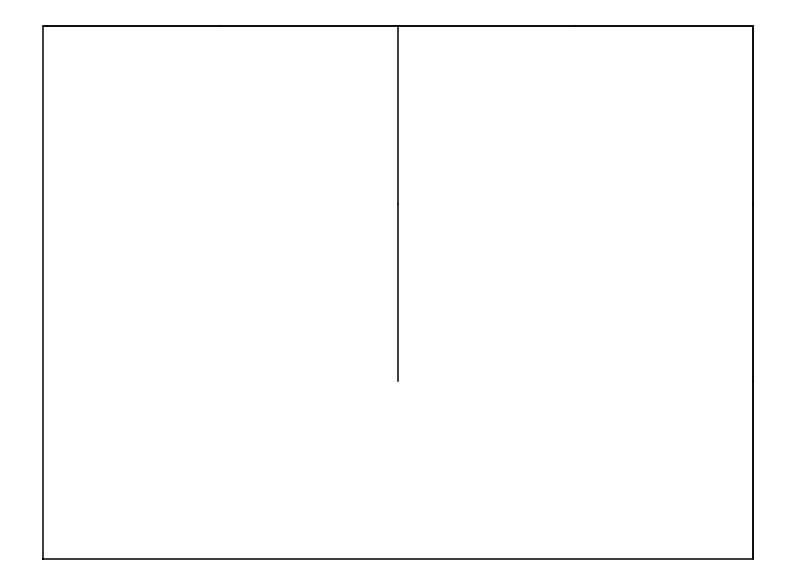

In [32]:
display_maze (({(0, 1), (1, 2), (2, 1), (0, 0), (3, 1), (1, 1), (2, 0), (3, 0), (0, 2), (2, 2), (1, 0), (3, 2)}, {((1, 2), (0, 2)), ((1, 1), (1, 0)), ((2, 2), (3, 2)), ((3, 2), (3, 1)), ((2, 1), (2, 2)), ((1, 0), (2, 0)), ((3, 1), (2, 1)), ((0, 1), (0, 2)), ((1, 2), (1, 1)), ((1, 1), (1, 2)), ((0, 0), (1, 0)), ((3, 0), (3, 1)), ((1, 1), (0, 1)), ((2, 0), (1, 0)), ((3, 1), (3, 0)), ((2, 1), (3, 1)), ((2, 0), (2, 1)), ((3, 0), (2, 0)), ((0, 1), (1, 1)), ((2, 2), (2, 1)), ((2, 1), (2, 0)), ((1, 0), (1, 1)), ((0, 1), (0, 0)), ((0, 0), (0, 1)), ((0, 2), (1, 2)), ((3, 1), (3, 2)), ((0, 2), (0, 1)), ((2, 0), (3, 0)), ((1, 0), (0, 0)), ((3, 2), (2, 2))}, {((1, 2), (0, 2)): 1.0, ((1, 1), (1, 0)): 1.0, ((2, 2), (3, 2)): 1.0, ((3, 2), (3, 1)): 1.0, ((2, 1), (2, 2)): 1.0, ((3, 1), (2, 1)): 1.0, ((0, 1), (0, 2)): 1.0, ((1, 2), (1, 1)): 1.0, ((1, 1), (1, 2)): 1.0, ((0, 0), (1, 0)): 1.0, ((3, 0), (3, 1)): 1.0, ((1, 1), (0, 1)): 1.0, ((3, 1), (3, 0)): 1.0, ((2, 1), (3, 1)): 1.0, ((2, 0), (2, 1)): 1.0, ((3, 0), (2, 0)): 1.0, ((0, 1), (1, 1)): 1.0, ((2, 2), (2, 1)): 1.0, ((2, 1), (2, 0)): 1.0, ((1, 0), (1, 1)): 1.0, ((0, 1), (0, 0)): 1.0, ((0, 0), (0, 1)): 1.0, ((0, 2), (1, 2)): 1.0, ((3, 1), (3, 2)): 1.0, ((0, 2), (0, 1)): 1.0, ((2, 0), (3, 0)): 1.0, ((1, 0), (0, 0)): 1.0, ((3, 2), (2, 2)): 1.0, ((1, 0), (2, 0)): 1.0, ((2, 0), (1, 0)): 1.0}))
# punctured maze 4*3

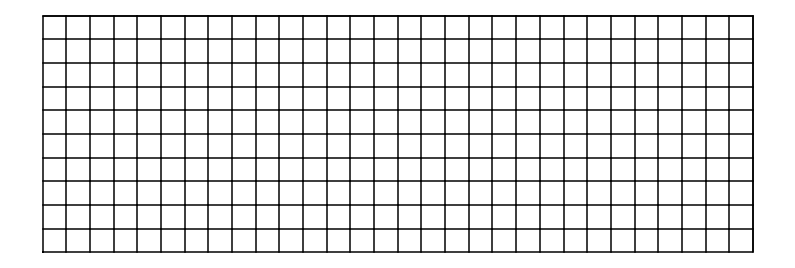

In [33]:
display_maze (full_maze(30,10))

In [34]:
v, e, w = full_maze(30,10) # on ajoute un edge = on enlève une barrière du labyrinthe
e.add(((2,2),(2,3)))
w.update({((2,2),(2,3)) : 1}) 
    

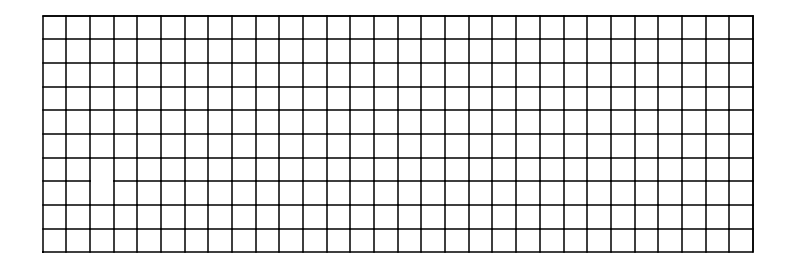

In [35]:
display_maze ((v,e,w))

In [85]:
def maze_possible(n,m):
    v, e, w = full_maze(n,m)
    for i in range (n-1) : 
        j = rd.randint(0,m-1)
        e.add(((i,j),(i+1,j)))
        w.update({((i,j),(i+1,j)):1})
    for j in range(m-1):
        for i in range(n):
            e.add(((i,j),(i,j+1)))
            w.update({((i,j),(i,j+1)):1})
    return(v,e,w)

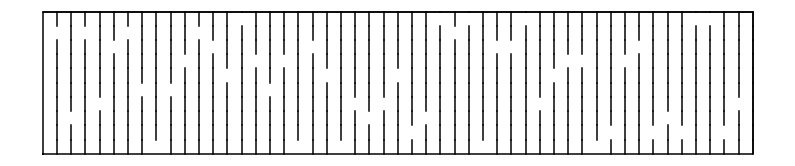

In [86]:
display_maze (maze_possible(50,10))

In [90]:
def reachable_set (maze,origin):
    v, e, w = maze
    cel = [] # liste des cellules accessibles à  partir de l'origine
    cel.append(origin) 
    for eltb in cel :  # on parcourt la liste des cellules accessibles
        for elta in v :
            if len(set(cel))== len(v): # si on a ajouté toutes les cases du labyrinthe
                return(set(cel))
            elif (elta,eltb) in e : 
                cel.append(elta)
    return (set(cel))
        

In [95]:
def reachable_set (maze,origin): # autre méthode
    v, e, w = maze
    todo = {origin}
    i, j = origin
    done = set()
    while todo != set() :
        for i,j in todo :
            if (i+1,j in v) and (i+1,j not in todo) and (((i,j),(i+1,j)) in e) and (i+1,j not in done) : 
                todo.add(((i,j),(i+1,j))) 
            if (i-1,j in v) and (i-1,j not in todo) and (((i,j),(i-1,j)) in e) and (i-1,j not in done): 
                todo.add(((i,j),(i-1,j))) 
            if (i,j-1 in v) and (i,j-1 not in todo) and (((i,j),(i,j-1)) in e) and (i,j-1 not in done) : 
                todo.add(((i,j),(i,j-1))) 
            if (i,j+1 in v) and (i,j+1 not in todo) and (((i,j),(i,j+1)) in e) and (i,j+1 not in done): 
                todo.add(((i,j),(i,j+1))) 
            done.add(i,j)
    return(done)
            
            
        

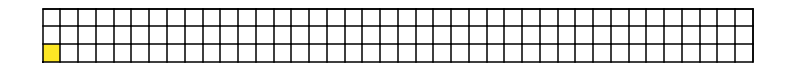

In [87]:
maze = full_maze(40,3)
origin = (0,0)

cells = reachable_set(maze, origin)
display_maze(maze, map=cells)

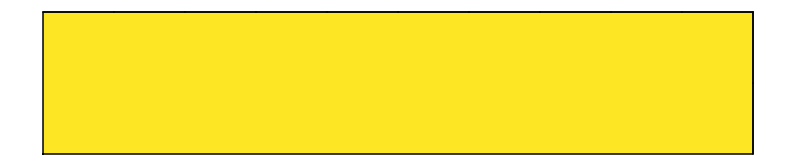

In [89]:
maze = empty_maze(10,2)
origin = (0,0)

cells = reachable_set(maze, origin)
display_maze(maze, map=cells)

In [ ]:
def reachable_paths (maze, origin) : 
    dict = {} # clés : cellules atteignables depuis l'origine
              # valeur : chemin qui joint l'origine à la cellule atteignable (sous forme de liste)
    for elt in reachable_set (maze,origin) :
        path = []
        
    